In [1]:
#Created by Oscar Scholin and Graham Hirsch Summer 2022
#n.b. we use 999999999 in lieu of np.nan since using the latter resulted in some errors in reading in csvs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
from statistics import median
import time

### Read in HCV csv

In [3]:
#set current working directory (cwd)
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/')

In [4]:
#call the dataframe from the hcv csv folder within the cwd
df = pd.read_csv(r'./raw data/hcv/HCV_7_1.csv')
df

matchid  groupid  subgroup          ra        dec  pipeline_class  \
0              352  1040910        26  269.790894 -29.248819               1   
1              352  1040910        26  269.790894 -29.248819               1   
2              352  1040910        26  269.790894 -29.248819               1   
3              352  1040910        26  269.790894 -29.248819               1   
4              352  1040910        26  269.790894 -29.248819               1   
...            ...      ...       ...         ...        ...             ...   
2576369  108169792  1063416        12  269.609375 -29.169004               2   
2576370  108169792  1063416        12  269.609375 -29.169004               2   
2576371  108169792  1063416        12  269.609375 -29.169004               2   
2576372  108169792  1063416        12  269.609375 -29.169004               2   
2576373  108169792  1063416        12  269.609375 -29.169004               2   

         expert_class      filter  num_filters var_quality_flag  ...  \
0                   0   ACS_F606W            2            AAAAC  ...   
1                   0   ACS_F606W            2            AAAAC  ...   
2                   0   ACS_F606W            2            AAAAC  ...   
3                   0   ACS_F606W            2            AAAAC  ...   
4                   0   ACS_F606W            2            AAAAC  ...   
...               ...         ...          ...              ...  ...   
2576369             0  WFC3_F814W            2            AAABC  ...   
2576370             0  WFC3_F814W            2            AAABC  ...   
2576371             0  WFC3_F814W            2            AAABC  ...   
2576372             0  WFC3_F814W            2            AAABC  ...   
2576373             0  WFC3_F814W            2            AAABC  ...   

         lightcurve_d  lightcurve_m  lightcurve_cm  lightcurve_e  \
0        55855.000881     25.631300      25.636757        0.1070   
1        56001.959890     26.200701      26.195594        0.1815   
2        56052.841962     26.034100      26.046429        0.1469   
3        56109.701472     25.735399      25.760180        0.1854   
4        56121.406559     25.626101      25.640382        0.0986   
...               ...           ...            ...           ...   
2576369  56716.158792     20.118099      20.122682        0.0061   
2576370  56732.954985     20.060400      20.060412        0.0058   
2576371  56764.960344     20.134701      20.137863        0.0063   
2576372  56784.897984     20.104401      20.095573        0.0057   
2576373  56816.849674     20.132900      20.127294        0.0061   

                         lightcurve_i  lightcurve_r          ci_d      ci_v  \
0          hst_12586_03_acs_wfc_f606w         False  55855.000881  1.093611   
1          hst_12586_10_acs_wfc_f606w         False  56001.959890  0.635000   
2          hst_12586_22_acs_wfc_f606w         False  56052.841962  0.824907   
3          hst_12586_35_acs_wfc_f606w         False  56109.701472  0.933519   
4          hst_12586_39_acs_wfc_f606w         False  56121.406559  1.029815   
...                               ...           ...           ...       ...   
2576369  hst_13463_08_wfc3_uvis_f814w         False  56716.158792  1.415333   
2576370  hst_13463_12_wfc3_uvis_f814w         False  56732.954985  1.374222   
2576371  hst_13463_20_wfc3_uvis_f814w         False  56764.960344  1.420444   
2576372  hst_13463_24_wfc3_uvis_f814w         False  56784.897984  1.412222   
2576373  hst_13463_32_wfc3_uvis_f814w         False  56816.849674  1.346222   

                  d_d       d_v  
0        55855.000881  6.084347  
1        56001.959890  2.961927  
2        56052.841962  5.407275  
3        56109.701472  4.572665  
4        56121.406559  3.149204  
...               ...       ...  
2576369  56716.158792  2.586158  
2576370  56732.954985  6.504886  
2576371  56764.960344  4.001287  
2576372  56784.897984  3.657708  
2576373  56816.849674  5.703785  

[2576374 r

### Lightcurve function

In [4]:
#plt.figure(figsize = (20, 10))

def make_lightcurve(matchid):
    
    #create empty lists for magnitude and time
    mag_list = []
    time_list = [] #stores list of list of tuples for each filter type, including magnitude and time
    tuple_list =[]
    filter_list = []
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid].reset_index()
    
    count = 0 #increment every time we append to mag_list and time_list
  
    #for loop to go through all entries in matchid_df
    for i in range(len(matchid_df)-1):
        #print(i==(len(matchid_df) - 2))
        current_filter = matchid_df['filter'][i] #sets current filter
        updated_filter = matchid_df['filter'][i+1] #next filter

        if (current_filter == updated_filter) & (i!=(len(matchid_df) - 2)): #if the current and updated rows have same filter, then append mag value to mag_list
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            count+=1
            #print('same!', i)
            
        elif (current_filter == updated_filter) & (i==(len(matchid_df) - 2)):
            mag_list.append(matchid_df['lightcurve_m'][i]) 
            time_list.append(matchid_df['lightcurve_d'][i])
            mag_list.append(matchid_df['lightcurve_m'][i+1]) #appending last element
            time_list.append(matchid_df['lightcurve_d'][i+1])
            
            tuple_list.append(list(zip(time_list, mag_list)))
            
            filter_list.append(updated_filter)
            
            count+=2
            
            #print('kast!', i)
        
        else:
            mag_list.append(matchid_df['lightcurve_m'][i]) 
            time_list.append(matchid_df['lightcurve_d'][i])
            
            tuple_list.append(list(zip(time_list, mag_list)))
            
            filter_list.append(current_filter)
            
            
            count+=1
            #print('different!', i, i+1)
            
            #reset lists and count
            mag_list = [] 
            time_list = []

    #print (count) 
    #print(filter_list)
    for s in range(len(tuple_list)):
        plt.scatter(*zip(*tuple_list[s]), label = filter_list[s])
        plt.xlabel('Time (Julian Days)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.title('Lightcurve for Matchid ' + str(matchid), fontsize=20)
        
    plt.gca().invert_yaxis() #invert y axis since magnitude is inverted; i.e. small magnitude is bright
    plt.legend()
    plt.savefig('lightcurve_'+str(matchid)+'.jpeg')
    plt.show()
    
    

### Helper function to find variable filters

In [49]:
#takes in monster matrix; outputs list of unique filters that show max mag flare up, down
def find_variable_filters(matchid, monster_matrix):
    #get row corresponding to the input matchid
    matchid_monster_matrix = monster_matrix.loc[monster_matrix['matchid']==matchid]
    
    #initialize empty list
    variable_filters = []
    
    #find max max mag up, down filters and append
    max_max_mag_up_filter = matchid_monster_matrix['max max mag up filter'].values[0]
    max_max_mag_down_filter = matchid_monster_matrix['max max mag down filter'].values[0]
    
    #see if the filter is one of the filter types in the HCV; i.e. not nan
    #checking if the filter != 'NaN' or 'nan' or np.nan did not work
    filters = df['filter'].unique()
    
    if max_max_mag_up_filter in filters:
        variable_filters.append(max_max_mag_up_filter)
    if max_max_mag_down_filter in filters: 
        variable_filters.append(max_max_mag_down_filter)    
    #print(variable_filters)
    
    #find unique filters
    unique_filters = list(set(variable_filters))
    
    return unique_filters

### Lightcurve given list of max mag up, down filters

In [51]:
#takes in a matchid and list of filters that show variability
def make_lightcurve_variable_filters(matchid, variable_filters):
    #initialize list to hold list of time, mag tuples
    list_list_time_mag = []
    
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid].reset_index()
    
    for filter_type in variable_filters:
        #create a df for that matchid/filter combo
        filter_matchid_df = matchid_df.loc[matchid_df['filter']==filter_type]
        
        #stores list of list of tuples for each filter type, including magnitude and time
        time_mag_list =[]
        
        #now iterate through this dataframe and save the time, mag tuple to the time_mag_list
        for i in range(len(filter_matchid_df)):
            time_mag_list.append((filter_matchid_df['lightcurve_d'].values[i], 
                                  filter_matchid_df['lightcurve_m'].values[i]))
        
        list_list_time_mag.append(time_mag_list)
   
    #now plot!
    for i in range(len(list_list_time_mag)):
        plt.scatter(*zip(*list_list_time_mag[i]), label = variable_filters[i])
        plt.xlabel('Time (Julian Days)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.title('Lightcurve for Matchid ' + str(matchid), fontsize=20)
        
    plt.gca().invert_yaxis() #invert y axis since magnitude is inverted; i.e. small magnitude is bright
    plt.legend()
    plt.savefig('lightcurve_'+str(matchid)+'.jpeg')
    plt.show()

### Feature Vector p1 helper functions

In [7]:
#function to convert ra and dec to galactic coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord

#takes in ra and dec in degrees and returns galatic coordinates
def ra_dec_to_galactic(wx, wy):
    c = SkyCoord(ra=wx*u.degree, dec=wy*u.degree, frame='icrs')
    
    #returns galatic longitude, galactic latitude
    return c.galactic.l.deg, c.galactic.b.deg

def get_list_matchids_groupid(groupid):
    #dataframe for given groupid
    groupid_df = df.loc[df.groupid==groupid]
    
    #return list of unique matchids for the groupid
    return groupid_df.matchid.unique()

### Feature vector p.1

In [8]:
#function to return dictionary row
#we will feed in the result of calling this function on a set of matchids to our cluster function
def get_feature_vector_p1(matchid):
    #dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid]
    
    #----------
    #part 1: find the number of other matchids that share the same groupid, not counting that matchid
    groupid = matchid_df.groupid.values[0]
    matchids_groupid_list = get_list_matchids_groupid(groupid)
    num_other_matchids_groupid = len(matchids_groupid_list) -1
    
    #----------
    #part 2: get total delta time
    
    #get list of unique filter types per matchid
    unique_filter_list = matchid_df['filter'].unique()
    
    #list of total times
    median_mag_list = []
    total_time_list = []
    mad_list = []
    chi2_list = []
    
    #now create separate dataframes corresponding to each unique matchid and fitler combo
    for item in unique_filter_list:
        matchid_filter_df = matchid_df.loc[matchid_df['filter']==item].reset_index()
        
        #now create list of times
        matchid_filter_time_list = list(matchid_filter_df['lightcurve_d'])
        
        #compute max and min times
        min_time = matchid_filter_time_list[0]
        max_time = matchid_filter_time_list[-1]
        
        total_time_diff = max_time - min_time
        total_time_list.append(total_time_diff)
        
        #calculate median mag using the list of lightcurve_m values
        median_mag = median(matchid_filter_df['lightcurve_m'].values)
        median_mag_list.append(median_mag)
        
        #append mad and chi2 values; same for every entry in the matchid filter df, so use first instance
        mad_list.append(matchid_filter_df['mad'].values[0])
        chi2_list.append(matchid_filter_df['chi2'].values[0])
        
    #compute min, max, and median median mag; remember that magnitudes are inverse!
    min_median_mag = max(median_mag_list)
    max_median_mag = min(median_mag_list)
    median_median_mag = median(median_mag_list)
      
    #compute min total time    
    min_total_time = min(total_time_list)
    max_total_time = max(total_time_list)
    
    #compute median mad and chi2
    median_mad = median(mad_list)
    median_chi2 = median(chi2_list)
    
    #----------
    #part 3: extract the ra and dec of the object and convert to galactic coordinates
    #n.b. the ra and dec of the object will change every 26,000 years, so if you are reading this in the future, you may need to recallibrate your ra and dec before proceeding :)
    
    ra, dec = matchid_df['ra'].values[0], matchid_df['dec'].values[0]
    l, b = ra_dec_to_galactic(ra, dec) #galactic latitude: l, galactic latitude: b
    
    #---------- 
    
    return ({'matchid': matchid, 'groupid': groupid, 'num other matchids in groupid': num_other_matchids_groupid,
             'min median mag': min_median_mag, 'max median mag': max_median_mag, 
             'median median mag': median_median_mag, 'min total time': min_total_time,
            'max total time': max_total_time, 'median mad': median_mad, 'median chi2': median_chi2, 
             'ra': ra, 'dec': dec, 'l': l, 'b': b})

### Fluid Noise prep

In [9]:
'''
*first read in csv of field data from HSC 
    e.g. https://archive.stsci.edu/hst/hsc/help/sweeps/sweeps_hscv3p1.html#maghist
*here we are using data from the SWEEPS field, with num_images >= 5
*and ACS/WFC F606W and F814W data only
'''
sweeps_df = pd.read_csv(r'./raw data/mad sample/SWEEPS6_oscar47.csv')
sweeps_df

ObjID          RA        Dec     RAerr     Decerr  NumFilters  \
0       4000709002286  269.791138 -29.206156  0.696482   0.273006           2   
1       4000709002287  269.795592 -29.206152  0.240202   0.185248           2   
2       4000709002288  269.816089 -29.206155  0.304068   0.285041           2   
3       4000709002289  269.825969 -29.206157  0.356433   0.395422           2   
4       4000709002290  269.834864 -29.206155  0.162996   0.140628           2   
...               ...         ...        ...       ...        ...         ...   
463746  4001167481340  269.673791 -29.239101  1.692033  11.408126           2   
463747  4001167491185  269.705319 -29.243289  2.229672   2.398413           2   
463748  4001168074973  269.729676 -29.236047  1.615855   2.326805           2   
463749  4001181274495  269.822793 -29.207380  1.447004   1.123456           2   
463750  4001206014352  269.836239 -29.177149  3.200351  39.008367           2   

        NumVisits  F606W_mag  F606W_n  F606W_mad  ...  F814W_mad        bpm  \
0              47  22.127399       47   0.021601  ...   0.016800   2.087559   
1              47  21.508499       47   0.029999  ...   0.023901  -2.893057   
2              47  21.654400       47   0.036501  ...   0.017101   4.658666   
3              47  19.791700       47   0.028200  ...   0.019300  -0.456624   
4              46  20.566649       46   0.015949  ...   0.014801   4.459276   
...           ...        ...      ...        ...  ...        ...        ...   
463746          5  23.149200        5   0.009501  ...   0.078001  19.886337   
463747          7  24.967300        7   0.089800  ...   0.036201  -8.815252   
463748          6  22.763050        6   0.008550  ...   0.034350  30.832614   
463749          6  24.241450        6   0.048900  ...   0.042550   2.708700   
463750          6  25.052999        7   0.211300  ...   0.360800  31.311534   

              lpm     bpmerr     lpmerr      pmdev           yr         dT  \
0       -7.738272   0.388546   0.221157   2.887155  2013.300790  11.371915   
1       -0.789858   0.131658   0.124622   1.474677  2013.300790  11.371915   
2       -3.209880   0.139312   0.206481   1.957036  2013.300790  11.371915   
3       -2.090905   0.157582   0.276388   2.241524  2013.300790  11.371915   
4       -2.043363   0.178997   0.185036   1.009197  2013.515238   3.006782   
...           ...        ...        ...        ...          ...        ...   
463746  33.863297  15.612690  22.956871  13.309260  2014.115707   1.136472   
463747  -7.161225   6.263976   4.689823   6.073327  2014.245261   1.391943   
463748  -9.791319  15.399474   8.513992   4.282122  2014.369663   0.485220   
463749  -7.270344   0.335535   0.325669   2.779044  2012.084433  11.253822   
463750  49.547782  22.185838  45.579567  69.287226  2013.951629   2.044183   

            yrStart        yrEnd  
0       2003.436180  2014.808094  
1       2003.436180  2014.808094  
2       2003.436180  2014.808094  
3       2003.436180  2014.808094  
4       2011.801312  2014.808094  
...             ...          ...  
463746  2013.298422  2014.434894  
463747  2013.298422  2014.690365  
463748  2014.205146  2014.690365  
463749  2003.436180  2014.690002  
463750  2012.763912  2014.808094  

[463751 rows x 22 columns]

In [10]:
#find min and max mags in SWEEPS
min_606 = max(list(sweeps_df['F606W_mag']))
max_606 = min((list(sweeps_df['F606W_mag'])))

min_814 = max(list(sweeps_df['F814W_mag']))
max_814 = min((list(sweeps_df['F814W_mag'])))

min_mag_SWEEPS = max([min_606, min_814])
max_mag_SWEEPS = min([max_606, max_814])
print('the min mag in SWEEPS is', min_mag_SWEEPS)
print('the max mag in SWEEPS is', max_mag_SWEEPS)

the min mag in SWEEPS is 27.8589992523193
the max mag in SWEEPS is 16.5758991241455


In [11]:
#first split up the sweeps df by filter: F606W and F814W
#use .filter to create new dataframes with select columns

sweeps_606_df = sweeps_df.filter(['ObjID', 'RA', "Dec", 'F606W_mag', 'F606W_n', 'F606W_mad'], axis=1)
sweeps_814_df = sweeps_df.filter(['ObjID', 'RA', "Dec", 'F814W_mag', 'F814W_n', 'F814W_mad'], axis=1)
sweeps_814_df

ObjID          RA        Dec  F814W_mag  F814W_n  F814W_mad
0       4000709002286  269.791138 -29.206156  21.130100       47   0.016800
1       4000709002287  269.795592 -29.206152  20.699301       47   0.023901
2       4000709002288  269.816089 -29.206155  20.857700       47   0.017101
3       4000709002289  269.825969 -29.206157  19.069099       47   0.019300
4       4000709002290  269.834864 -29.206155  19.847751       46   0.014801
...               ...         ...        ...        ...      ...        ...
463746  4001167481340  269.673791 -29.239101  22.452101        5   0.078001
463747  4001167491185  269.705319 -29.243289  23.298201        7   0.036201
463748  4001168074973  269.729676 -29.236047  21.510500        6   0.034350
463749  4001181274495  269.822793 -29.207380  22.723950        6   0.042550
463750  4001206014352  269.836239 -29.177149  24.104200        7   0.360800

[463751 rows x 6 columns]

In [12]:
#define magnitude extrema; n.b. no stars with mag > 27 in SWEEPS
#for the SWEEPS data with 30 bins, have the first bin be (12.43, 21), and the remaining from 21-27 divided evenly
#(ensures at least 5 datapoints before calculating median)

mag_bin_list = []
min_mag = 18.9
max_mag = 27
#define 29 bins
n_bins = 29
step = (max_mag - min_mag) / n_bins


current_mag = min_mag
while current_mag <= max_mag:
    if current_mag+step <= max_mag:
        mag_tuple = (current_mag, current_mag+step)
        mag_bin_list.append(mag_tuple)
    current_mag+=step

#define empty dataframe to hold for each bin min mag, max mag, median mad 606, median mad 814
threshold_bin_df_data = {'min mag': [], 'max mag': [], 'mmad 606': [], 'mmad 814': [],
                        'num pts 606': [], 'num pts 814': []}
threshold_bin_df = pd.DataFrame(threshold_bin_df_data)

for mag_bin in mag_bin_list:
    #get dfs for each mag bin condition
    mag_bin_sweeps_606_df = sweeps_606_df.loc[(sweeps_606_df['F606W_mag'] > mag_bin[0]) & 
                                              (sweeps_606_df['F606W_mag'] <= mag_bin[1])]
    mag_bin_sweeps_814_df = sweeps_814_df.loc[(sweeps_814_df['F814W_mag'] > mag_bin[0]) & 
                                              (sweeps_814_df['F814W_mag'] <= mag_bin[1])]
    
    #check to make sure there is data in the dataframes
    if (len(mag_bin_sweeps_606_df) != 0) and (len(mag_bin_sweeps_814_df != 0)):
    
        #store the mad for 606 and 814 as elemments in a tuple to be appended to mad_tuple_list
        mad_606 = mag_bin_sweeps_606_df['F606W_mad'].values
        mad_814 = mag_bin_sweeps_814_df['F814W_mad'].values
        
        #compute the medians of the mad 606 and 814 lists. 
        #this is our noise threshold for the given filter and mag bin
        median_mad_606 = median(mad_606)
        median_mad_814 = median(mad_814)

        #append to dataframe
        threshold_bin_df = threshold_bin_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1], 
                                                    'mmad 606': median_mad_606, 'mmad 814': median_mad_814,
                                                   'num pts 606': len(mad_606), 'num pts 814': len(mad_814)},
                                                  ignore_index=True)
        
    #make noise threshold essentially infinite
    else:
        print('there is no data for this bin:' + str(mag_bin))
        print()
        threshold_bin_df = threshold_bin_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1],
                                                   'mmad 606': 999999999, 'mmad 814': 99999999,
                                                   'num pts 606': 0, 'num pts 814': 0},
                                                  ignore_index=True)
threshold_bin_df.to_csv('./raw data/mad sample/threshold_bin.csv')
threshold_bin_df

min mag    max mag  mmad 606  mmad 814  num pts 606  num pts 814
0   18.900000  19.179310  0.023000  0.020900       2661.0       7030.0
1   19.179310  19.458621  0.025600  0.019100       3754.0      10132.0
2   19.458621  19.737931  0.022699  0.018700       5077.0      12379.0
3   19.737931  20.017241  0.020400  0.018849       7767.0      14755.0
4   20.017241  20.296552  0.019901  0.019150      11922.0      17151.0
5   20.296552  20.575862  0.019400  0.019550      13366.0      18845.0
6   20.575862  20.855172  0.018901  0.020100      14530.0      20940.0
7   20.855172  21.134483  0.019200  0.020775      15961.0      22504.0
8   21.134483  21.413793  0.019650  0.021799      17144.0      23998.0
9   21.413793  21.693103  0.020500  0.022650      18054.0      24848.0
10  21.693103  21.972414  0.021100  0.023950      18854.0      25767.0
11  21.972414  22.251724  0.021600  0.025650      19302.0      26460.0
12  22.251724  22.531034  0.023001  0.027600      19473.0      26834.0
13  22.531034  22.810345  0.024100  0.030200      19894.0      27145.0
14  22.810345  23.089655  0.025350  0.033600      19509.0      27519.0
15  23.089655  23.368966  0.027450  0.037800      19568.0      27830.0
16  23.368966  23.648276  0.029500  0.043150      19804.0      27001.0
17  23.648276  23.927586  0.032750  0.049701      19864.0      25771.0
18  23.927586  24.206897  0.036750  0.057199      20391.0      22979.0
19  24.206897  24.486207  0.042000  0.066875      20480.0      17706.0
20  24.486207  24.765517  0.048050  0.081201      20854.0      10609.0
21  24.765517  25.044828  0.056299  0.096900      21475.0       5917.0
22  25.044828  25.324138  0.066000  0.115050      20911.0       2964.0
23  25.324138  25.603448  0.079300  0.125901      20543.0       1470.0
24  25.603448  25.882759  0.093399  0.118750      19783.0        624.0
25  25.882759  26.162069  0.107800  0.122700      19066.0        183.0
26  26.162069  26.441379  0.094601  0.158100      21546.0         87.0
27  26.441379  26.720690  0.078199  0.138700       5720.0         33.0
28  26.720690  27.000000  0.104451  0.120600       2062.0          7.0

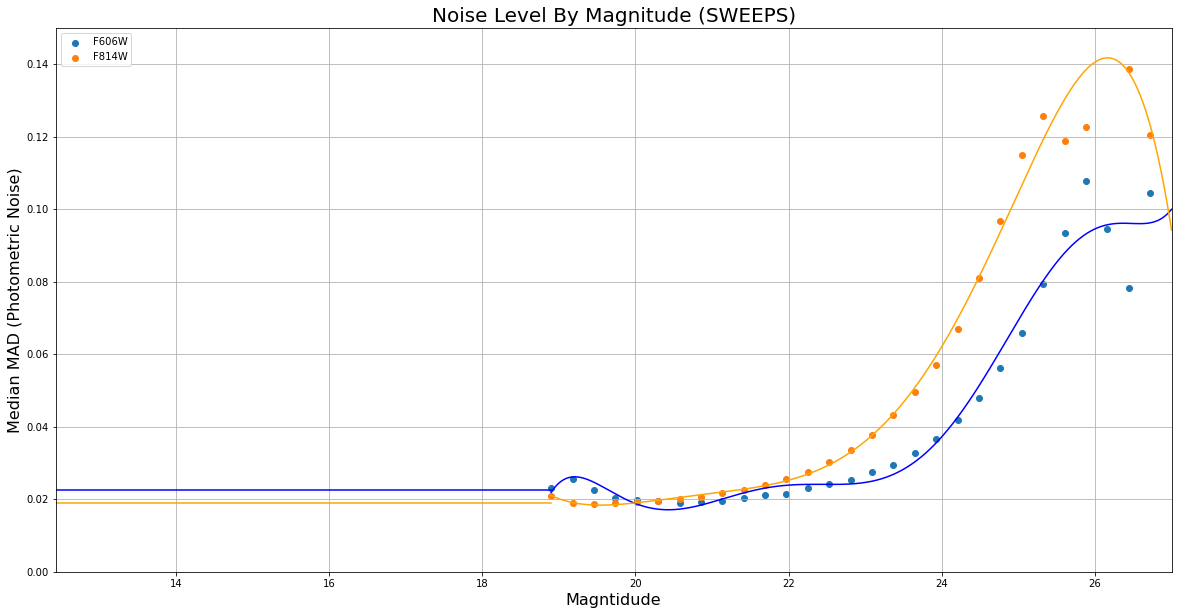

In [13]:
plt.figure(figsize = (20, 10))
#run a least squares polynomial regression on the above data to create the noise function

#prep data---------
#get list of magnitudes
mag_list = list(threshold_bin_df['min mag'].values)

#get list of 606,814 median mad
median_mad_606 = list(threshold_bin_df['mmad 606'].values)
median_mad_814 = list(threshold_bin_df['mmad 814'].values)

# Train Algorithm (Polynomial)
degree = 7
noise_606 = np.poly1d(np.polyfit(mag_list,median_mad_606, degree))
noise_814 = np.poly1d(np.polyfit(mag_list,median_mad_814, degree))

#find median of first 5 bins for 606 and 814 and have this be constant threshold for 12.43 to 18.9
median_5_606 = median(median_mad_606[:5])
median_5_814 = median(median_mad_814[:5])

@np.vectorize
def constant(value, x):
    return value

#define linspaces
xx0 = np.linspace(12.43, 18.9, 1000)
xx = np.linspace(18.9, 27, 1000)

#plot constant data
plt.plot(xx0,constant(median_5_606, xx0), c='b', linestyle='-')
plt.plot(xx0,constant(median_5_814, xx0), c='orange', linestyle='-')

#plot regression data
plt.plot(xx, noise_606(xx), c='b',linestyle='-')
plt.plot(xx, noise_814(xx), c='orange',linestyle='-')

plt.title('Noise Level By Magnitude (SWEEPS)', fontsize=20)
plt.xlabel('Magntidude', fontsize=16)
plt.ylabel('Median MAD (Photometric Noise)', fontsize=16)
plt.axis([12.43, 27, 0, 0.15])
plt.grid(True)

plt.scatter(mag_list, median_mad_606, label = 'F606W')
plt.scatter(mag_list, median_mad_814, label = 'F814W')

plt.legend()
#plt.savefig('sweeps_noise.jpeg')
plt.show()
#print(noise_606(22))

### Get threshold (aka fluid noise) function

In [14]:
#function takes in a matchid and returns a noise level for a given filter
#for the simple version, return 0.015 for all objects with median mag <21
def get_threshold(matchid, filter_type):
    #first need to find median mag of the object given the filter type
    #create df of matchid and filter
    filter_matchid_df = df.loc[(df['matchid']==matchid) & (df['filter']==filter_type)]
    
    #now get list of the lightcurve m values and compute median; this is median mag
    lightcurve_m_list = list(filter_matchid_df['lightcurve_m'].values)
    median_mag = median(lightcurve_m_list)
    
    #606 filter
    if (filter_type=='ACS_F606W') or (filter_type=='WFC3_F606W'):
        #constant level
        if (median_mag >= 12.43) and (median_mag < 18.9):
            return median_5_606
        #variable
        elif (median_mag >= 18.9) and (median_mag < 26.72):
            return noise_606(median_mag)
    elif (filter_type=='ACS_F814W') or (filter_type=='WFC3_F814W'):
        #constant level
        if (median_mag >= 12.43) and (median_mag < 18.9):
            return median_5_814
        #variable
        elif (median_mag >= 18.9) and (median_mag < 26.72):
            return noise_814(median_mag)
    else:
        print('object ' + str(matchid)+' filter '+ str(filter_type)+ ' mag '+ str(median_mag)+' does not fit in a bin')
        print()
        return 999999999

### Classifier help functions

In [15]:
def make_classified(matchid, time_mag_list, threshold):
    #define our classified string that holds the result of +-0 etc.
    #tuple is (time, mag)
    #by default starts with '#' to denote first point
    classified = '#'
    
    #initilize list to hold (starting t, delta t, delta m) for each character
    t_dt_dm = []
    
    #now a for loop to iterate over the (time, mag) tuples and calculate pointwise difference
    #subtract 1 so we don't try to compare the last index to an nonexistent index
    for i in range(len(time_mag_list)-1):
    
        #calculate starting time for character
        t0 = time_mag_list[i][0]
        #calculate difference in time and mag: initial mag - final mag
        dt = time_mag_list[i+1][0] - t0
        dm = time_mag_list[i][1] - time_mag_list[i+1][1]
        
        
        #case 1: abs difference exceeds threshold and difference is positive, i.e. object gets brighter
        if (abs(dm) >= threshold) and (dm > 0):
            classified+='+'
            
        #case 2: abs difference exceeds threshold and difference is positive, i.e. object gets dimmer
        elif (abs(dm) >= threshold) and (dm < 0):
            classified+='-'
        
        #case 3: abs difference exceeds threshold and difference is exactly 0 (rare case)
        elif (abs(dm) >= threshold) and (dm == 0):
            classified+='0'
        
        #case 4: abs difference does not exceed threshold and thus is labeled as 0 difference
        else:
            classified+='0'
           
        #append a tuple of starting time, delta t, delta mag to an event list, which we return
        t_dt_dm.append((t0, dt, dm))       
    
    #return classified string and list of (starting time, delta t, delta mag) tuples 
    return classified, t_dt_dm

#given a classified string and a list of tuples of start times, delta t, delta mag 
#return a list of flare up, flare down, flat that consolidate multiple events into unique, distinct events
#and record a list of tuples of start time, total delta time, and total delta mag for each event
def consolidate_events(classified, t_dt_dm):
    
    #initilize lists to hold (starting time, delta time, delta mag) for each event
    flare_up_list = []
    flare_down_list = []
    flat_list = []
    
    #initilize temp variables
    t0 = 0
    dt = 0
    dm = 0
    
    #clip off starting '#'
    classified = classified.replace('#', '')
    
    #iterate through all characters in the string
    #use a while loop so we can update i
    i=0
    while i < len(classified):
        
        #assign variables
        t0 = t_dt_dm[i][0]
        dt = t_dt_dm[i][1]
        dm = t_dt_dm[i][2]
    
            
        #---------
        #first check up, down, flat
        
        #flare up
        if classified[i] == '+':
            
            #first check to see if i is the last element in the string. if so, append!
            if i==len(classified)-1:
                flare_up_list.append((t0, dt, dm))
                
            else:
                #check each of the next characters to see if we find any other matches or stops
                for j in range(i+1, len(classified)):
                    #if another up, then keep adding to event
                    if classified[j] == '+':
                        #update
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]

                        #need to check if j is the final element in list; in which case, save the values!
                        if j==len(classified)-1:
                            flare_up_list.append((t0, dt, dm))
                            
                            #increment i by j-i
                            i+=(j-i)
                            
                            #dump temps
                            t0 = 0
                            dt = 0
                            dm = 0
                            
                            #now break
                            break
                            
                    #else, we hit any other character: i.e. - or 0
                    else:
                        #store; no updating
                        flare_up_list.append((t0, dt, dm))

                        #dump temps
                        t0 = 0
                        dt = 0
                        dm = 0

                        #increment i by j-i-1; this is the delta
                        i+=(j-i-1)

                        #now break out of the j for loop
                        break

        #flare down   
        elif classified[i] == '-':
            
            #first check to see if i is the last element in the string. if so, append!
            if i==len(classified)-1:
                flare_down_list.append((t0, dt, dm)) 
            
            else:
                #check each of the next characters to see if we find any other matches or stops
                for j in range(i+1, len(classified)):
                    #if another down, then keep adding to event
                    if classified[j] == '-':
                        #update
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]

                        #need to check if j is the final element in list; in which case, save the values!
                        if j==len(classified)-1:
                            flare_down_list.append((t0, dt, dm))
                            
                            #dump temps
                            t0 = 0
                            dt = 0
                            dm = 0
                            
                            #update i by j-i: don't subtract 1, otherwise we'll end up going through the while loop one more time
                            i+=(j-i)
                            
                            #now break
                            break

                    #else, we hit anything else, i.e. + or 0
                    else:
                        #store; no updating
                        flare_down_list.append((t0, dt, dm))

                        #dump temps
                        t0 = 0
                        dt = 0
                        dm = 0

                        #update i by j-i-1
                        i+=(j-i-1)

                        #now break out of the j for loop
                        break

        #flat
        else:
            
            #first check to see if i is the last element in the list. if so, append!
            if i==len(classified)-1:
                flat_list.append((t0, dt, dm))
                
            else:
                #check each of the next characters to see if we find any other matches or stops
                for j in range(i+1, len(classified)):
                    #if another up, then keep adding to event
                    if classified[j] == '0':
                        #update
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]

                        #need to check if j is the final element in list; in which case, save the values!
                        if j==len(classified)-1:
                            flat_list.append((t0, dt, dm))
                            
                            #dump temps
                            t0 = 0
                            dt = 0
                            dm = 0
                            
                            #update i by j-i-1
                            i+=(j-i)
                            
                            #now break
                            break
                            

                    #else, we hit anything else
                    else:
                        #store; no updating
                        flat_list.append((t0, dt, dm))

                        #dump temps
                        t0 = 0
                        dt = 0
                        dm = 0

                        #update i by j-i-1
                        i+=(j-i-1)

                        #now break out of the j for loop
                        break

        #increment i
        i+=1 
    #return the populated lists!!
    return flare_up_list, flare_down_list, flat_list     

### Master classifier function

In [16]:
def master_classifier(matchid, time_mag, filter_type):
    #get value of fluid noise
    threshold = get_threshold(matchid, filter_type)
    
    #generate classified string and list of (starting time, delta t, delta mag)
    classified, t_dt_dm = make_classified(matchid, time_mag, threshold)
    
    #print(classified)
    
    #call consolidate_events function to return our list of list of tuples for flare up, down, flat
    #each tuple holds the starting time of the event, the delta t, and delta mag
    flare_up_list, flare_down_list, flat_list = consolidate_events(classified, t_dt_dm)
    
    #return lists for each event type
    return flare_up_list, flare_down_list, flat_list
 

### Implement classifier for a given matchid -- plus fluid noise

In [17]:
'''
* this function takes a matchid and outputs master lists containing lists of the (starting time, delta T, delta mag) 
  for flare ups and downs
'''

def implement_classifier(matchid):
    #list of list of time, mag tuples
    list_list_time_mag = []
    
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid']==matchid].reset_index()
    
    #create list of unique filters
    unique_filter_list = list(matchid_df['filter'].unique())
    
    #!!IMPORTANT!--------
    #since for now we only want objects with filter type ACS/WFC3 F606W or F814W, 
    #need to remove the other filters from the unique filter list
    filter_remove_list = []
    for filter_type in unique_filter_list:
        #if filter is not any of the 4 approved filters, remove it
        if (filter_type != 'ACS_F606W') and (filter_type != 'ACS_F814W') and (filter_type != 'WFC3_F606W') and (filter_type != 'WFC3_F814W'):
            filter_remove_list.append(filter_type) 
    for filter_type in filter_remove_list:
        unique_filter_list.remove(filter_type)
    
    #print(unique_filter_list)
    #---------------------
    
    for item in unique_filter_list:
        #create a df for that matchid/filter combo
        filter_matchid_df = matchid_df.loc[matchid_df['filter']==item]
        
        #stores list of list of tuples for each filter type, including magnitude and time
        time_mag_list =[]
        
        #now iterate through this dataframe and save the time, mag tuple to the time_mag_list
        for i in range(len(filter_matchid_df)):
            time_mag_list.append((filter_matchid_df['lightcurve_d'].values[i], 
                                  filter_matchid_df['lightcurve_m'].values[i]))
        
        list_list_time_mag.append(time_mag_list)
        
    #intialize lists to store the lists of flare up, down, flat
    master_up = []
    master_down = []
    master_flat = []
    
    #print(unique_filter_list)
    
    for i, time_mag in enumerate(list_list_time_mag): #for each list of tuples in tuple list
        #identify the filter type
        filter_type = unique_filter_list[i]
        
        #call classifier function here
        #this returns a flare up, down, and flat list for a given matchid and filter
        flare_up_list, flare_down_list, flat_list = master_classifier(matchid, time_mag, filter_type)
        
        #append each of these lists to their respective masters
        master_up.append(flare_up_list)
        master_down.append(flare_down_list)
        master_flat.append(flat_list)
        
    #print(master_up)
    #print(master_down)
    #print(master_flat)
         
    return master_up, master_down, master_flat, unique_filter_list

### Make feature vector p2 -- helper functions

In [18]:
#helper function to return the index of the tuple with the max value in the corresponding tuple index
def get_max_index_tuple(tuple_list, tuple_index, max_value):
    for i, value in enumerate(tuple_list):
        #if we reach the desired max value for the given tuple index, return the index
        if value[tuple_index] == max_value:
            return i
    #if we don't return any index through the for loop, return nan
    return 999999999

#function takes in list of lists of index, tuple corresponding to max up, max down
#and lists of master_up, master_down, master_flat
#returns the duration of flat after max flare up, before max flare down
def flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat):
    #get indices of max max mag up, down from index_tuple_list
    up_index = index_tuple_list[0][0]
    down_index = index_tuple_list[1][0]
    
    up_tuple = index_tuple_list[0][1]
    down_tuple = index_tuple_list[1][1]
    
    #if there is no up nor down-----
    if (up_index==999999999) and (down_index==999999999):
        return 999999999
    
    #if only up, no down----
    elif (up_index!=999999999) and (down_index==999999999):
        #get list from masters corresponding to the up index
        up_list = master_up[up_index]
        flat_list = master_flat[up_index]
        
        #check if flat list is empty; if yes, then 0 duration before or after the max
        if len(flat_list)==0:
            return 0
        
        else:
            #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
            #of a list, second element being the tuple
            up_labeled_list = []
            for up in up_list:
                #if this tuple is not the max tuple, then just add up
                if up != up_tuple:
                    up_labeled_list.append(['up', up])
                #if it is the max tuple, add max up
                else:
                    up_labeled_list.append(['max up', up])
                
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append(['flat', flat])
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = up_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs after max up
            #first find index of 'max up'
            up_sorted_index = 999999999
            for i, event in enumerate(complete_labeled_list):
                if event[0]=='max up':
                    up_sorted_index = i
            
            #check if there is a flat on right side of max up
            #if first index, only check to the right
            if up_sorted_index == 0:
                #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                if complete_labeled_list[1][0]=='flat':
                    return complete_labeled_list[1][1][1]
                else:
                    return 0
            #if index is len of list -1, then no events can follow, so return 0
            elif up_sorted_index == len(complete_labeled_list)-1:
                return 0
            #else check i+1
            else:
                #right is flat, return right duration
                if complete_labeled_list[up_sorted_index+1][0]=='flat':
                        return complete_labeled_list[up_sorted_index+1][1][1]
                #else, no flats
                else:
                    return 0
                
    #no ups, only down    
    elif (up_index==999999999) and (down_index!=999999999):
        #get list from masters corresponding to the down index
        down_list = master_down[down_index]
        flat_list = master_flat[down_index]
        
        #check if flat list is empty; if yes, then 0 duration before down
        if len(flat_list)==0:
            return 0
        
        else:
            #go thru each element in down_list and flat_list and append 'down', 'max down' or 'flat' as the first element
            #of a list, second element being the tuple
            down_labeled_list = []
            for down in down_list:
                #if this tuple is not the max tuple, then just add down
                if down != down_tuple:
                    down_labeled_list.append(['down', down])
                #if it is the max tuple, add max down
                else:
                    down_labeled_list.append(['max down', down])
                
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append(['flat', flat])
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = down_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs before or after max down
            #first find index of 'max down'
            down_sorted_index = 999999999
            for i, event in enumerate(complete_labeled_list):
                if event[0]=='max down':
                    down_sorted_index = i
            
            #check if there is a flat on either side of max down
            #if first index, there can be no events to left, so return 0
            if down_sorted_index == 0:
                return 0
            #if index is len of list -1, just check to the left
            elif down_sorted_index == len(complete_labeled_list)-1:
                if complete_labeled_list[-2][0]=='flat':
                    return complete_labeled_list[-2][1][1]
                else:
                    return 0
            #else check i-1
            else:
                #left is flat, return left duration
                if complete_labeled_list[down_sorted_index-1][0]=='flat':
                        return complete_labeled_list[down_sorted_index-1][1][1]
                #else, no flats
                else:
                    return 0
                
    #both up and down
    else:
        #print('up index', up_index)
        #print('down index', down_index)
        #check if indices match; if so, create combined sorted list of up, down, flat
        if up_index == down_index:
            up_list = master_up[up_index]
            down_list = master_down[up_index]
            flat_list = master_flat[up_index]
            #print('master up list', master_up)
            #print('up list', index_tuple_list[0])
            
            #first check if flat list is empty
            if len(flat_list) == 0:
                return 0
            
            #else, go through and populate sorted list, then check if flat between up and down or down and up
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_labeled_list = []
                for flat in flat_list:
                    flat_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort by start time
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i
                    elif event[0]=='max down':
                        down_sorted_index = i
                
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat, save the dt
                    if complete_labeled_list[i][0]=='flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
                      
        #up, down indices don't match
        else:
            #create separate flat lists for up and down; check if flat between up and down or down and up
            up_list = master_up[up_index]
            down_list = master_down[down_index]
            flat_up_list = master_flat[up_index]
            flat_down_list = master_flat[down_index]
            
            #check if flat lists are empty
            #if both empty, then return 0
            if (len(flat_up_list)==0) and (len(flat_down_list)==0):
                return 0
            
            #no flats in down list; only check if flat follows max up
            elif (len(flat_up_list)!=0) and (len(flat_down_list)==0):
                #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
                #of a list, second element being the tuple
                up_labeled_list = []
                for up in up_list:
                    #if this tuple is not the max tuple, then just add up
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #if it is the max tuple, add max up
                    else:
                        up_labeled_list.append(['max up', up])

                flat_labeled_list = []
                for flat in flat_up_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = up_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs after max up
                #first find index of 'max up'
                up_sorted_index = 999999999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i

                #check if there is a flat on right side of max up
                #if first index, only check to the right
                if up_sorted_index == 0:
                    #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                    if complete_labeled_list[1][0]=='flat':
                        return complete_labeled_list[1][1][1]
                    else:
                        return 0
                #if index is len of list -1, then no events can follow, so return 0
                elif up_sorted_index == len(complete_labeled_list)-1:
                    return 0
                #else check i+1
                else:
                    #right is flat, return right duration
                    if complete_labeled_list[up_sorted_index+1][0]=='flat':
                        return complete_labeled_list[up_sorted_index+1][1][1]
                    #else, no flats
                    else:
                        return 0
            #no flats in up list; only check if flat preceds max down
            elif (len(flat_up_list)==0) and (len(flat_down_list)!=0):
                down_labeled_list = []
                for down in down_list:
                    #if this tuple is not the max tuple, then just add down
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #if it is the max tuple, add max down
                    else:
                        down_labeled_list.append(['max down', down])

                flat_labeled_list = []
                for flat in flat_down_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs before or after max down
                #first find index of 'max down'
                down_sorted_index = 999999999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max down':
                        down_sorted_index = i

                #check if there is a flat on either side of max down
                #if first index, there can be no events to left, so return 0
                if down_sorted_index == 0:
                    return 0
                #if index is len of list -1, just check to the left
                elif down_sorted_index == len(complete_labeled_list)-1:
                    if complete_labeled_list[-2][0]=='flat':
                        return complete_labeled_list[-2][1][1]
                    else:
                        return 0
                #else check i-1 and 
                else:
                    #left is flat, return left duration
                    if complete_labeled_list[down_sorted_index-1][0]=='flat':
                            return complete_labeled_list[down_sorted_index-1][1][1]
                    #else, no flats
                    else:
                        return 0
            #flats in both up and down lists
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_up_labeled_list = []
                for flat in flat_up_list:
                    flat_up_labeled_list.append(['flat', flat])
                flat_down_labeled_list = []
                for flat in flat_down_list:
                    flat_down_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort by start time
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_up_labeled_list + flat_down_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                #print('master down', master_down)
                #print(down_list)
                #print(complete_labeled_list)
                #print('down list',index_tuple_list[1])
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i
                    elif event[0]=='max down':
                        down_sorted_index = i
                
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat, save the dt
                    if complete_labeled_list[i][0]=='flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
    

### Make Feature vector p2 -- classifier info. Break into electric boogaloo

In [19]:
#second part of feature vector containing classifier analysis
'''
* Max number of flare ups + filter
* Max number of flare downs + filter
* Max number of flats + filter
* Duration of max flare up, down + filters
* Delta mag of max flare up, down + filters
* max duration of flat
* Number of filters that registered at least one flare up, at least one flare down
* Total number of filters for that matchid
* Baseline for max flare up and max flare down: comparing starting and ending magnitudes
* Is there a flare up before flare down?
'''

def get_feature_vector_p2(matchid):
    #first call the implement_classifier function to get our master lists
    master_up, master_down, master_flat, unique_filter_list = implement_classifier(matchid)
    
    #max number of flare ups
    up_nums = []
    for up_list in master_up:
        #append how many flare ups for a given filter/matchid
        up_nums.append(len(up_list))
    max_num_flare_up = max(up_nums)
    #print('up nums', up_nums)
    max_num_flare_up_index = np.argmax(up_nums)
    max_num_flare_up_filter = unique_filter_list[max_num_flare_up_index]
    
    #max number of flare downs
    down_nums = []
    for down_list in master_down:
        #append how many flare ups for a given filter/matchid
        down_nums.append(len(down_list))
    max_num_flare_down = max(down_nums)
    max_num_flare_down_index = np.argmax(down_nums)
    max_num_flare_down_filter = unique_filter_list[max_num_flare_down_index]
    
    #max number of flats
    flat_nums = []
    for flat_list in master_flat:
        flat_nums.append(len(flat_list))
    max_num_flat = max(flat_nums)
    max_num_flat_index = np.argmax(flat_nums)
    max_num_flat_filter = unique_filter_list[max_num_flat_index]
    
    #max flare up magnitude----------
    #first need to confirm that there is >= 1 flare up
    if max_num_flare_up >= 1:
        max_mag_up = []
        for up_list in master_up:
            #if up_list is empty, don't add any tuples
            #check to make sure we append tuples with data; else, append (0,0)
            if len(up_list) != 0:
                #we want to find the max dm, which is the third element
                max_start_time = max(up_list,key=lambda item:item[2])[0]
                max_delta_time = max(up_list,key=lambda item:item[2])[1]
                max_mag = max(up_list,key=lambda item:item[2])[2]
                max_mag_up.append((max_start_time, max_delta_time, max_mag))
                
            #if list len is 0, apend start time is null, delta time is null, max mag is 0
            else:
                max_mag_up.append((999999999, 0, 0))
                
            
        #print(max_mag_up)
        #print(unique_filter_list)
        max_max_start_time_up = max(max_mag_up,key=lambda item:item[2])[0]
        max_max_delta_time_up = max(max_mag_up,key=lambda item:item[2])[1]
        max_max_mag_up = max(max_mag_up,key=lambda item:item[2])[2]
        
        max_max_mag_up_index = get_max_index_tuple(tuple_list = max_mag_up, tuple_index = 2, max_value = max_max_mag_up)
        #print(max_max_mag_up_index)
        max_max_mag_up_filter = unique_filter_list[max_max_mag_up_index]
                                  
    else:
        max_max_start_time_up = 999999999
        max_max_delta_time_up = 0
        max_max_mag_up = 0
        max_max_mag_up_index = 999999999
        max_max_mag_up_filter = 'NaN'
        
    
    #max flare down magnitude---------
    #list of tuples of dt, dm
    #first check to confirm there is at least 1 flare down
    if max_num_flare_down >= 1:
        max_mag_down = []
        for down_list in master_down:
            #check to make sure we append tuples with data; else, append (0,0)
            if len(down_list) != 0:

                #we want to find the max dm, which is the second element
                #because we're flaring down, there should be a negative dm
                #thus we want to calculate the minimum delta mag, as this will be the most negative
                max_start_time = min(down_list,key=lambda item:item[2])[0]
                max_delta_time = min(down_list,key=lambda item:item[2])[1]
                max_mag = min(down_list,key=lambda item:item[2])[2]
                max_mag_down.append((max_start_time, max_delta_time, max_mag))
                
            #if list len is 0, apend start time is null, delta time is null, max mag is 0
            else:
                max_mag_down.append((999999999, 0, 0))
        
        max_max_start_time_down = min(max_mag_down,key=lambda item:item[2])[0]
        max_max_delta_time_down = min(max_mag_down,key=lambda item:item[2])[1]
        max_max_mag_down = min(max_mag_down,key=lambda item:item[2])[2]
        
        max_max_mag_down_index = get_max_index_tuple(tuple_list = max_mag_down, tuple_index = 2, max_value = max_max_mag_down)
        max_max_mag_down_filter = unique_filter_list[max_max_mag_down_index]
    else:
        max_max_start_time_down = 999999999
        max_max_delta_time_down = 0
        max_max_mag_down = 0
        max_max_mag_down_index = 999999999
        max_max_mag_down_filter = 'NaN'
        
    #duration of flat before/after max max mag up/down-----    
    
    
    #number of filters that register at least one flare up
    num_filters_up = 0
    for up_list in master_up:
        #only increment counter if there's something in the sub list
        if len(up_list) != 0:
            num_filters_up+=1
    
    #number of filters that register at least one flare down
    num_filters_down = 0
    for down_list in master_down:
        #only increment counter if there's something in the sub list
        if len(down_list) != 0:
            num_filters_down+=1
    
    #also calculate the number of unique filters to contextualize the number of up/down filters
    num_unique_filters = len(unique_filter_list)
    
    #baseline calculation---
    
    #first want to find dataframes for the matchids and the filters of the max flare up and flare down
    matchid_up_filter_df = df.loc[(df['matchid']==matchid) & (df['filter']==max_max_mag_up_filter)]
    matchid_down_filter_df = df.loc[(df['matchid']==matchid) & (df['filter']==max_max_mag_down_filter)]
    
    #print('max max mag down filter', max_max_mag_down_filter)
    
    #get threshold level
    #first check that for up and then down that the filter is not nan
    #if filter is nan, then threshold_up/down is nan
    
    #threshold up
    if max_max_mag_up_filter != 'NaN':
        threshold_up = get_threshold(matchid, max_max_mag_up_filter)
        
        #also save starting mag and ending mag for baseline calculation
        m0_up = matchid_up_filter_df['lightcurve_m'].values[0]
        mf_up = matchid_up_filter_df['lightcurve_m'].values[-1]
        
        #up baseline:
        #significant change
        if abs(m0_up - mf_up) >= threshold_up:
            baseline_up = m0_up - mf_up
        #non-significant change, so call it 0
        else:
            baseline_up = 0
    #else if the filter is NaN, i.e. no flare up at all
    else:
        threshold_up = 999999999
        baseline_up = 0
    
    #threshold down
    if max_max_mag_down_filter != 'NaN':
        threshold_down = get_threshold(matchid, max_max_mag_down_filter)
      
        m0_down = matchid_down_filter_df['lightcurve_m'].values[0]
        mf_down = matchid_down_filter_df['lightcurve_m'].values[-1]

        #down baseline:
        #significant change
        if abs(m0_down - mf_down) >= threshold_down:
            baseline_down = m0_down - mf_down
        #non-significant change, so call it 0
        else:
            baseline_down = 0
    else:
        threshold_down = 999999999
        baseline_down = 0  
  
    #up before down-------------
    #check if start time of max max mag flare up < start time of max max mag flare down
        
    #first check if there is a flare up and flare down; else, false
    if (max_num_flare_up >=1) and (max_num_flare_down >=1):
        if(max_max_start_time_up < max_max_start_time_down):
            up_before_down = True
        else:
            up_before_down = False
    else:
        up_before_down = False
        
    #check duration of flat before max max mag down--------
    index_tuple_list = [[max_max_mag_up_index, (max_max_start_time_up, max_max_delta_time_up, max_max_mag_up)],
                        [max_max_mag_down_index, (max_max_start_time_down, max_max_delta_time_down, max_max_mag_down)]]
    duration_flat_after_before_max = flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat)
    
    #return that dict
    return ({
        'threshold up': threshold_up,'threshold down': threshold_down,
        'max num flare up': max_num_flare_up, 'max num flare up filter': max_num_flare_up_filter, 'max num flare down': max_num_flare_down,
        'max num flare down filter': max_num_flare_down_filter, 'max num flat': max_num_flat, 'max num flat filter': max_num_flat_filter,
        'max max mag up': max_max_mag_up, 'max max start time up': max_max_start_time_up, 'max max delta time up': max_max_delta_time_up, 'max max mag up filter': max_max_mag_up_filter,
        'max max mag down': max_max_mag_down, 'max max start time down': max_max_start_time_down, 'max max delta time down': max_max_delta_time_down, 'max max mag down filter': max_max_mag_down_filter,
        'num filters up': num_filters_up, 'num filters down': num_filters_down, 'num unique filters': num_unique_filters,
        'baseline up': baseline_up, 'baseline down': baseline_down, 'up before down': up_before_down, 
        'duration flat after before max':duration_flat_after_before_max
        
    })
    

### Enter the MATRIX MONSTER!!

In [22]:
#append get_feature_vector_p1 and get_feature_vector_p2 dicts columnwise to create monster vector

def frankenstein(matchid):
    feature_vector_1 = get_feature_vector_p1(matchid)
    feature_vector_2 = get_feature_vector_p2(matchid)
    
    #initialize blank dictionary to store the combined dictionaries
    monster_vector = {}
    monster_vector.update(feature_vector_1)
    monster_vector.update(feature_vector_2)
    return monster_vector

### Populate feature monster matrix

In [23]:
#define empty dict to form monster matrix
feature_vector_1_data = {'matchid': [],
 'groupid': [],
 'num other matchids in groupid': [],
 'min median mag': [],
 'max median mag': [],
 'median median mag': [],
 'min total time': [],
 'max total time': [],
 'median mad': [],
 'median chi2': [],
 'ra': [],
 'dec': [],
 'l': [],
 'b': []}

feature_vector_2_data = {'threshold up': [],
 'threshold down': [],
 'max num flare up': [],
 'max num flare up filter': [],
 'max num flare down': [],
 'max num flare down filter': [],
 'max num flat': [],
 'max num flat filter': [],
 'max max mag up': [],
 'max max start time up': [],
 'max max delta time up': [],
 'max max mag up filter': [],
 'max max mag down': [],
 'max max start time down': [],
 'max max delta time down': [],
 'max max mag down filter': [],
 'num filters up': [],
 'num filters down': [],
 'num unique filters': [],
 'baseline up': [],
 'baseline down': [],
 'up before down': [],
 'duration flat after before max': []}   

monster_matrix_data = feature_vector_1_data | feature_vector_2_data
monster_matrix_df = pd.DataFrame(monster_matrix_data)

In [22]:
#load in feature_vector_p1
feature_vector_p1 = pd.read_csv(r'./processed data/feature vector 1/feature_vector_p1.csv')
feature_vector_p1 = feature_vector_p1.iloc[:,1:]
feature_vector_p1

matchid    groupid  num other matchids in groupid  min median mag  \
0            352.0  1040910.0                        16056.0       25.722849   
1            857.0  1047823.0                         3831.0       22.473651   
2            875.0  1040153.0                           22.0       24.167000   
3           1130.0    25044.0                          134.0       22.053750   
4           1708.0  1040910.0                        16056.0       20.355200   
...            ...        ...                            ...             ...   
84423  108166460.0    12611.0                         7563.0       20.765100   
84424  108167666.0  1040910.0                        16056.0       22.442301   
84425  108168307.0  1040910.0                        16056.0       24.672899   
84426  108168989.0  1039945.0                         4529.0       20.992399   
84427  108169792.0  1063416.0                         7058.0       21.066900   

       max median mag  median median mag  min total time  max total time  \
0           24.257601          24.990225      951.248306     1098.248669   
1           21.368199          21.920925     1098.206602     1098.248981   
2           21.619200          21.853801       18.724074      762.985227   
3           22.053750          22.053750     1825.496445     1825.496445   
4           19.656800          20.006000     1098.207315     1098.248866   
...               ...                ...             ...             ...   
84423       17.852200          18.908625      579.622345     2896.252975   
84424       22.442301          22.442301      467.199597      467.199597   
84425       23.756599          24.214749      900.407588      932.561542   
84426       19.853150          20.229301        3.703328     3684.126813   
84427       20.106199          20.586550      747.495674      957.570447   

       median mad  median chi2          ra        dec           l          b  
0        0.200419    20.712511  269.790894 -29.248819    1.236929  -2.705975  
1        0.039413    33.495789  269.759521 -29.325701    1.156523  -2.720425  
2        0.034908   127.624226   64.149673 -24.110353  221.181996 -43.970590  
3        0.173375  1298.915505  152.062317  12.302687  225.953102  49.063176  
4        0.035477   296.657237  269.795868 -29.207867    1.274670  -2.689401  
...           ...          ...         ...        ...         ...        ...  
84423    0.007719     7.009731  201.657333 -47.475353  309.075149  14.976194  
84424    0.071456    25.590732  269.677094 -29.280766    1.159773  -2.635717  
84425    0.107401    37.772892  269.755676 -29.238737    1.230403  -2.674298  
84426    0.049106   537.034383   84.316307 -69.266815  279.676540 -31.779546  
84427    0.039646    60.616261  269.609375 -29.169004    1.227353  -2.528827  

[84428 rows x 14 columns]

In [23]:
#find objects than 26.72 mag
feature_vector_p1_dim = feature_vector_p1.loc[feature_vector_p1['min median mag'] > 26.72].reset_index()

#get unique matchids from feature_vector_p1_21
unique_matchids_fvp1_dim = feature_vector_p1_dim['matchid'].unique()
print('there are '+str(len(unique_matchids_fvp1_dim))+ ' unique matchids with min median mag > 26.72 mag, or ' +
     str(round((len(unique_matchids_fvp1_dim))/len(df['matchid'].unique())*100, 3))+'%')

there are 290 unique matchids with min median mag > 26.72 mag, or 0.343%


In [24]:
#find objects only with ACS/WFC3 606/814 filters
df_acs_wfc_606_814_df = df.loc[
    (df['filter']=='ACS_F606W') | (df['filter']=='ACS_F814W') |
     (df['filter']=='WFC3_F606W') | (df['filter']=='WFC3_F814W')
].reset_index()
#reset index and remove old indices column
df_acs_wfc_606_814_df = df_acs_wfc_606_814_df.iloc[:,1:]
df_acs_wfc_606_814_df

matchid  groupid  subgroup          ra        dec  pipeline_class  \
0              352  1040910        26  269.790894 -29.248819               1   
1              352  1040910        26  269.790894 -29.248819               1   
2              352  1040910        26  269.790894 -29.248819               1   
3              352  1040910        26  269.790894 -29.248819               1   
4              352  1040910        26  269.790894 -29.248819               1   
...            ...      ...       ...         ...        ...             ...   
2026600  108169792  1063416        12  269.609375 -29.169004               2   
2026601  108169792  1063416        12  269.609375 -29.169004               2   
2026602  108169792  1063416        12  269.609375 -29.169004               2   
2026603  108169792  1063416        12  269.609375 -29.169004               2   
2026604  108169792  1063416        12  269.609375 -29.169004               2   

         expert_class      filter  num_filters var_quality_flag  ...  \
0                   0   ACS_F606W            2            AAAAC  ...   
1                   0   ACS_F606W            2            AAAAC  ...   
2                   0   ACS_F606W            2            AAAAC  ...   
3                   0   ACS_F606W            2            AAAAC  ...   
4                   0   ACS_F606W            2            AAAAC  ...   
...               ...         ...          ...              ...  ...   
2026600             0  WFC3_F814W            2            AAABC  ...   
2026601             0  WFC3_F814W            2            AAABC  ...   
2026602             0  WFC3_F814W            2            AAABC  ...   
2026603             0  WFC3_F814W            2            AAABC  ...   
2026604             0  WFC3_F814W            2            AAABC  ...   

         lightcurve_d  lightcurve_m  lightcurve_cm  lightcurve_e  \
0        55855.000881     25.631300      25.636757        0.1070   
1        56001.959890     26.200701      26.195594        0.1815   
2        56052.841962     26.034100      26.046429        0.1469   
3        56109.701472     25.735399      25.760180        0.1854   
4        56121.406559     25.626101      25.640382        0.0986   
...               ...           ...            ...           ...   
2026600  56716.158792     20.118099      20.122682        0.0061   
2026601  56732.954985     20.060400      20.060412        0.0058   
2026602  56764.960344     20.134701      20.137863        0.0063   
2026603  56784.897984     20.104401      20.095573        0.0057   
2026604  56816.849674     20.132900      20.127294        0.0061   

                         lightcurve_i  lightcurve_r          ci_d      ci_v  \
0          hst_12586_03_acs_wfc_f606w         False  55855.000881  1.093611   
1          hst_12586_10_acs_wfc_f606w         False  56001.959890  0.635000   
2          hst_12586_22_acs_wfc_f606w         False  56052.841962  0.824907   
3          hst_12586_35_acs_wfc_f606w         False  56109.701472  0.933519   
4          hst_12586_39_acs_wfc_f606w         False  56121.406559  1.029815   
...                               ...           ...           ...       ...   
2026600  hst_13463_08_wfc3_uvis_f814w         False  56716.158792  1.415333   
2026601  hst_13463_12_wfc3_uvis_f814w         False  56732.954985  1.374222   
2026602  hst_13463_20_wfc3_uvis_f814w         False  56764.960344  1.420444   
2026603  hst_13463_24_wfc3_uvis_f814w         False  56784.897984  1.412222   
2026604  hst_13463_32_wfc3_uvis_f814w         False  56816.849674  1.346222   

                  d_d       d_v  
0        55855.000881  6.084347  
1        56001.959890  2.961927  
2        56052.841962  5.407275  
3        56109.701472  4.572665  
4        56121.406559  3.149204  
...               ...       ...  
2026600  56716.158792  2.586158  
2026601  56732.954985  6.504886  
2026602  56764.960344  4.001287  
2026603  56784.897984  3.657708  
2026604  56816.849674  5.703785  

[2026605 r

In [45]:
#get unique_matchid_filter_list
unique_matchids_606_814 = list(df_acs_wfc_606_814_df['matchid'].unique())

#now remove any matchids from the unique_matchids_fvp1_dim list
unique_matchids_606_814_ndim = unique_matchids_606_814
for matchid in unique_matchids_fvp1_dim:
    if matchid in unique_matchids_606_814_ndim:
        unique_matchids_606_814_ndim.remove(matchid)

print(unique_matchids_606_814_ndim)
print('there are '+str(len(unique_matchids_606_814_ndim)) + 
      ' matchids imaged in ACS/WFC3 F606W/F814W with min median mag < 26.72, or ' +
      str(round((len(unique_matchids_606_814_ndim))/len(df['matchid'].unique())*100, 3))+'%')

[352, 857, 875, 1130, 1708, 3038, 4377, 4679, 4897, 5233, 8836, 10480, 10808, 11531, 13935, 14855, 15830, 16944, 19468, 20199, 20592, 21279, 28744, 32095, 33066, 34811, 36409, 39158, 40753, 42949, 42974, 44174, 46069, 46512, 47283, 47542, 48270, 49041, 53220, 53580, 54831, 56637, 57133, 61301, 61719, 62590, 65163, 65368, 66391, 70882, 71169, 73027, 75340, 75957, 78106, 80878, 81034, 82813, 83317, 83334, 86140, 86491, 90303, 90630, 90664, 92432, 93010, 93600, 95278, 96457, 96685, 97795, 100248, 102447, 105275, 106219, 107187, 107212, 108279, 108886, 110242, 112197, 113012, 113115, 113651, 115349, 120021, 120462, 126626, 129516, 134015, 134501, 136412, 137392, 137450, 139953, 140319, 146045, 147068, 148282, 148828, 151629, 153181, 155067, 155396, 156382, 158567, 161802, 162187, 164922, 167091, 167320, 173130, 173229, 175618, 176181, 177494, 178364, 179172, 179478, 179534, 179769, 180973, 183259, 189329, 192321, 193931, 196263, 196763, 197906, 198832, 198837, 201191, 202034, 203169, 20552

In [49]:
#populate the matrix!!
#log start and end time
start_time = time.time()
for i, matchid in enumerate(unique_matchids_606_814):
    #update monster matrix
    monster_matrix_df = monster_matrix_df.append(frankenstein(matchid), ignore_index=True)
    #print progress
    percent = round((i/len(unique_matchids_606_814))*100, 3)
    print ('progress: ' + str(percent) + '%', end="\r")
end_time = time.time()

In [50]:
print('monster matrix took '+ str((end_time - start_time)/60) + ' minutes to complete')

monster_matrix_df

monster matrix took 938.0206031997999 minutes to complete


matchid    groupid  num other matchids in groupid  min median mag  \
0            352.0  1040910.0                        16056.0       25.722850   
1            857.0  1047823.0                         3831.0       22.473651   
2            875.0  1040153.0                           22.0       24.167000   
3           1130.0    25044.0                          134.0       22.053750   
4           1708.0  1040910.0                        16056.0       20.355200   
...            ...        ...                            ...             ...   
67640  108166460.0    12611.0                         7563.0       20.765100   
67641  108167666.0  1040910.0                        16056.0       22.442301   
67642  108168307.0  1040910.0                        16056.0       24.672899   
67643  108168989.0  1039945.0                         4529.0       20.992399   
67644  108169792.0  1063416.0                         7058.0       21.066900   

       max median mag  median median mag  min total time  max total time  \
0           24.257601          24.990225      951.248306     1098.248669   
1           21.368199          21.920925     1098.206602     1098.248981   
2           21.619200          21.853801       18.724074      762.985227   
3           22.053750          22.053750     1825.496445     1825.496445   
4           19.656800          20.006000     1098.207315     1098.248866   
...               ...                ...             ...             ...   
67640       17.852200          18.908625      579.622345     2896.252975   
67641       22.442301          22.442301      467.199597      467.199597   
67642       23.756599          24.214749      900.407588      932.561542   
67643       19.853150          20.229301        3.703328     3684.126813   
67644       20.106199          20.586550      747.495674      957.570447   

       median mad  median chi2  ...  max max mag down filter  num filters up  \
0        0.200419    20.712511  ...                ACS_F814W             2.0   
1        0.039413    33.495789  ...               WFC3_F606W             2.0   
2        0.034908   127.624226  ...                ACS_F814W             2.0   
3        0.173375  1298.915505  ...                ACS_F814W             1.0   
4        0.035477   296.657237  ...                ACS_F814W             2.0   
...           ...          ...  ...                      ...             ...   
67640    0.007719     7.009731  ...               WFC3_F814W             2.0   
67641    0.071456    25.590732  ...                ACS_F814W             1.0   
67642    0.107401    37.772892  ...                ACS_F814W             2.0   
67643    0.049106   537.034383  ...                ACS_F606W             2.0   
67644    0.039646    60.616261  ...               WFC3_F606W             2.0   

       num filters down  num unique filters  baseline up  baseline down  \
0                   NaN                 2.0    -0.365900      -0.527001   
1                   NaN                 2.0    -0.151301      -0.151301   
2                   NaN                 2.0    -0.068498      -0.068498   
3                   NaN                 1.0    -0.037701      -0.037701   
4                   NaN                 2.0    -0.081499      -0.081499   
...                 ...                 ...          ...            ...   
67640               NaN                 2.0     0.000000       0.000000   
67641               NaN                 1.0     0.000000       0.000000   
67642               NaN                 2.0     0.464401       0.464401   
67643               NaN                 2.0     0.000000       0.043300   
67644               NaN                 2.0    -0.088702      -0.088702   

       up before down duration flat after before max  num_filters_down  \
0                 1.0                      15.617449               2.0   
1                 1.0                       0.000000               2.0   
2                 0.0                       0.000000 

In [51]:
monster_matrix_df.to_csv('./processed data/monster/monster_matrix_sweeps_smooth.csv')

### Load in monster matrix simple to find TDEs!

In [37]:
#set cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/')

In [38]:
monster_matrix_smooth = pd.read_csv('./processed data/monster/monster_matrix_sweeps_smooth.csv')
monster_matrix_smooth = monster_matrix_smooth.iloc[:,1:]
monster_matrix_smooth

matchid  groupid  num other matchids in groupid  min median mag  \
0            352  1040910                          16056       25.722849   
1            857  1047823                           3831       22.473651   
2            875  1040153                             22       24.167000   
3           1130    25044                            134       22.053750   
4           1708  1040910                          16056       20.355200   
...          ...      ...                            ...             ...   
67640  108166460    12611                           7563       20.765100   
67641  108167666  1040910                          16056       22.442301   
67642  108168307  1040910                          16056       24.672899   
67643  108168989  1039945                           4529       20.992399   
67644  108169792  1063416                           7058       21.066900   

       max median mag  median median mag  min total time  max total time  \
0           24.257601          24.990225      951.248306     1098.248669   
1           21.368199          21.920925     1098.206602     1098.248981   
2           21.619200          21.853801       18.724074      762.985227   
3           22.053750          22.053750     1825.496445     1825.496445   
4           19.656800          20.006000     1098.207315     1098.248866   
...               ...                ...             ...             ...   
67640       17.852200          18.908625      579.622345     2896.252975   
67641       22.442301          22.442301      467.199597      467.199597   
67642       23.756599          24.214749      900.407588      932.561542   
67643       19.853150          20.229301        3.703328     3684.126813   
67644       20.106199          20.586550      747.495674      957.570447   

       median mad  median chi2  ...  max max start time down  \
0        0.200419    20.712511  ...              56732.82203   
1        0.039413    33.495789  ...              56206.65691   
2        0.034908   127.624226  ...              56877.58787   
3        0.173375  1298.915505  ...              53761.30900   
4        0.035477   296.657237  ...              56035.23391   
...           ...          ...  ...                      ...   
67640    0.007719     7.009731  ...              55208.73534   
67641    0.071456    25.590732  ...              56595.52379   
67642    0.107401    37.772892  ...              56580.90226   
67643    0.049106   537.034383  ...              56885.65630   
67644    0.039646    60.616261  ...              56452.86686   

       max max delta time down  max max mag down filter  num filters up  \
0                   125.199713                ACS_F814W               2   
1                   288.204093               WFC3_F606W               2   
2                     1.990613                ACS_F814W               2   
3                    23.361951                ACS_F814W               1   
4                    17.695091                ACS_F814W               2   
...                        ...                      ...             ...   
67640                 1.927795               WFC3_F814W               2   
67641               204.925147                ACS_F814W               1   
67642               135.189937                ACS_F814W               2   
67643                 0.587772                ACS_F606W               2   
67644               347.603773               WFC3_F606W               2   

       num filters down  num unique filters  baseline up baseline down  \
0                     2                   2    -0.365900     -0.527001   
1                     2                   2    -0.151301     -0.151301   
2                     2                   2    -0.068498     -0.068498   
3                     1                   1    -0.037701     -0.037701   
4                     2                   2    -0.081499     -0.081499   
...                 ...                 ...          ...           ..

### Apply restrictions to find TDEs

In [53]:
#helper function to plot candidates
#first set cwd
def plot_candidates(r_monster_matrix):
    #get matchids
    r_matchids = r_monster_matrix['matchid'].values

    for matchid in r_matchids:
        #find and plot the objects' lightcurves in the variable filters
        variable_filters = find_variable_filters(matchid, r_monster_matrix)
        make_lightcurve_variable_filters(matchid, variable_filters)
        
    #save r_monster_matrix as csv
    r_monster_matrix.to_csv('rf_monster_matrix.csv')

In [22]:
#define list of string of restrictions to be used in candidate summary:
#zeroth index is up&down, next is up, final is down
'''
*F -- flare number condition
    *u -- up
        *i/f: min, max boundary
    *d -- down
        **i/f: min, max boundary
*D -- duration of flare
    *ui: min duration of up flare
    *uf: max duration of up flare
    *di: min duration of down flare
    *df: max duration of down flare
*DF -- duration of flat before flare down, after flare up
    *the number that follows is the max number of days for such a flat
*b -- Galactic latitude restriction
    *the number that follows is defined as the boundary in degrees of the galactic plane
'''

restrictions = ['FudD_ui7_uf20_di20_df720_DF_10_b_20', 'Fu_ui7_uf20_DF_10_b_20', 'Fd_di20_df720_DF_10_b_20']

In [5]:
#function takes in a monster matrix and returns three dataframes based on restrictions described in the function:
def find_TDE_up_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==1.0) &
                                           (monster_matrix['up before down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 7) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20)) &
                                              ((r1_monster_matrix['max max delta time down'] >= 20) & 
                                               (r1_monster_matrix['max max delta time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

#function finds all objects with one flare up and other restrictions
def find_TDE_up(monster_matrix):
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 7) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

#function finds all objects with one flare down and other restrictions
def find_TDE_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==0.0) & 
                                           (monster_matrix['max num flare down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time down'] >= 20) & 
                                               (r1_monster_matrix['max max delta time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

In [6]:
#call find_TDE_complete on monster_matrix_smooth
r1_monster_matrix_smooth, r2_monster_matrix_smooth, r3_monster_matrix_smooth, r4_monster_matrix_smooth = find_TDE_up_down(monster_matrix_smooth)

In [7]:
#complete--restriction 1: 
r1_monster_matrix_smooth

matchid  groupid  num other matchids in groupid  min median mag  \
0         83334  1033498                           1425       26.335300   
1        233894    33109                            368       21.351500   
2        252579  1047823                           3831       22.336800   
3        426309  1061725                           3790       23.307800   
4        616522    33584                           1002       24.036400   
...         ...      ...                            ...             ...   
2155  108125821  1056946                            584       25.393749   
2156  108150731    12611                           7563       23.750900   
2157  108154109  1084533                            253       24.506800   
2158  108157295  1045904                           6492       22.625299   
2159  108158612  1045904                           6492       21.785400   

      max median mag  median median mag  min total time  max total time  \
0          26.335300          26.335300       17.587130       17.587130   
1          19.674700          20.474800      267.384188      267.384194   
2          21.300400          21.818600      372.325383      372.326349   
3          23.307800          23.307800      685.523642      685.523642   
4          22.983299          23.509850      704.398037      704.452522   
...              ...                ...             ...             ...   
2155       25.393749          25.393749     4001.966343     4001.966343   
2156       23.750900          23.750900     2158.325464     2158.325464   
2157       21.541900          23.599899       31.442767      973.952111   
2158       22.625299          22.625299     3602.203898     3602.203898   
2159       21.785400          21.785400      860.877689      860.877689   

      median mad  median chi2  ...  max max start time down  \
0       0.413773    77.424533  ...              53459.90584   
1       0.089190     2.783907  ...              52941.97678   
2       0.043067    47.532119  ...              56910.18553   
3       0.115943    13.130482  ...              56512.28858   
4       0.132232    16.605808  ...              56086.11662   
...          ...          ...  ...                      ...   
2155    0.177460    17.884516  ...              57869.93580   
2156    0.571484    33.320425  ...              56044.80738   
2157    0.016100     2.999394  ...              55714.04313   
2158    0.084897   101.087529  ...              56271.58043   
2159    0.122817   234.057415  ...              55752.67550   

      max max delta time down  max max mag down filter  num filters up  \
0                    4.922795                ACS_F606W               1   
1                  211.565282                ACS_F814W               1   
2                   43.130760               WFC3_F606W               2   
3                  345.600452               WFC3_F814W               1   
4                    0.952743               WFC3_F814W               2   
...                       ...                      ...             ...   
2155                57.016008                ACS_F606W               1   
2156              1323.183553               WFC3_F606W               1   
2157                13.840146                ACS_F814W               2   
2158               240.053250                ACS_F814W               1   
2159               172.680172                ACS_F814W               1   

      num filters down  num unique filters  baseline up baseline down  \
0                    1                   1     0.327000      0.327000   
1                    1                   1    -0.040399     -0.040399   
2                    2                   2    -0.166000     -0.166000   
3                    1                   1    -0.381199     -0.381199   
4                    1                   2     0.296400      0.296400   
...                ...                 ...          ...           ...   
2155                 1                   1    -0.

In [8]:
#compelte--restriction 2:
r2_monster_matrix_smooth

matchid  groupid  num other matchids in groupid  min median mag  \
0     2868762  1059852                             80       23.245251   
1     3882041  1063416                           7058       25.039400   
2     7245007  1045904                           6492       25.665501   
3     8088471  1047823                           3831       21.642200   
4     8115288  1045904                           6492       21.745701   
5    10292897  1047823                           3831       24.197550   
6    15535128  1061725                           3790       21.982599   
7    16937845    33701                            913       19.659450   
8    19385586  1045904                           6492       24.595400   
9    21035925  1045904                           6492       23.788000   
10   21557821  1045904                           6492       24.858700   
11   22228947  1045904                           6492       22.291901   
12   24303472  1063416                           7058       23.119900   
13   28148314  1061725                           3790       20.853701   
14   31550608  1045904                           6492       22.952299   
15   31780514  1045904                           6492       25.621401   
16   33821972  1040910                          16056       22.578699   
17   34093278  1040910                          16056       23.045500   
18   36510494  1063416                           7058       21.893700   
19   37409738  1045904                           6492       24.271500   
20   39126131  1045904                           6492       25.202101   
21   39955599  1045904                           6492       25.582199   
22   40131123  1045904                           6492       22.705299   
23   42981030  1045904                           6492       23.647400   
24   44309579  1061725                           3790       20.456400   
25   44550899  1046062                            291       24.165850   
26   44990105  1045904                           6492       22.359200   
27   45838074  1045904                           6492       26.133400   
28   46340723  1045904                           6492       24.784201   
29   47578265  1040910                          16056       20.052401   
30   47878744    92880                             68       26.591200   
31   48552942  1045904                           6492       22.959200   
32   48696656  1045904                           6492       24.237000   
33   52422173  1045904                           6492       21.706800   
34   53486859  1081922                             53       23.390400   
35   53726590  1045904                           6492       24.487400   
36   55893456  1045904                           6492       24.757000   
37   57219591  1045904                           6492       25.806499   
38   63431253  1047823                           3831       22.287901   
39   63916004  1059852                             80       24.147299   
40   68303702  1045904                           6492       24.432100   
41   68866566  1059852                             80       21.919701   
42   73829403  1045904                           6492       21.517200   
43   77390328    66095                            104       22.915549   
44   85597710  1063416                           7058       23.002001   
45   86293434  1043384                           1059       25.716950   
46   88659472  1045904                           6492       22.717800   
47   90085009  1045904                           6492       24.566900   
48   90182318  1045904                           6492       22.177401   
49   90334430  1045904                           6492       23.371799   
50   94575740  1043384                           1059       24.720750   
51   94779223  1043384                           1059       24.211300   
52   95961184  1045904                           6492       22.828800   
53   98872378  1061725                           3790       20.5

In [9]:
#complete--restriction 3
r3_monster_matrix_smooth

matchid  groupid  num other matchids in groupid  min median mag  \
0     2868762  1059852                             80       23.245251   
1     7245007  1045904                           6492       25.665501   
2     8115288  1045904                           6492       21.745701   
3    15535128  1061725                           3790       21.982599   
4    16937845    33701                            913       19.659450   
5    21035925  1045904                           6492       23.788000   
6    21557821  1045904                           6492       24.858700   
7    22228947  1045904                           6492       22.291901   
8    24303472  1063416                           7058       23.119900   
9    28148314  1061725                           3790       20.853701   
10   31780514  1045904                           6492       25.621401   
11   33821972  1040910                          16056       22.578699   
12   37409738  1045904                           6492       24.271500   
13   39126131  1045904                           6492       25.202101   
14   39955599  1045904                           6492       25.582199   
15   40131123  1045904                           6492       22.705299   
16   42981030  1045904                           6492       23.647400   
17   44309579  1061725                           3790       20.456400   
18   44550899  1046062                            291       24.165850   
19   44990105  1045904                           6492       22.359200   
20   45838074  1045904                           6492       26.133400   
21   46340723  1045904                           6492       24.784201   
22   47578265  1040910                          16056       20.052401   
23   47878744    92880                             68       26.591200   
24   48696656  1045904                           6492       24.237000   
25   52422173  1045904                           6492       21.706800   
26   53486859  1081922                             53       23.390400   
27   53726590  1045904                           6492       24.487400   
28   55893456  1045904                           6492       24.757000   
29   57219591  1045904                           6492       25.806499   
30   63431253  1047823                           3831       22.287901   
31   63916004  1059852                             80       24.147299   
32   68303702  1045904                           6492       24.432100   
33   68866566  1059852                             80       21.919701   
34   73829403  1045904                           6492       21.517200   
35   86293434  1043384                           1059       25.716950   
36   88659472  1045904                           6492       22.717800   
37   90085009  1045904                           6492       24.566900   
38   90182318  1045904                           6492       22.177401   
39   90334430  1045904                           6492       23.371799   
40   94575740  1043384                           1059       24.720750   
41   94779223  1043384                           1059       24.211300   
42   95961184  1045904                           6492       22.828800   
43  105603485  1045904                           6492       25.136101   

    max median mag  median median mag  min total time  max total time  \
0        21.462999          21.697501      176.584082      177.336756   
1        22.193199          23.929350      536.435620      536.435683   
2        21.745701          21.745701      366.309137      366.309137   
3        20.930901          21.456750      380.348867      380.350290   
4        18.767150          18.961776      178.602371      336.737728   
5        20.759501          22.273750      217.958316      217.959409   
6        22.184200          23.521450      574.284301      574.294376   
7        22.291901          22.291901      242.536397      242.536397   
8        23.119900          23.119900      715.252682      715.

In [10]:
#complete--restriction 4:
r4_monster_matrix_smooth

matchid  groupid  num other matchids in groupid  min median mag  \
0     2868762  1059852                             80       23.245251   
1     7245007  1045904                           6492       25.665501   
2     8115288  1045904                           6492       21.745701   
3    16937845    33701                            913       19.659450   
4    21035925  1045904                           6492       23.788000   
5    21557821  1045904                           6492       24.858700   
6    22228947  1045904                           6492       22.291901   
7    31780514  1045904                           6492       25.621401   
8    37409738  1045904                           6492       24.271500   
9    39126131  1045904                           6492       25.202101   
10   39955599  1045904                           6492       25.582199   
11   40131123  1045904                           6492       22.705299   
12   42981030  1045904                           6492       23.647400   
13   44990105  1045904                           6492       22.359200   
14   45838074  1045904                           6492       26.133400   
15   46340723  1045904                           6492       24.784201   
16   47878744    92880                             68       26.591200   
17   48696656  1045904                           6492       24.237000   
18   52422173  1045904                           6492       21.706800   
19   53486859  1081922                             53       23.390400   
20   53726590  1045904                           6492       24.487400   
21   55893456  1045904                           6492       24.757000   
22   57219591  1045904                           6492       25.806499   
23   63916004  1059852                             80       24.147299   
24   68303702  1045904                           6492       24.432100   
25   68866566  1059852                             80       21.919701   
26   73829403  1045904                           6492       21.517200   
27   86293434  1043384                           1059       25.716950   
28   88659472  1045904                           6492       22.717800   
29   90085009  1045904                           6492       24.566900   
30   90182318  1045904                           6492       22.177401   
31   90334430  1045904                           6492       23.371799   
32   94575740  1043384                           1059       24.720750   
33   94779223  1043384                           1059       24.211300   
34   95961184  1045904                           6492       22.828800   
35  105603485  1045904                           6492       25.136101   

    max median mag  median median mag  min total time  max total time  \
0        21.462999          21.697501      176.584082      177.336756   
1        22.193199          23.929350      536.435620      536.435683   
2        21.745701          21.745701      366.309137      366.309137   
3        18.767150          18.961776      178.602371      336.737728   
4        20.759501          22.273750      217.958316      217.959409   
5        22.184200          23.521450      574.284301      574.294376   
6        22.291901          22.291901      242.536397      242.536397   
7        24.566900          25.094151      588.352432      588.353757   
8        21.615900          22.943700      217.958316      217.959409   
9        22.253099          23.727600      730.359889      730.411046   
10       24.176300          24.879250      588.485441      588.486767   
11       22.705299          22.705299      574.284301      574.284301   
12       23.647400          23.647400      574.284301      574.284301   
13       22.359200          22.359200      161.571062      161.571062   
14       21.570499          23.851949      574.284301      574.294376   
15       23.174000          23.979101      167.557087      167.558574   
16       26.302999          26.447100       43.756472       51.

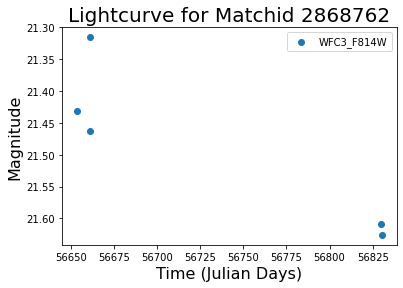

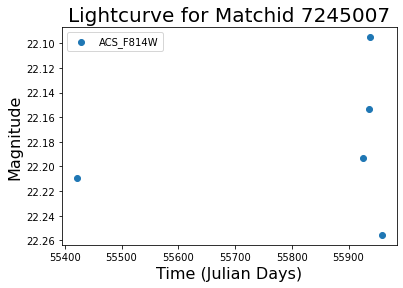

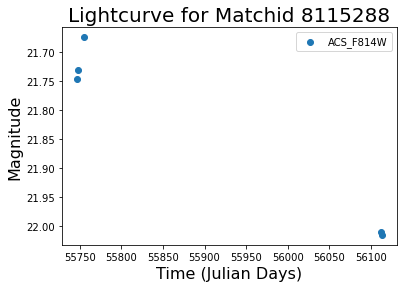

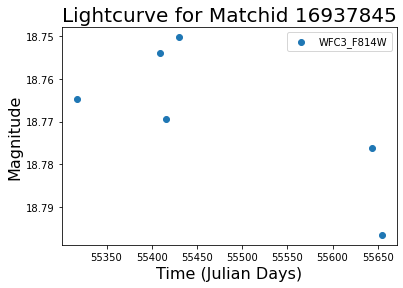

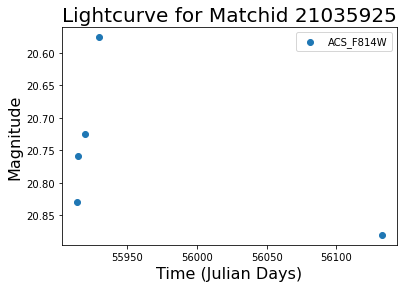

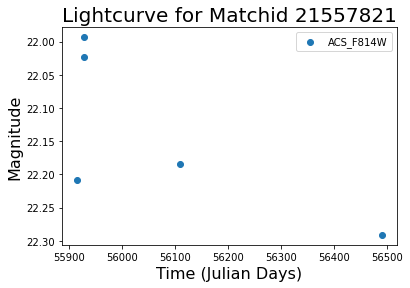

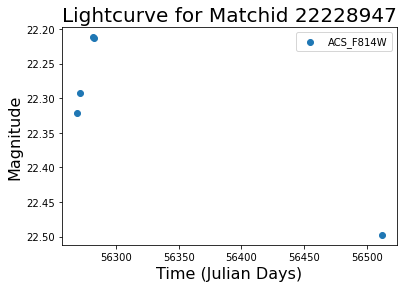

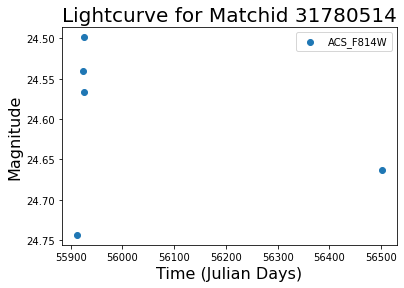

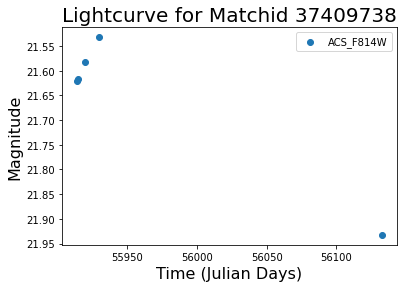

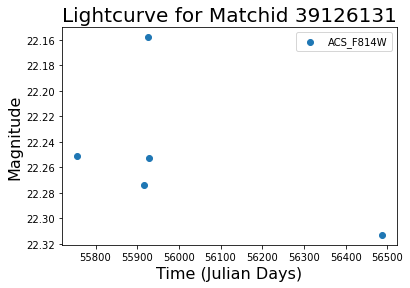

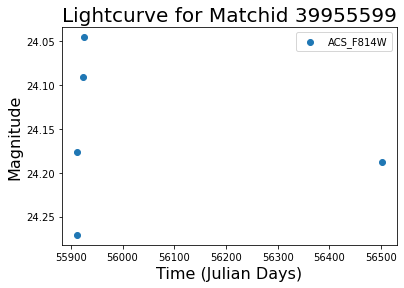

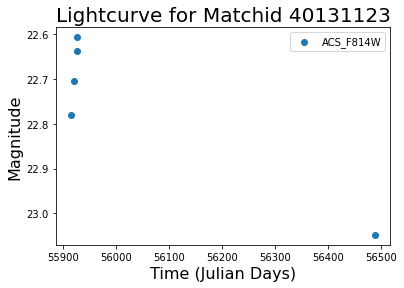

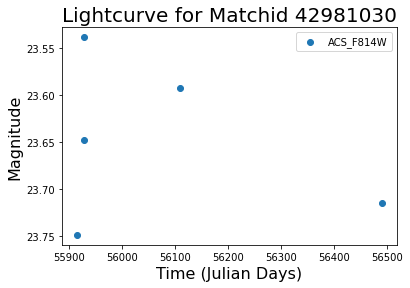

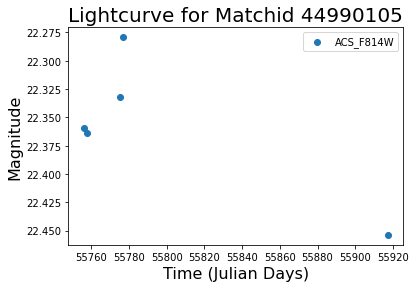

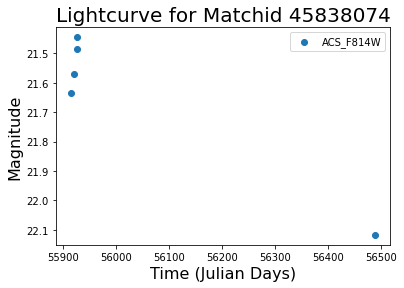

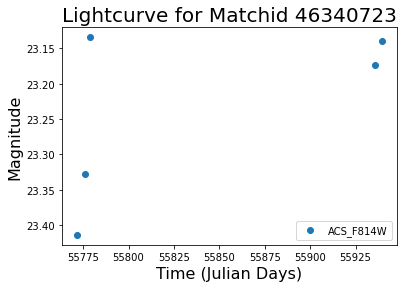

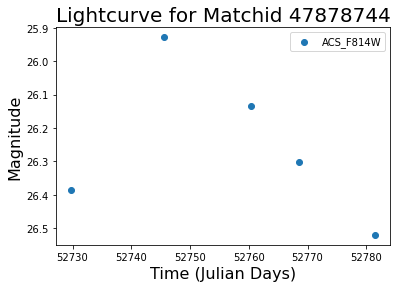

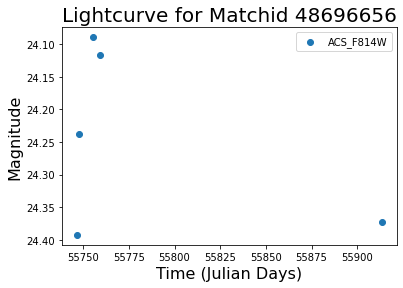

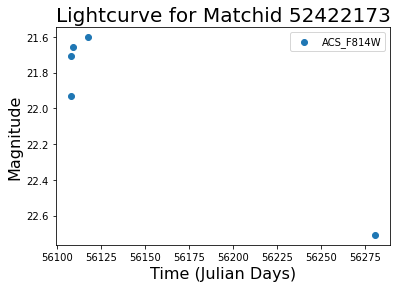

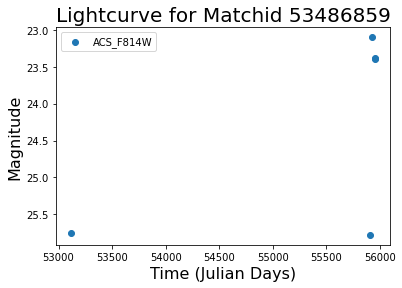

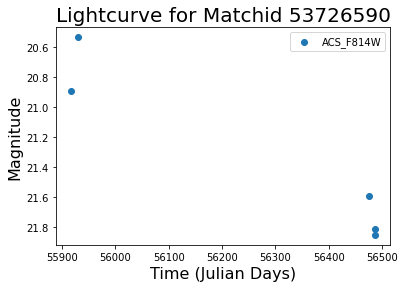

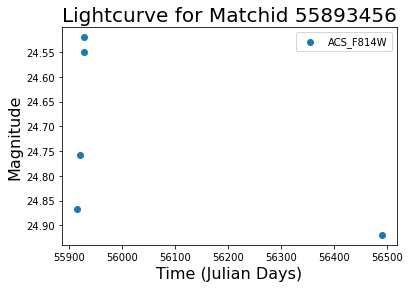

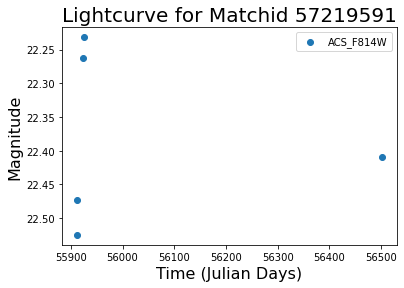

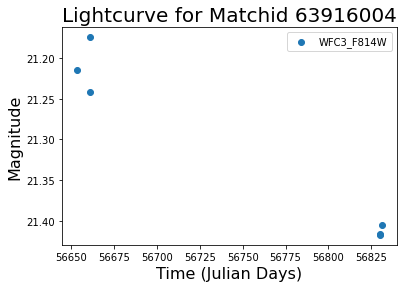

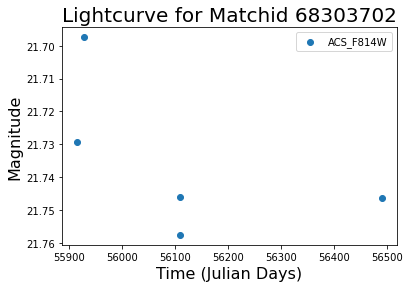

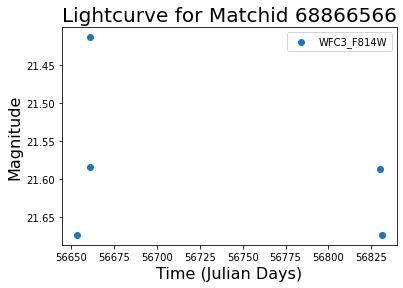

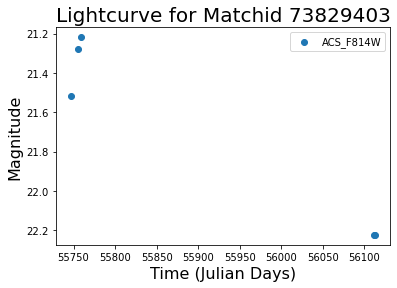

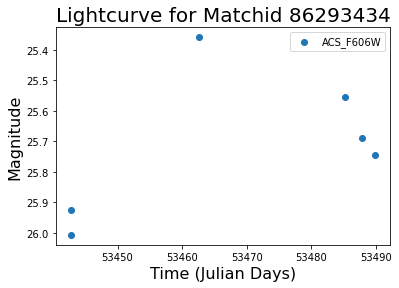

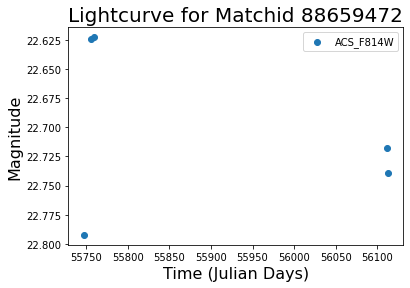

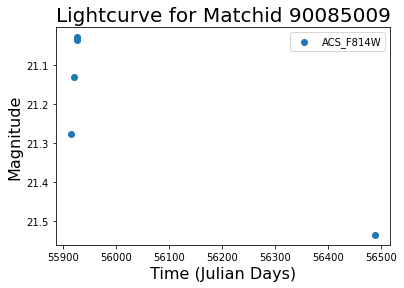

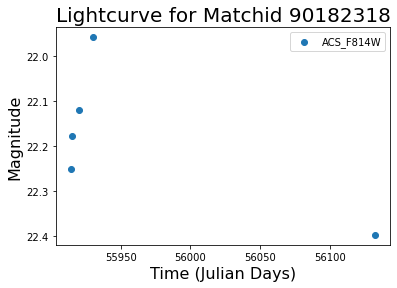

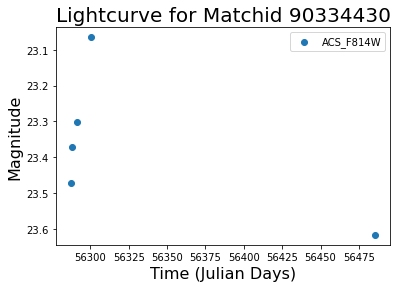

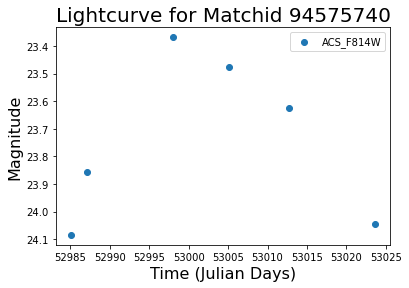

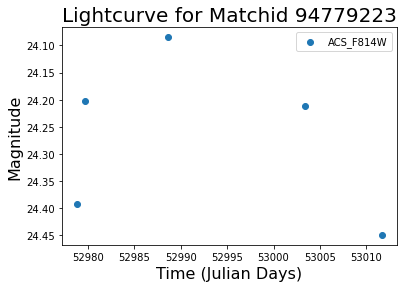

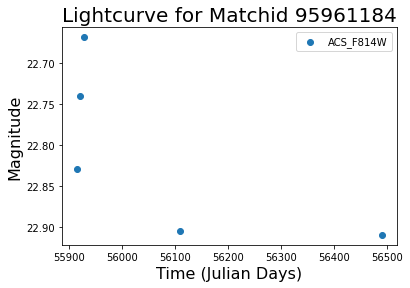

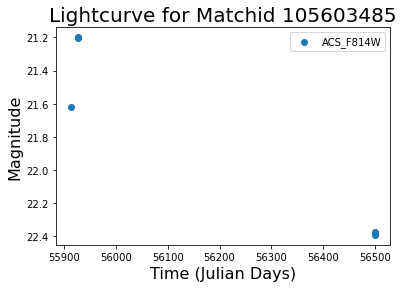

In [29]:
#plot results for complete
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4')
plot_candidates(r4_monster_matrix_smooth)

In [11]:
#call find_TDE_complete on monster_matrix_simple
r1_monster_matrix_smooth_up, r2_monster_matrix_smooth_up, r3_monster_matrix_smooth_up, r4_monster_matrix_smooth_up = find_TDE_up(monster_matrix_smooth)

In [12]:
#up--restriction 1:
r1_monster_matrix_smooth_up

matchid  groupid  num other matchids in groupid  min median mag  \
0        10480  1045904                           6492       22.457701   
1        20592    33584                           1002       19.285900   
2       196263  1045904                           6492       22.008101   
3       381627    66514                              6       25.165501   
4       518891  1039945                           4529       22.832399   
..         ...      ...                            ...             ...   
665  107671288    17120                            309       24.282499   
666  107837286  1045904                           6492       25.150499   
667  107864890  1033838                            117       25.673100   
668  107894802  1041148                            188       26.327299   
669  108048053    69810                            263       25.322650   

     max median mag  median median mag  min total time  max total time  \
0         22.457701          22.457701       13.306494       13.306494   
1         19.285900          19.285900      704.398037      704.398037   
2         22.008101          22.008101      161.571062      161.571062   
3         25.165501          25.165501        2.532941        2.532941   
4         22.365700          22.622201        3.703252        3.708594   
..              ...                ...             ...             ...   
665       21.481400          22.881950        6.609868        6.639451   
666       24.182600          24.666549      518.197552      518.203768   
667       22.866950          23.241025       11.786325     2539.031365   
668       26.327299          26.327299       68.563479       68.563479   
669       24.542200          24.932425        2.197899        2.331100   

     median mad  median chi2  ...  max max start time down  \
0      0.078466    84.376242  ...                  99999.0   
1      0.035756   155.681649  ...                  99999.0   
2      0.259449  2819.264517  ...                  99999.0   
3      0.052385     9.335254  ...                  99999.0   
4      0.015652     1.430729  ...                  99999.0   
..          ...          ...  ...                      ...   
665    0.046539     2.913007  ...                  99999.0   
666    0.106793     7.024533  ...                  99999.0   
667    0.025410    11.631186  ...                  99999.0   
668    0.306028     8.706350  ...                  99999.0   
669    0.048488    12.272307  ...                  99999.0   

     max max delta time down  max max mag down filter  num filters up  \
0                        0.0                      NaN               1   
1                        0.0                      NaN               1   
2                        0.0                      NaN               1   
3                        0.0                      NaN               1   
4                        0.0                      NaN               1   
..                       ...                      ...             ...   
665                      0.0                      NaN               1   
666                      0.0                      NaN               1   
667                      0.0                      NaN               1   
668                      0.0                      NaN               1   
669                      0.0                      NaN               1   

     num filters down  num unique filters  baseline up baseline down  \
0                   0                   1     0.198200           0.0   
1                   0                   1     0.098699           0.0   
2                   0                   1     0.828998           0.0   
3                   0                   1     0.105900           0.0   
4                   0                   2     0.000000           0.0   
..                ...                 ...          ...           ...   
665                 0                   1     0.000000           0.0   
666                 0          

In [13]:
#up--restriction 2:
r2_monster_matrix_smooth_up

matchid  groupid  num other matchids in groupid  min median mag  \
0       10480  1045904                           6492       22.457701   
1      615936  1053852                           2471       24.370701   
2     2840745  1045904                           6492       25.086100   
3     6416991  1045904                           6492       26.243000   
4    10822150  1043756                             90       24.897100   
5    11092522  1045904                           6492       25.116800   
6    11350215  1043384                           1059       25.394400   
7    15119697  1039945                           4529       23.669399   
8    16935433  1037445                            386       26.287150   
9    18038910  1037445                            386       25.311199   
10   18741614    92880                             68       26.156099   
11   20078253  1013227                            136       25.873100   
12   23717818  1013227                            136       26.388351   
13   24313281  1053852                           2471       23.683800   
14   25455714  1013227                            136       24.520100   
15   26800377    92880                             68       25.436701   
16   30761933  1053852                           2471       25.039549   
17   35109794    24555                             39       25.741100   
18   35177963  1045904                           6492       25.121099   
19   43338703  1013227                            136       25.227300   
20   47307269  1053852                           2471       24.533300   
21   48619616  1013227                            136       25.017000   
22   48786066    92880                             68       25.728901   
23   49585261  1053852                           2471       25.125900   
24   54270370  1033498                           1425       24.271500   
25   54785503  1014035                             34       24.067400   
26   54944469    33701                            913       20.319101   
27   56484983    24452                            199       25.161551   
28   60004320    37745                             10       21.009801   
29   61411891  1045904                           6492       21.362301   
30   61753488    33701                            913       19.351750   
31   62060298    24452                            199       25.470550   
32   62583153  1053852                           2471       25.755699   
33   63173575  1013227                            136       24.704549   
34   65577872  1013227                            136       22.460699   
35   67823688    33701                            913       19.875049   
36   68566870  1053852                           2471       24.832399   
37   68631163  1033573                            478       25.520551   
38   69158740    66095                            104       24.744499   
39   71118165    33701                            913       19.128801   
40   73017418  1013227                            136       24.024900   
41   74500571  1043384                           1059       25.226700   
42   76901711  1039468                             13       24.464199   
43   78826379    33701                            913       20.761351   
44   80276837  1045904                           6492       25.480101   
45   81641811  1033313                              9       23.749600   
46   83643246  1045904                           6492       25.051701   
47   84484715  1013227                            136       25.657151   
48   84683174    24452                            199       26.426800   
49   86923853  1053852                           2471       24.349199   
50   88503293    37745                             10       21.551500   
51   89599598  1033573                            478       25.497850   
52   89869062  1043384                           1059       24.816500   
53   90936150  1043384                           1059       24.9

In [14]:
#up--restriction 3:
r3_monster_matrix_smooth_up

matchid  groupid  num other matchids in groupid  min median mag  \
0       10480  1045904                           6492       22.457701   
1      615936  1053852                           2471       24.370701   
2     2840745  1045904                           6492       25.086100   
3     6416991  1045904                           6492       26.243000   
4    10822150  1043756                             90       24.897100   
5    11092522  1045904                           6492       25.116800   
6    15119697  1039945                           4529       23.669399   
7    23717818  1013227                            136       26.388351   
8    24313281  1053852                           2471       23.683800   
9    48619616  1013227                            136       25.017000   
10   49585261  1053852                           2471       25.125900   
11   54270370  1033498                           1425       24.271500   
12   54944469    33701                            913       20.319101   
13   56484983    24452                            199       25.161551   
14   60004320    37745                             10       21.009801   
15   61411891  1045904                           6492       21.362301   
16   61753488    33701                            913       19.351750   
17   62060298    24452                            199       25.470550   
18   62583153  1053852                           2471       25.755699   
19   63173575  1013227                            136       24.704549   
20   67823688    33701                            913       19.875049   
21   68566870  1053852                           2471       24.832399   
22   68631163  1033573                            478       25.520551   
23   71118165    33701                            913       19.128801   
24   74500571  1043384                           1059       25.226700   
25   76901711  1039468                             13       24.464199   
26   78826379    33701                            913       20.761351   
27   80276837  1045904                           6492       25.480101   
28   81641811  1033313                              9       23.749600   
29   83643246  1045904                           6492       25.051701   
30   84484715  1013227                            136       25.657151   
31   86923853  1053852                           2471       24.349199   
32   88503293    37745                             10       21.551500   
33   91746292  1013227                            136       25.649350   
34  100887398  1045904                           6492       24.878000   
35  102173932    92880                             68       26.341900   

    max median mag  median median mag  min total time  max total time  \
0        22.457701          22.457701       13.306494       13.306494   
1        23.985201          24.177951       16.047003       28.561772   
2        23.381701          24.233901       13.091852       13.091877   
3        25.441200          25.842100        8.977674        9.006210   
4        24.897100          24.897100       19.783959       19.783959   
5        23.270599          24.193700       11.131315       11.153293   
6        18.170900          23.043899        7.589098        7.617529   
7        25.796900          26.136299       41.568988      100.647397   
8        23.683800          23.683800       17.244028       17.244028   
9        24.732050          24.943899       41.568988      100.647397   
10       25.125900          25.125900       25.833843       25.833843   
11       24.271500          24.271500       11.253149       11.253149   
12       19.217400          19.531900      178.625617      245.581221   
13       25.078899          25.151700     3782.484185     3825.687907   
14       21.009801          21.009801       12.542425       12.542425   
15       21.362301          21.362301       13.539509       13.539509   
16       18.559600          18.746175      178.602371      336.

In [15]:
#up--restriction 4:
r4_monster_matrix_smooth_up

matchid  groupid  num other matchids in groupid  min median mag  \
0       10480  1045904                           6492       22.457701   
1      615936  1053852                           2471       24.370701   
2     2840745  1045904                           6492       25.086100   
3     6416991  1045904                           6492       26.243000   
4    10822150  1043756                             90       24.897100   
5    11092522  1045904                           6492       25.116800   
6    15119697  1039945                           4529       23.669399   
7    23717818  1013227                            136       26.388351   
8    24313281  1053852                           2471       23.683800   
9    48619616  1013227                            136       25.017000   
10   49585261  1053852                           2471       25.125900   
11   54944469    33701                            913       20.319101   
12   56484983    24452                            199       25.161551   
13   60004320    37745                             10       21.009801   
14   61411891  1045904                           6492       21.362301   
15   61753488    33701                            913       19.351750   
16   62060298    24452                            199       25.470550   
17   62583153  1053852                           2471       25.755699   
18   63173575  1013227                            136       24.704549   
19   67823688    33701                            913       19.875049   
20   68566870  1053852                           2471       24.832399   
21   71118165    33701                            913       19.128801   
22   74500571  1043384                           1059       25.226700   
23   76901711  1039468                             13       24.464199   
24   78826379    33701                            913       20.761351   
25   80276837  1045904                           6492       25.480101   
26   81641811  1033313                              9       23.749600   
27   83643246  1045904                           6492       25.051701   
28   84484715  1013227                            136       25.657151   
29   86923853  1053852                           2471       24.349199   
30   88503293    37745                             10       21.551500   
31   91746292  1013227                            136       25.649350   
32  100887398  1045904                           6492       24.878000   
33  102173932    92880                             68       26.341900   

    max median mag  median median mag  min total time  max total time  \
0        22.457701          22.457701       13.306494       13.306494   
1        23.985201          24.177951       16.047003       28.561772   
2        23.381701          24.233901       13.091852       13.091877   
3        25.441200          25.842100        8.977674        9.006210   
4        24.897100          24.897100       19.783959       19.783959   
5        23.270599          24.193700       11.131315       11.153293   
6        18.170900          23.043899        7.589098        7.617529   
7        25.796900          26.136299       41.568988      100.647397   
8        23.683800          23.683800       17.244028       17.244028   
9        24.732050          24.943899       41.568988      100.647397   
10       25.125900          25.125900       25.833843       25.833843   
11       19.217400          19.531900      178.625617      245.581221   
12       25.078899          25.151700     3782.484185     3825.687907   
13       21.009801          21.009801       12.542425       12.542425   
14       21.362301          21.362301       13.539509       13.539509   
15       18.559600          18.746175      178.602371      336.737728   
16       25.004700          25.336901     3782.484185     3825.687907   
17       25.176600          25.466150       21.506482       25.368994   
18       24.371850          24.686199       41.568988      100.

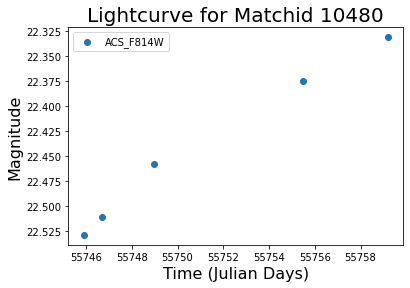

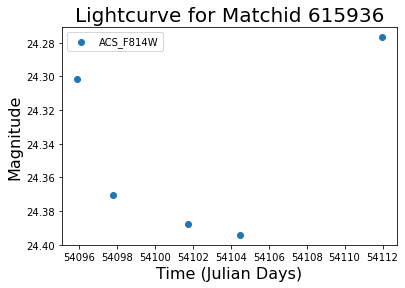

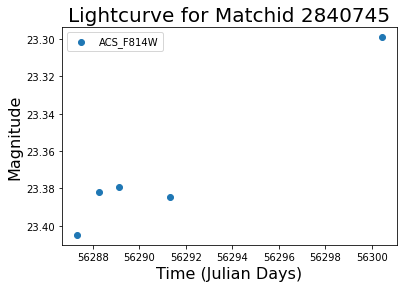

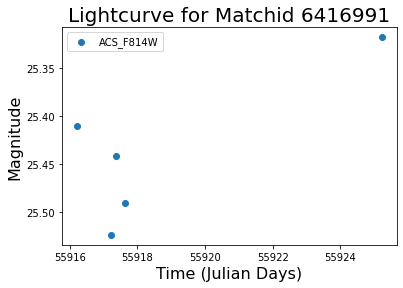

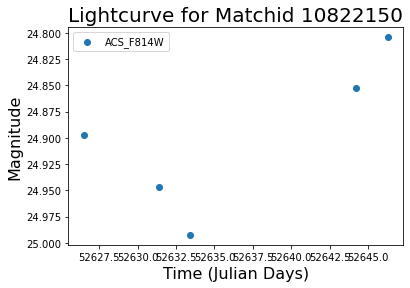

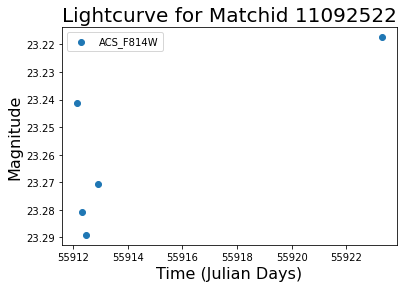

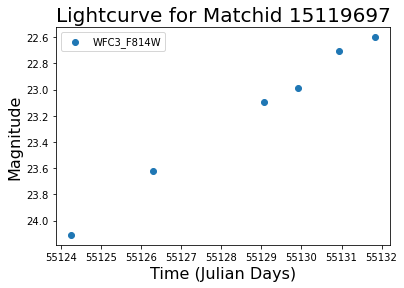

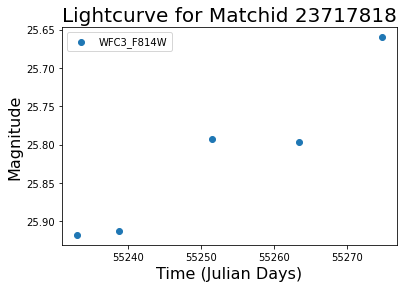

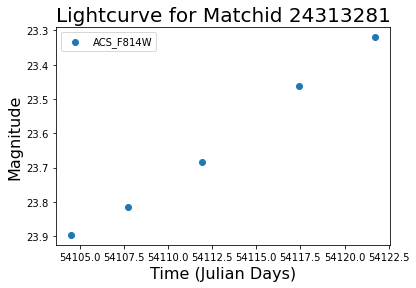

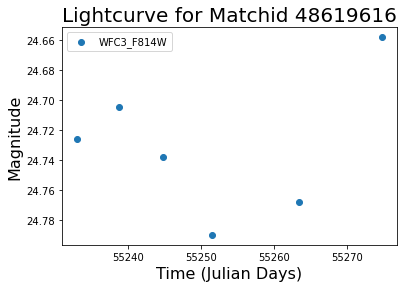

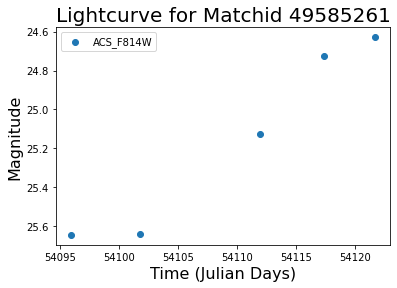

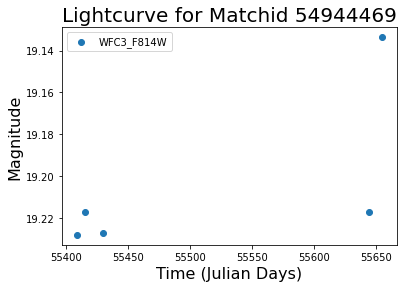

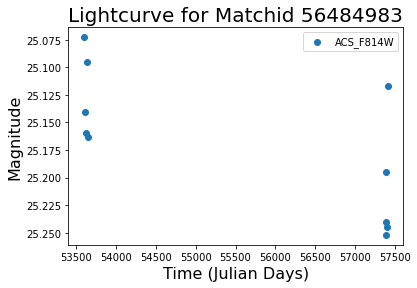

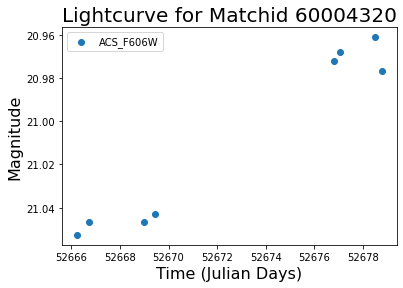

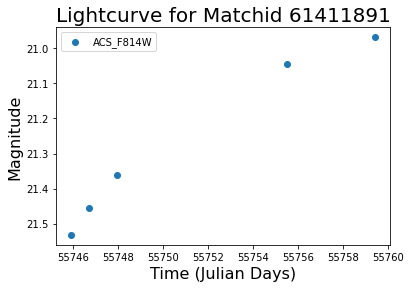

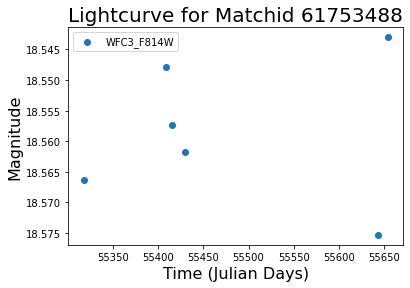

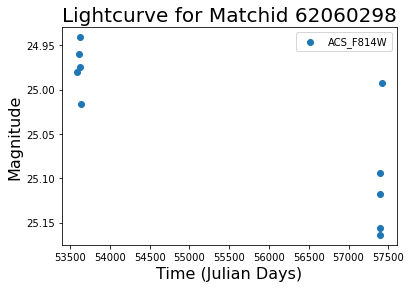

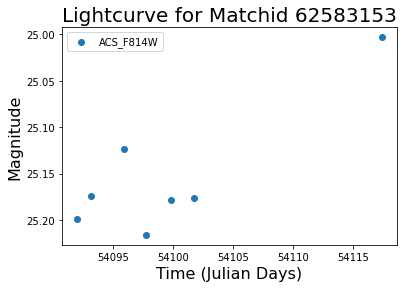

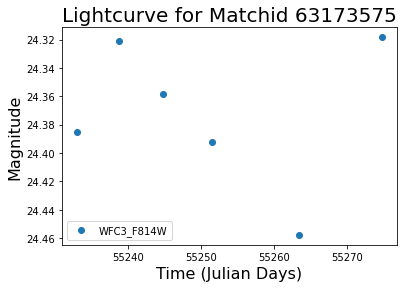

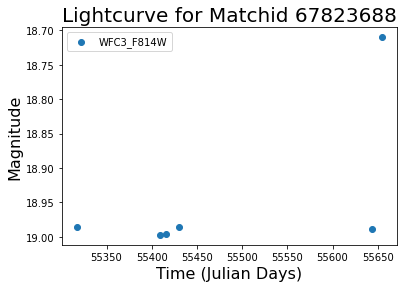

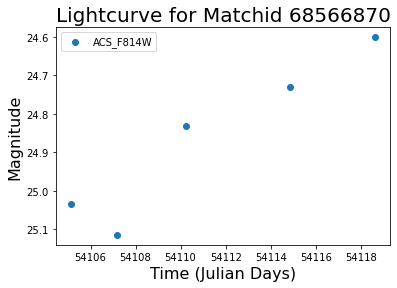

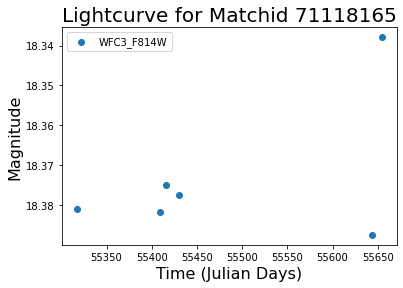

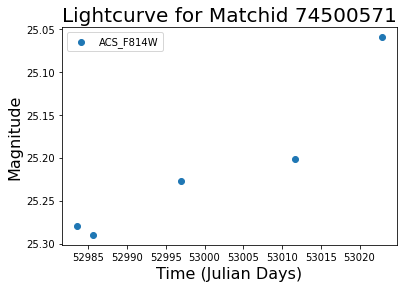

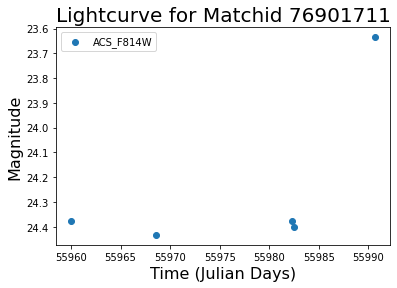

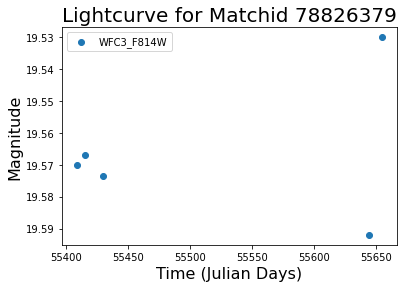

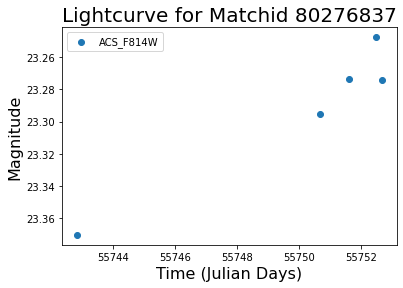

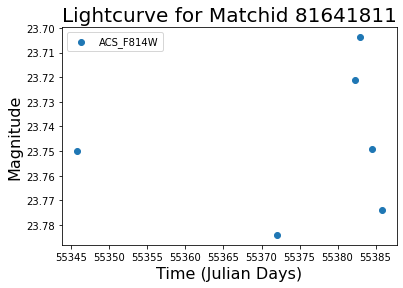

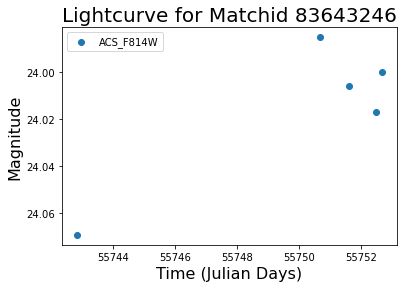

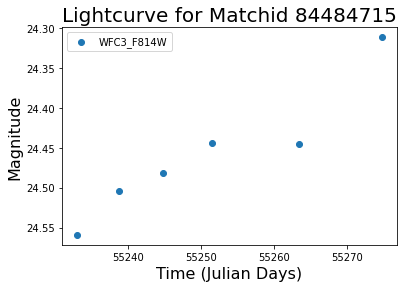

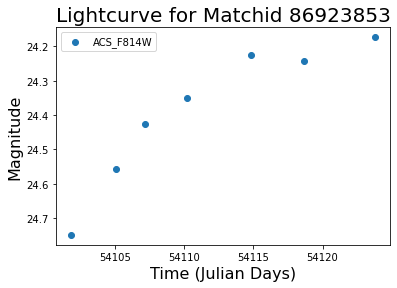

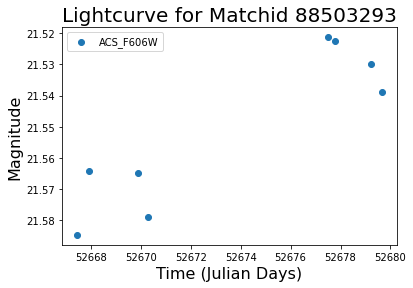

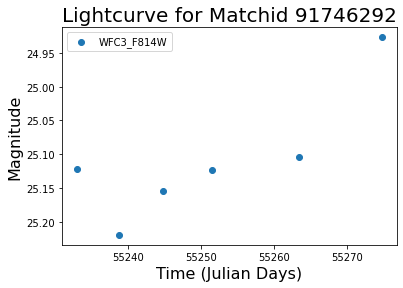

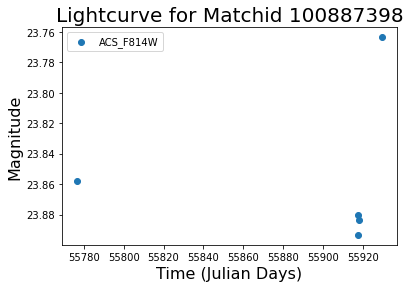

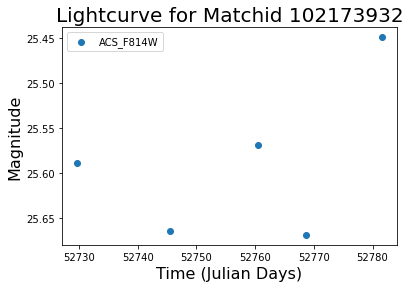

In [35]:
#plot results for flare up alone
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4/up')
plot_candidates(r4_monster_matrix_smooth_up)

In [16]:
#now for flare down only
#call find_TDE_complete on monster_matrix_simple
r1_monster_matrix_smooth_down, r2_monster_matrix_smooth_down, r3_monster_matrix_smooth_down, r4_monster_matrix_smooth_down= find_TDE_down(monster_matrix_smooth)

In [17]:
#down--restriction 1
r1_monster_matrix_smooth_down

matchid  groupid  num other matchids in groupid  min median mag  \
0       102447  1045904                           6492       25.292999   
1       156382  1045904                           6492       25.393499   
2       268826    24452                            199       26.210300   
3       413116  1063351                             74       24.683750   
4       794604    33701                            913       19.587450   
..         ...      ...                            ...             ...   
754  107706149    66095                            104       26.589199   
755  107721480    25262                            100       20.615400   
756  107762488  1045904                           6492       25.897600   
757  107834538    69810                            263       25.383050   
758  107928986    33701                            913       18.879250   

     max median mag  median median mag  min total time  max total time  \
0         24.753300          25.023149      730.359889      730.411046   
1         21.333500          23.363499      570.783851      570.833092   
2         24.754800          25.482550     3825.487879     3825.687907   
3         24.036600          24.360175        4.929954     3598.104499   
4         18.736300          18.957176      178.602371      245.581221   
..              ...                ...             ...             ...   
754       23.514601          23.795300      571.382361     4603.071873   
755       19.863501          20.239451        1.204468        1.242604   
756       22.036699          23.967150      748.997607      748.999322   
757       25.121500          25.252275        2.331100        2.331105   
758       18.195300          18.394375      178.602371      336.737728   

     median mad  median chi2  ...  max max start time down  \
0      0.166415    18.178273  ...              55755.80292   
1      0.320232  1026.240845  ...              55916.37639   
2      0.135024    22.114197  ...              53640.58609   
3      0.055800    10.998559  ...              57223.70694   
4      0.020712   286.845194  ...              55643.70973   
..          ...          ...  ...                      ...   
754    0.044800     6.070066  ...              57531.49375   
755    0.040027   582.194551  ...              56544.87544   
756    0.090205   403.767736  ...              55560.32897   
757    0.069805     2.608533  ...              53967.41328   
758    0.008835   949.733525  ...              55429.64160   

     max max delta time down  max max mag down filter  num filters up  \
0                 169.418204                ACS_F814W               0   
1                 570.783851                ACS_F814W               0   
2                3751.956835                ACS_F814W               0   
3                   0.132552                ACS_F814W               0   
4                  10.505417               WFC3_F814W               0   
..                       ...                      ...             ...   
754               189.261756                ACS_F814W               0   
755                 0.112824                ACS_F814W               0   
756               748.864540                ACS_F814W               0   
757                 0.133206                ACS_F814W               0   
758               214.068130               WFC3_F814W               0   

     num filters down  num unique filters  baseline up baseline down  \
0                   1                   1          0.0     -0.188700   
1                   1                   1          0.0     -0.525499   
2                   1                   1          0.0     -0.415501   
3                   1                   1          0.0     -0.183899   
4                   1                   1          0.0     -0.047298   
..                ...                 ...          ...           ...   
754                 1                   2          0.0      0.000000   
755                 1          

In [18]:
#down--restriction 2
r2_monster_matrix_smooth_down

matchid  groupid  num other matchids in groupid  min median mag  \
0       102447  1045904                           6492       25.292999   
1       156382  1045904                           6492       25.393499   
2       928098    12611                           7563       21.888599   
3      1096681  1041148                            188       25.194799   
4      2412977    33701                            913       19.782850   
..         ...      ...                            ...             ...   
236  107177579    33701                            913       18.736450   
237  107258837    33004                            558       22.168200   
238  107663717  1045904                           6492       23.132299   
239  107706149    66095                            104       26.589199   
240  107928986    33701                            913       18.879250   

     max median mag  median median mag  min total time  max total time  \
0         24.753300          25.023149      730.359889      730.411046   
1         21.333500          23.363499      570.783851      570.833092   
2         19.314800          20.601699      579.527015     2574.370680   
3         25.194799          25.194799       68.563479       68.563479   
4         18.873350          19.135200      178.602371      336.737728   
..              ...                ...             ...             ...   
236       18.070501          18.416799      178.625617      336.737728   
237       19.533501          20.850850       51.889434       51.922027   
238       23.132299          23.132299      570.783851      570.783851   
239       23.514601          23.795300      571.382361     4603.071873   
240       18.195300          18.394375      178.602371      336.737728   

     median mad  median chi2  ...  max max start time down  \
0      0.166415    18.178273  ...              55755.80292   
1      0.320232  1026.240845  ...              55916.37639   
2      0.035164   110.429168  ...              56365.64070   
3      0.323832    60.542251  ...              53450.26328   
4      0.022355   280.652984  ...              55429.64160   
..          ...          ...  ...                      ...   
236    0.016628    80.481509  ...              55429.64160   
237    0.024449    11.121071  ...              55512.92016   
238    0.086820   106.082208  ...              55929.21208   
239    0.044800     6.070066  ...              57531.49375   
240    0.008835   949.733525  ...              55429.64160   

     max max delta time down  max max mag down filter  num filters up  \
0                 169.418204                ACS_F814W               0   
1                 570.783851                ACS_F814W               0   
2                 273.960249               WFC3_F606W               0   
3                  60.701558                ACS_F814W               0   
4                 214.068130               WFC3_F814W               0   
..                       ...                      ...             ...   
236               224.573547               WFC3_F814W               0   
237                50.756031               WFC3_F814W               0   
238               556.950736                ACS_F814W               0   
239               189.261756                ACS_F814W               0   
240               214.068130               WFC3_F814W               0   

     num filters down  num unique filters  baseline up baseline down  \
0                   1                   1          0.0     -0.188700   
1                   1                   1          0.0     -0.525499   
2                   1                   1          0.0     -0.044698   
3                   1                   1          0.0     -0.702200   
4                   1                   1          0.0     -0.031001   
..                ...                 ...          ...           ...   
236                 1                   1          0.0     -0.135500   
237                 1          

In [19]:
#down--restriction 3
r3_monster_matrix_smooth_down

matchid  groupid  num other matchids in groupid  min median mag  \
0       102447  1045904                           6492       25.292999   
1       156382  1045904                           6492       25.393499   
2      1096681  1041148                            188       25.194799   
3      2517774  1041148                            188       26.046000   
4      2690194    33701                            913       19.265301   
..         ...      ...                            ...             ...   
102  103303019  1041148                            188       25.861401   
103  105621493  1041148                            188       26.046301   
104  105795226  1041148                            188       25.825600   
105  106348073    33004                            558       23.584801   
106  107258837    33004                            558       22.168200   

     max median mag  median median mag  min total time  max total time  \
0         24.753300          25.023149      730.359889      730.411046   
1         21.333500          23.363499      570.783851      570.833092   
2         25.194799          25.194799       68.563479       68.563479   
3         26.046000          26.046000       68.563479       68.563479   
4         18.527800          18.680500      178.602371      336.737728   
..              ...                ...             ...             ...   
102       25.861401          25.861401       68.563479       68.563479   
103       26.046301          26.046301       68.563479       68.563479   
104       25.825600          25.825600       68.563479       68.563479   
105       20.494100          22.039450       51.956969       51.989561   
106       19.533501          20.850850       51.889434       51.922027   

     median mad  median chi2  ...  max max start time down  \
0      0.166415    18.178273  ...              55755.80292   
1      0.320232  1026.240845  ...              55916.37639   
2      0.323832    60.542251  ...              53450.26328   
3      0.551589    35.682141  ...              53443.40081   
4      0.036439   522.081115  ...              55317.47742   
..          ...          ...  ...                      ...   
102    0.289576    20.517370  ...              53450.26328   
103    0.342590    22.134129  ...              53450.26328   
104    0.222784    18.532234  ...              53450.26328   
105    0.068041    22.078553  ...              55512.92016   
106    0.024449    11.121071  ...              55512.92016   

     max max delta time down  max max mag down filter  num filters up  \
0                 169.418204                ACS_F814W               0   
1                 570.783851                ACS_F814W               0   
2                  60.701558                ACS_F814W               0   
3                  67.564029                ACS_F814W               0   
4                  91.156506               WFC3_F814W               0   
..                       ...                      ...             ...   
102                60.701558                ACS_F814W               0   
103                61.701008                ACS_F814W               0   
104                60.701558                ACS_F814W               0   
105                44.812536               WFC3_F814W               0   
106                50.756031               WFC3_F814W               0   

     num filters down  num unique filters  baseline up baseline down  \
0                   1                   1          0.0     -0.188700   
1                   1                   1          0.0     -0.525499   
2                   1                   1          0.0     -0.702200   
3                   1                   1          0.0     -1.194201   
4                   1                   1          0.0     -0.036402   
..                ...                 ...          ...           ...   
102                 1                   1          0.0     -0.555099   
103                 1          

In [20]:
#down--restriction 4
r4_monster_matrix_smooth_down

matchid  groupid  num other matchids in groupid  min median mag  \
0       102447  1045904                           6492       25.292999   
1       156382  1045904                           6492       25.393499   
2      1096681  1041148                            188       25.194799   
3      2517774  1041148                            188       26.046000   
4      2690194    33701                            913       19.265301   
..         ...      ...                            ...             ...   
101  103303019  1041148                            188       25.861401   
102  105621493  1041148                            188       26.046301   
103  105795226  1041148                            188       25.825600   
104  106348073    33004                            558       23.584801   
105  107258837    33004                            558       22.168200   

     max median mag  median median mag  min total time  max total time  \
0         24.753300          25.023149      730.359889      730.411046   
1         21.333500          23.363499      570.783851      570.833092   
2         25.194799          25.194799       68.563479       68.563479   
3         26.046000          26.046000       68.563479       68.563479   
4         18.527800          18.680500      178.602371      336.737728   
..              ...                ...             ...             ...   
101       25.861401          25.861401       68.563479       68.563479   
102       26.046301          26.046301       68.563479       68.563479   
103       25.825600          25.825600       68.563479       68.563479   
104       20.494100          22.039450       51.956969       51.989561   
105       19.533501          20.850850       51.889434       51.922027   

     median mad  median chi2  ...  max max start time down  \
0      0.166415    18.178273  ...              55755.80292   
1      0.320232  1026.240845  ...              55916.37639   
2      0.323832    60.542251  ...              53450.26328   
3      0.551589    35.682141  ...              53443.40081   
4      0.036439   522.081115  ...              55317.47742   
..          ...          ...  ...                      ...   
101    0.289576    20.517370  ...              53450.26328   
102    0.342590    22.134129  ...              53450.26328   
103    0.222784    18.532234  ...              53450.26328   
104    0.068041    22.078553  ...              55512.92016   
105    0.024449    11.121071  ...              55512.92016   

     max max delta time down  max max mag down filter  num filters up  \
0                 169.418204                ACS_F814W               0   
1                 570.783851                ACS_F814W               0   
2                  60.701558                ACS_F814W               0   
3                  67.564029                ACS_F814W               0   
4                  91.156506               WFC3_F814W               0   
..                       ...                      ...             ...   
101                60.701558                ACS_F814W               0   
102                61.701008                ACS_F814W               0   
103                60.701558                ACS_F814W               0   
104                44.812536               WFC3_F814W               0   
105                50.756031               WFC3_F814W               0   

     num filters down  num unique filters  baseline up baseline down  \
0                   1                   1          0.0     -0.188700   
1                   1                   1          0.0     -0.525499   
2                   1                   1          0.0     -0.702200   
3                   1                   1          0.0     -1.194201   
4                   1                   1          0.0     -0.036402   
..                ...                 ...          ...           ...   
101                 1                   1          0.0     -0.555099   
102                 1          

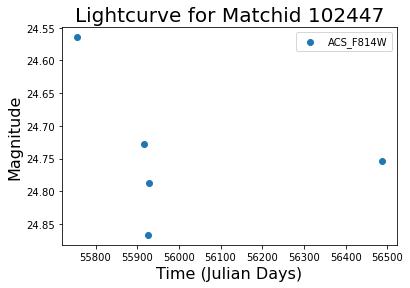

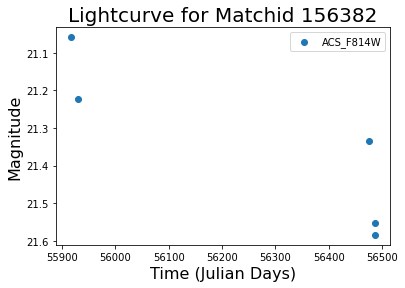

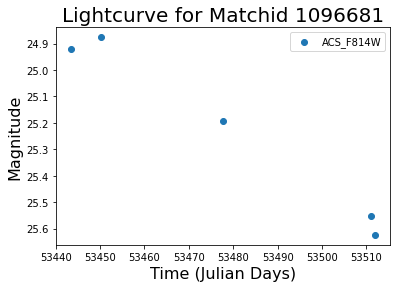

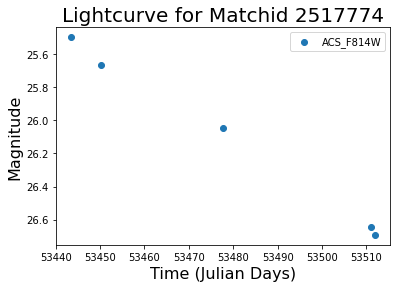

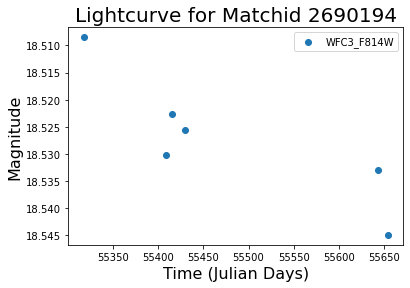

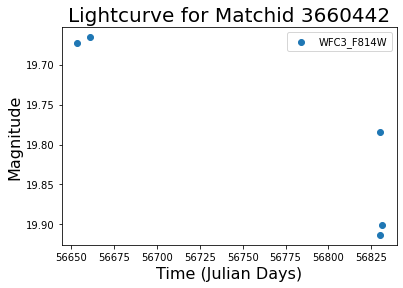

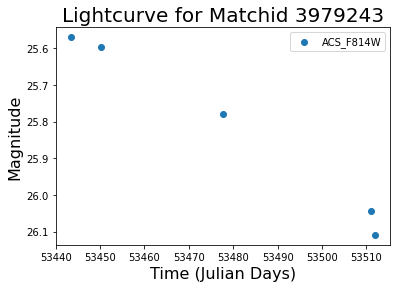

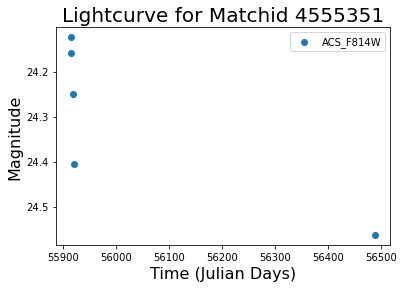

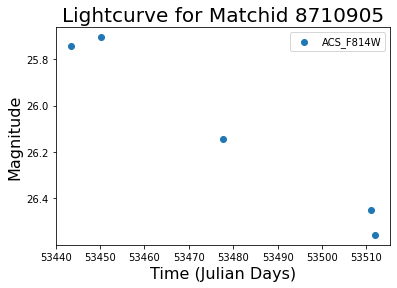

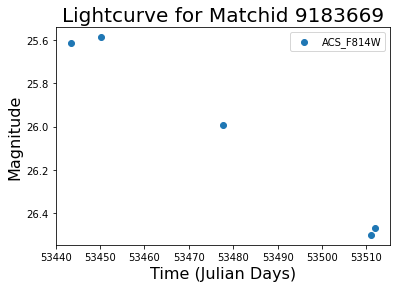

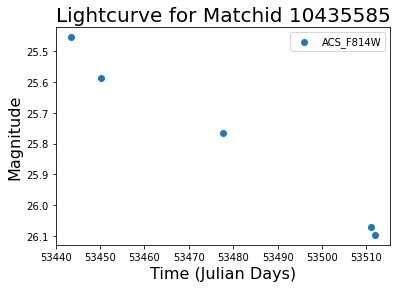

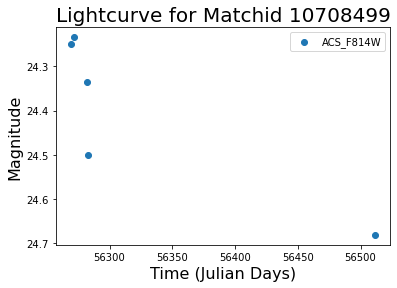

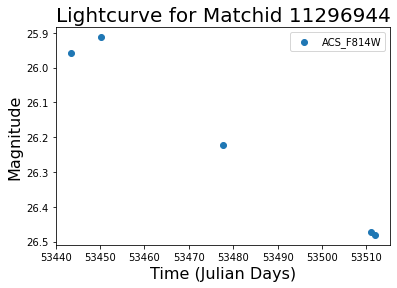

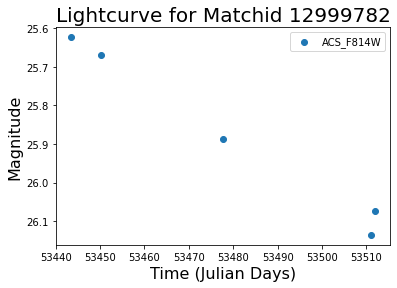

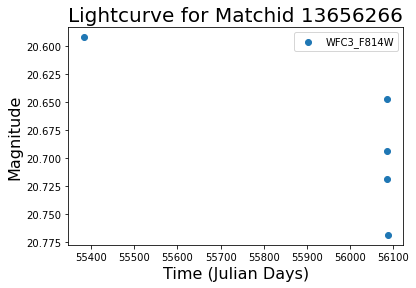

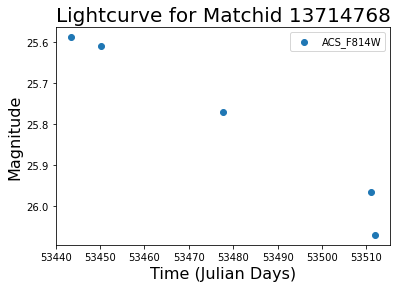

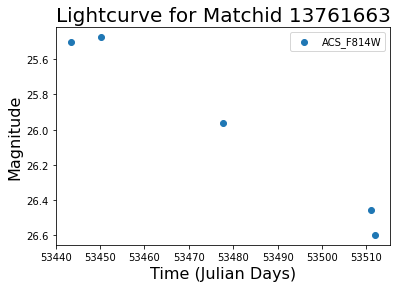

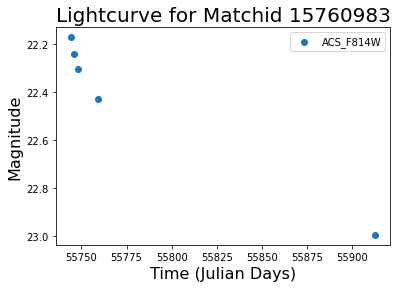

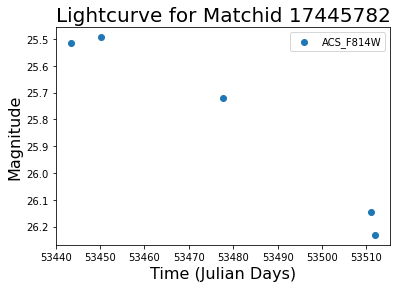

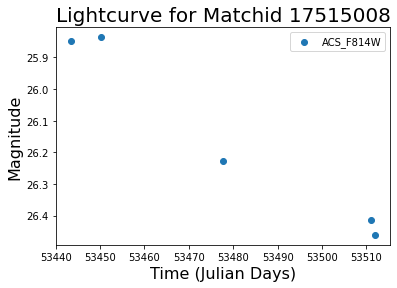

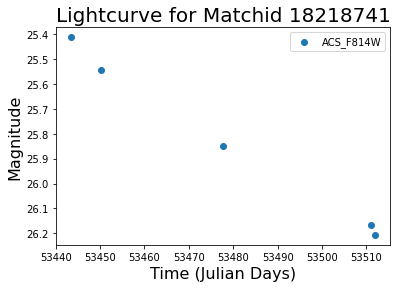

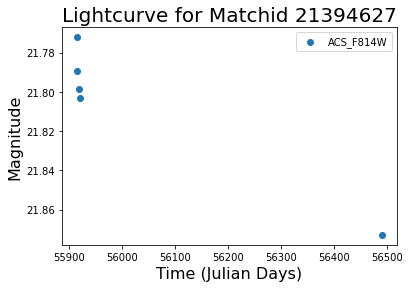

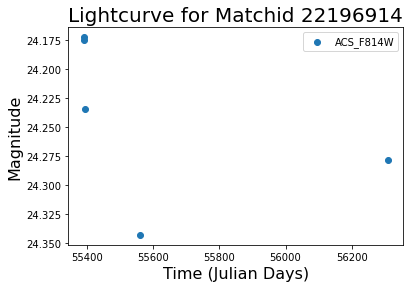

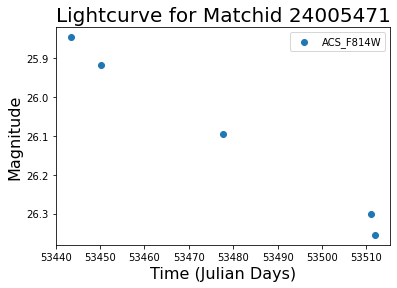

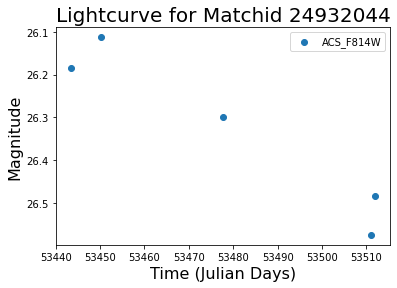

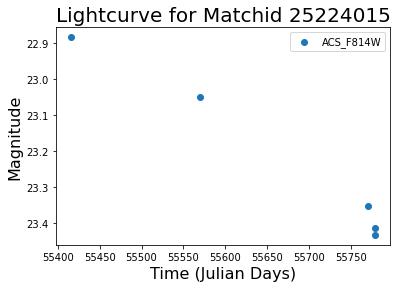

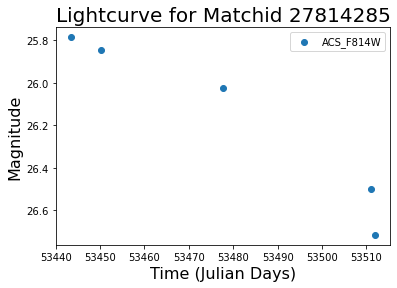

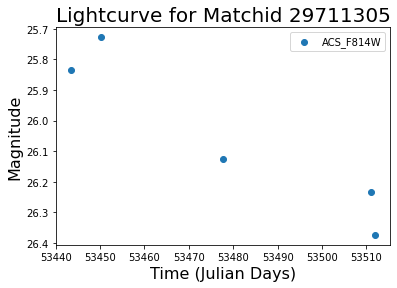

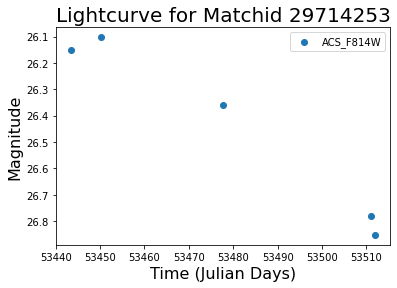

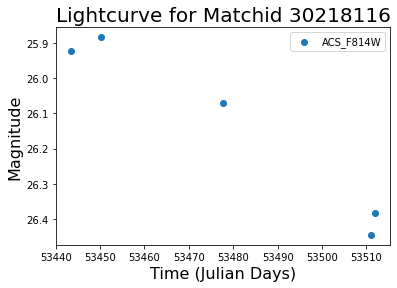

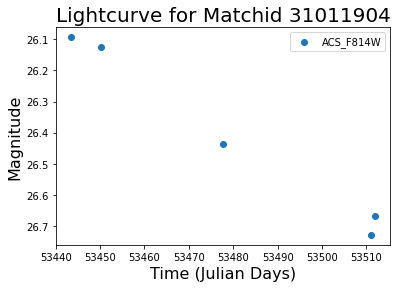

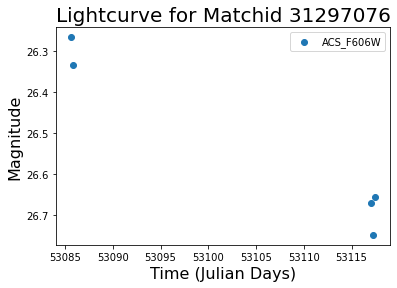

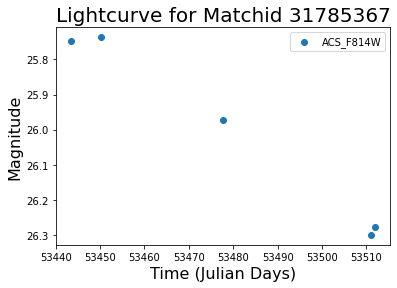

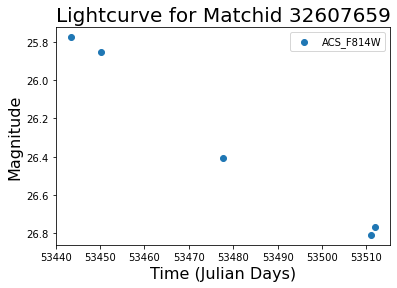

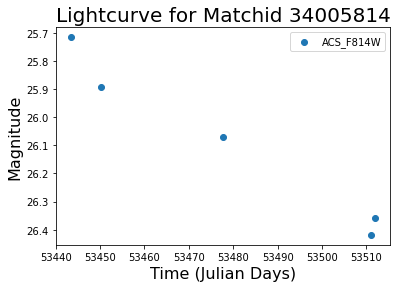

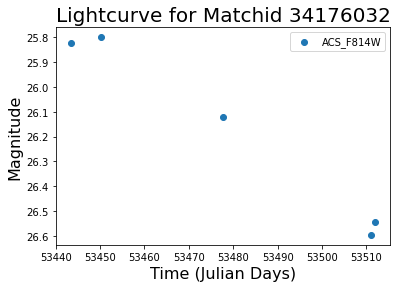

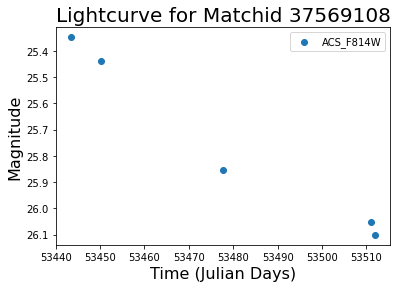

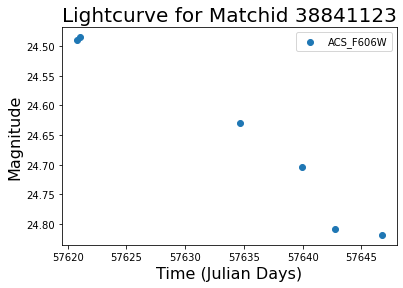

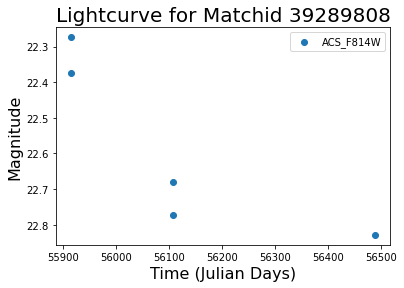

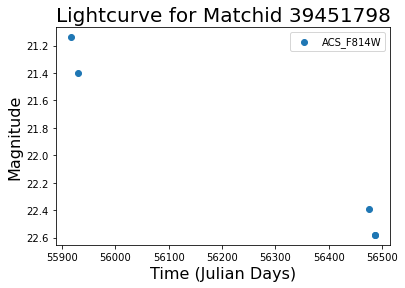

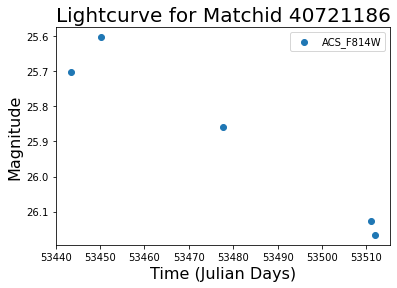

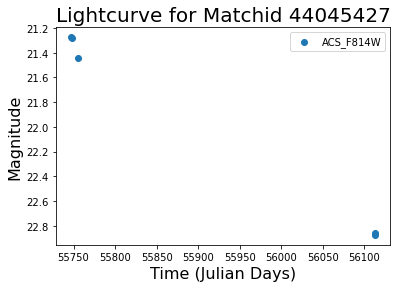

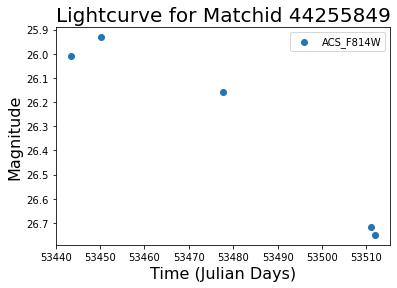

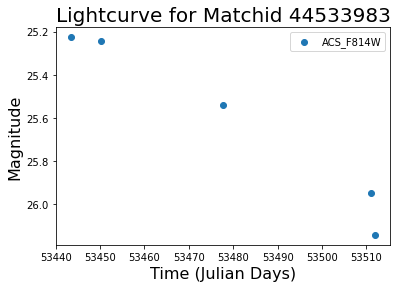

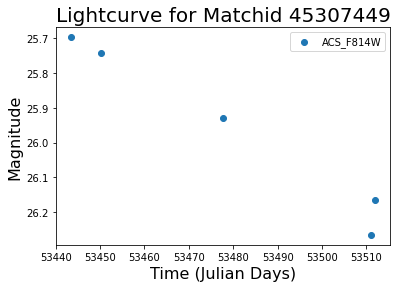

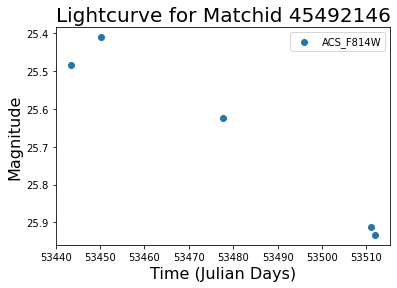

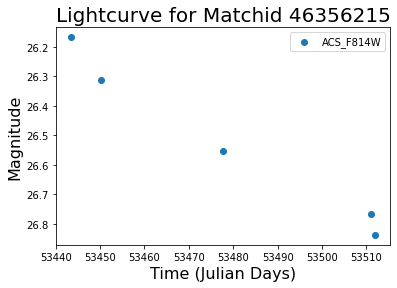

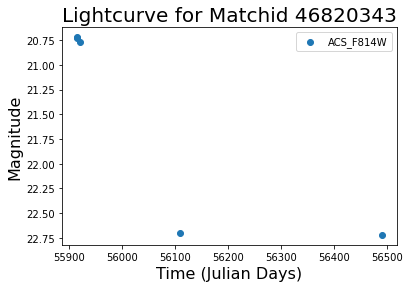

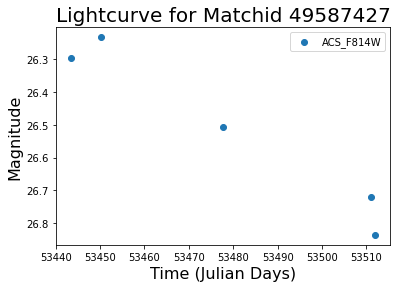

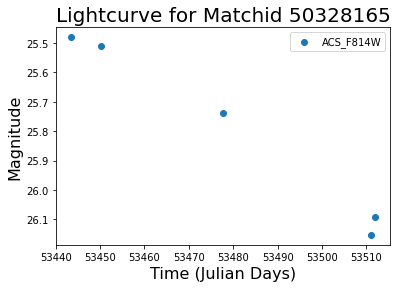

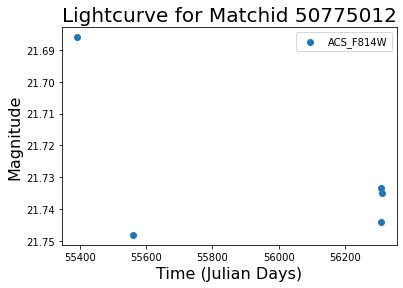

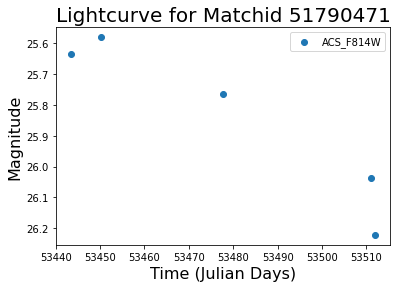

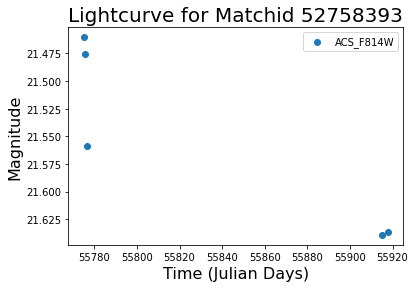

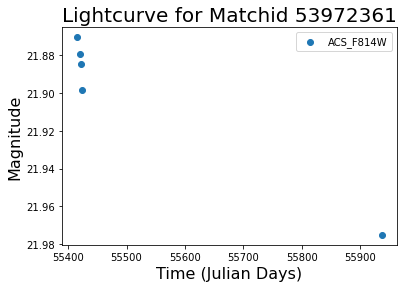

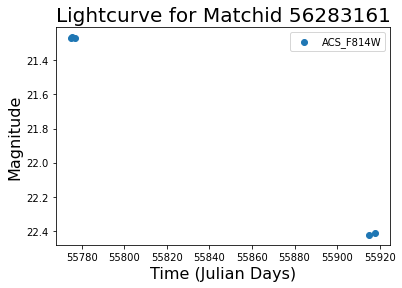

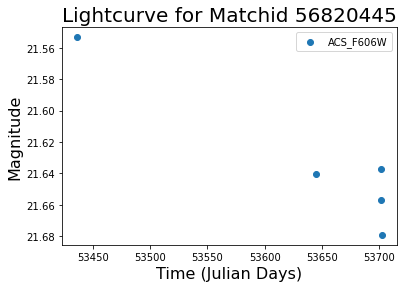

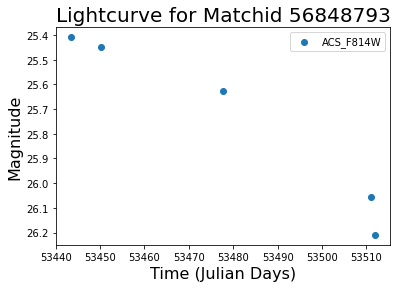

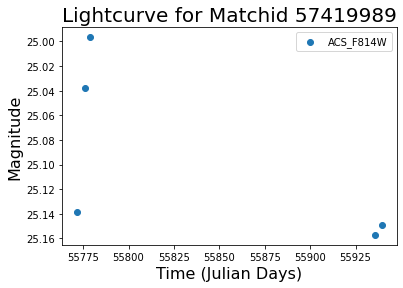

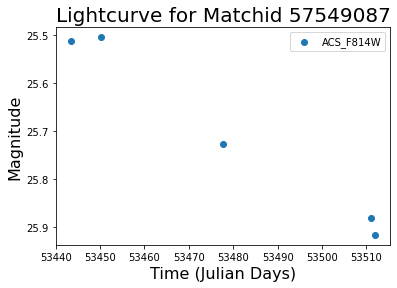

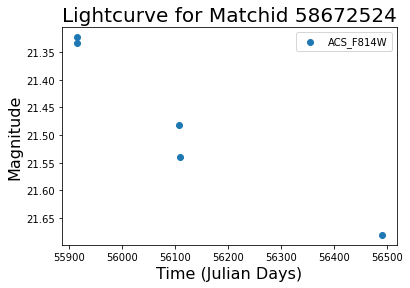

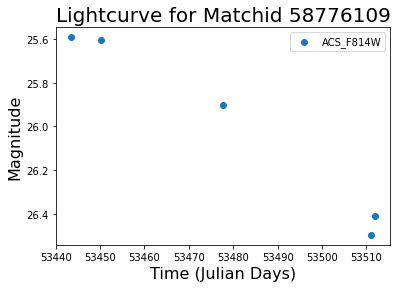

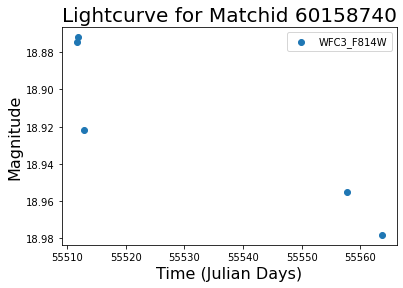

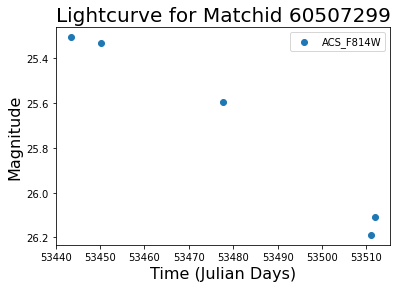

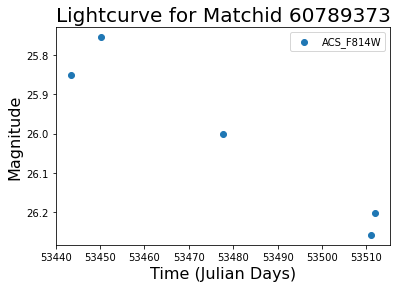

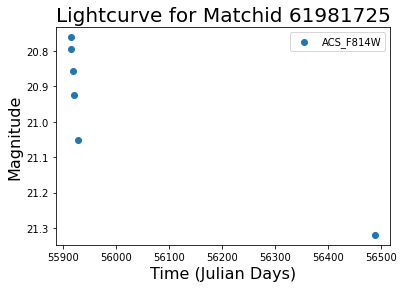

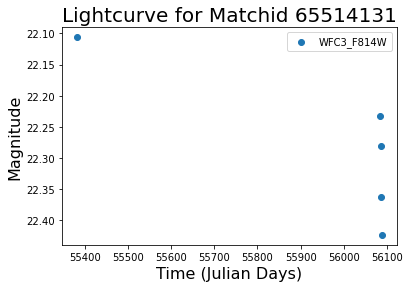

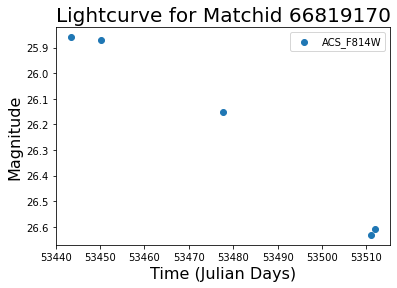

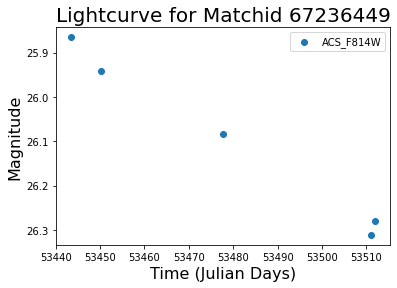

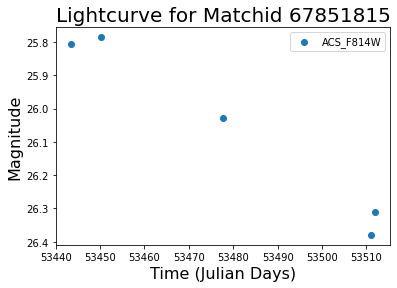

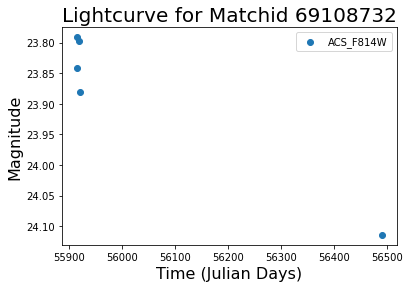

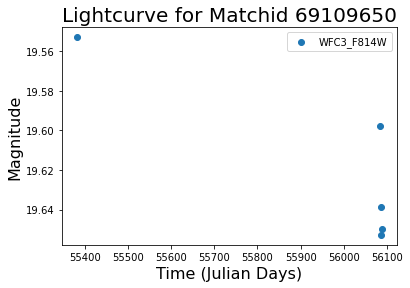

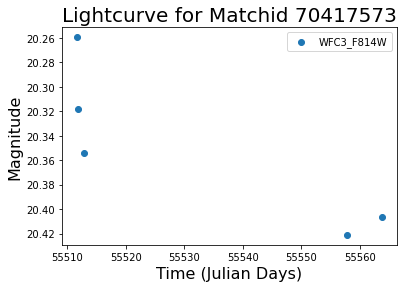

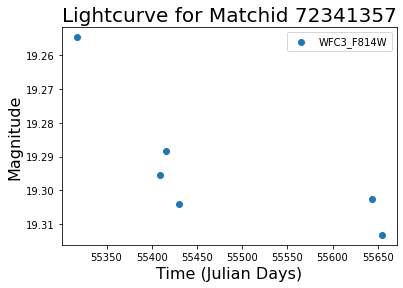

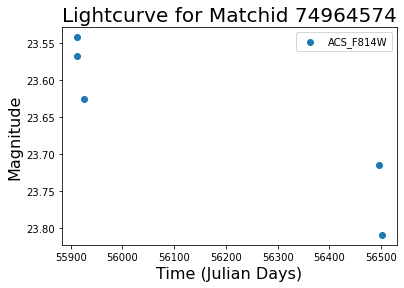

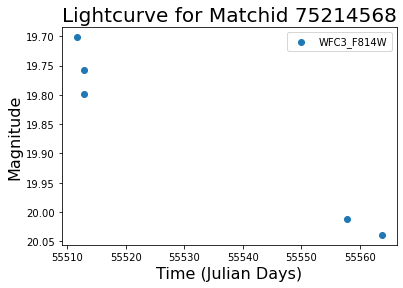

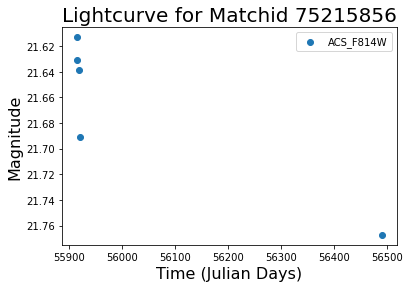

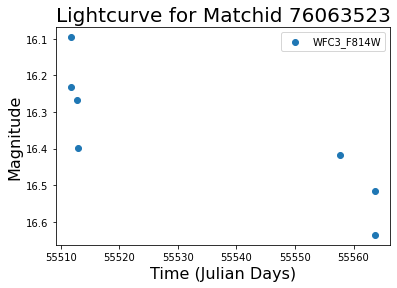

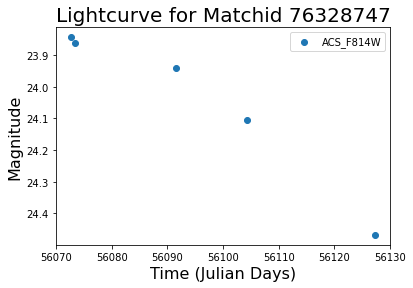

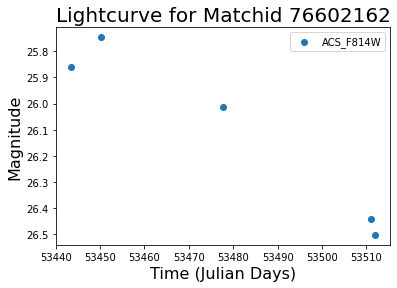

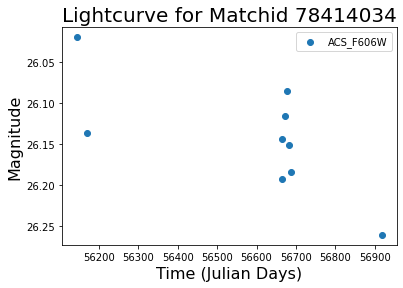

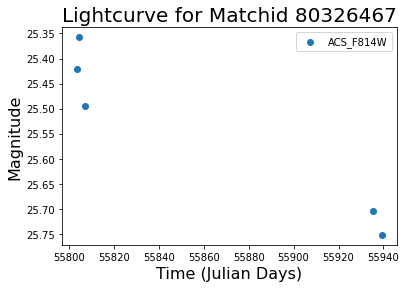

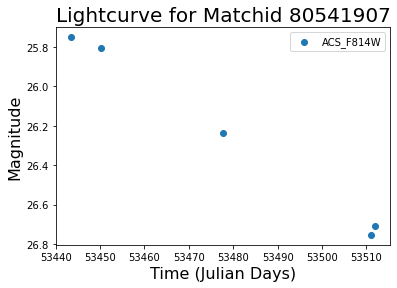

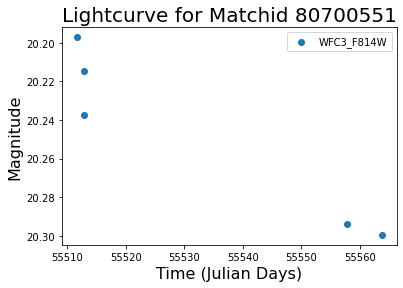

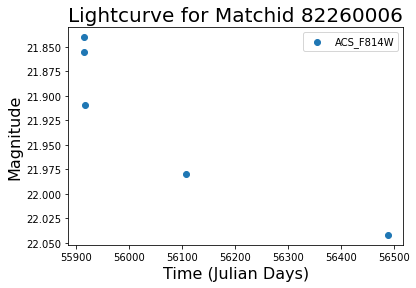

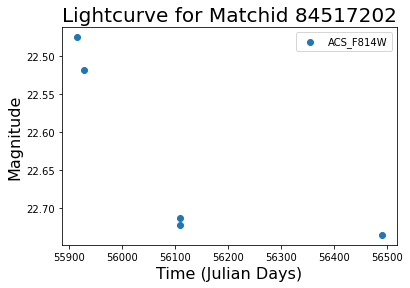

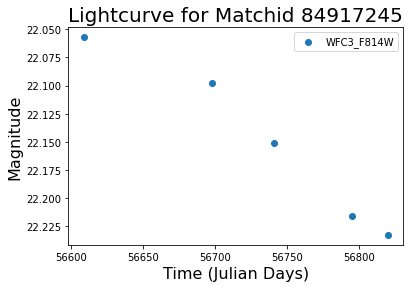

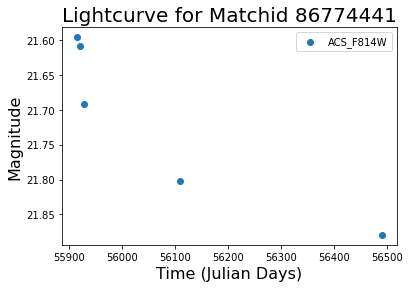

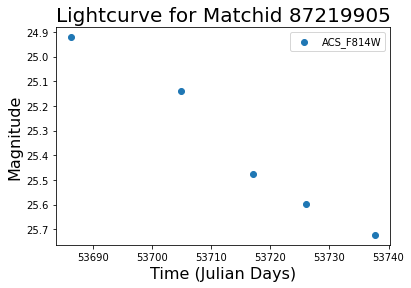

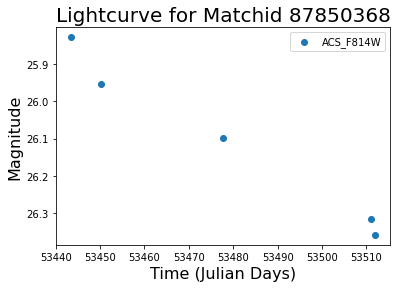

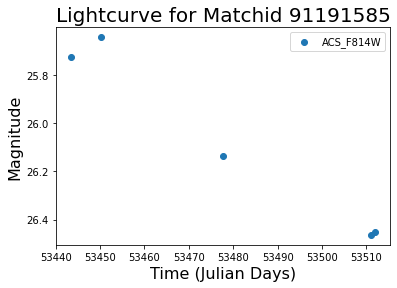

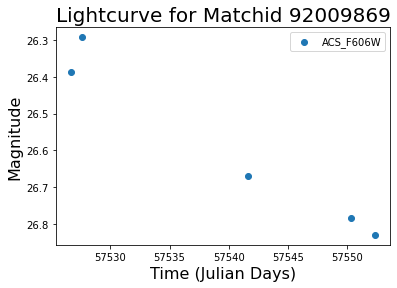

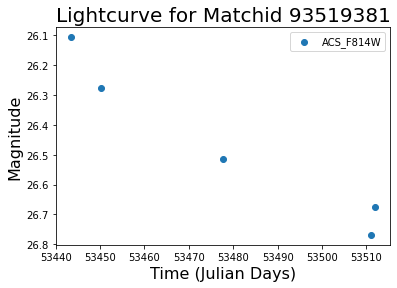

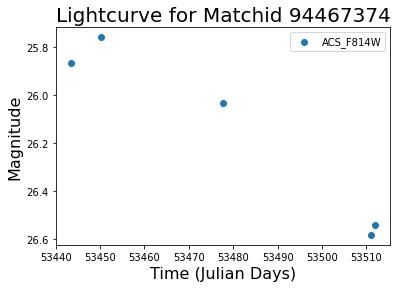

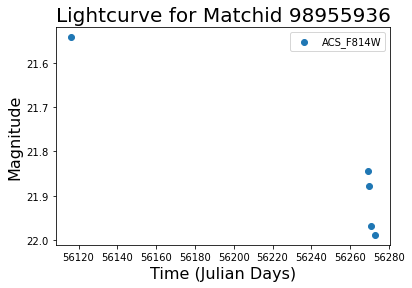

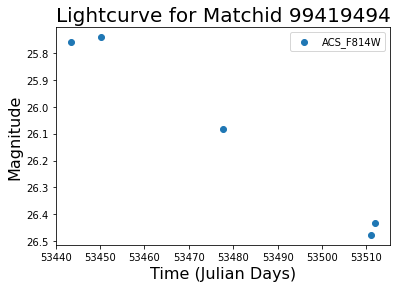

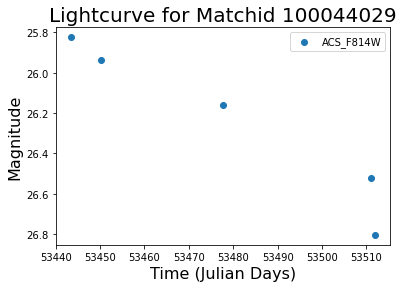

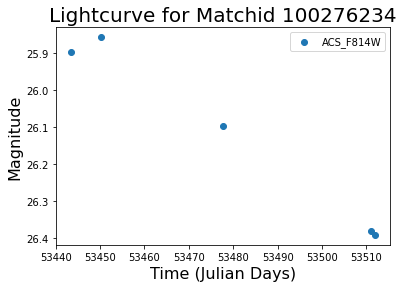

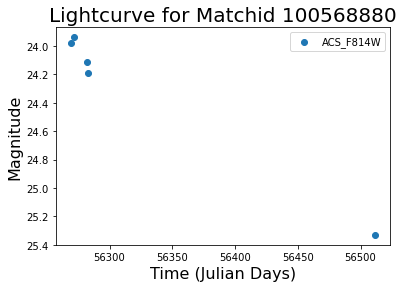

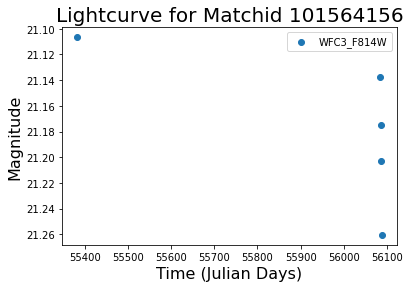

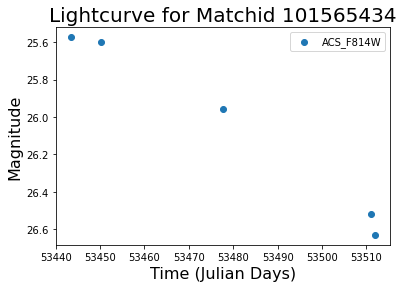

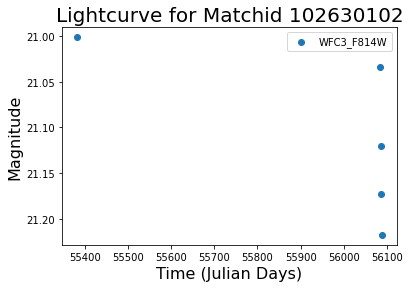

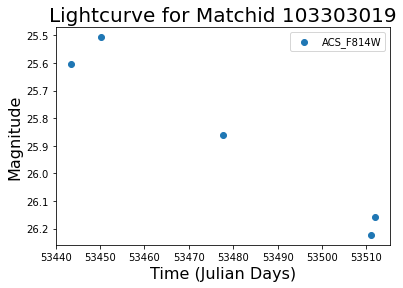

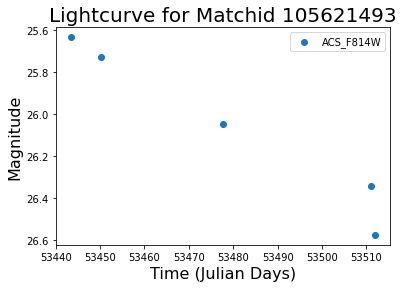

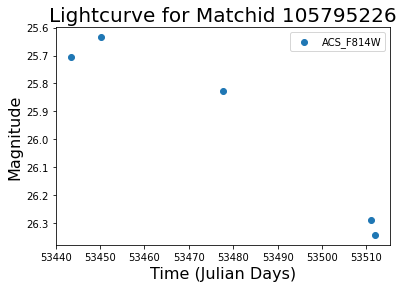

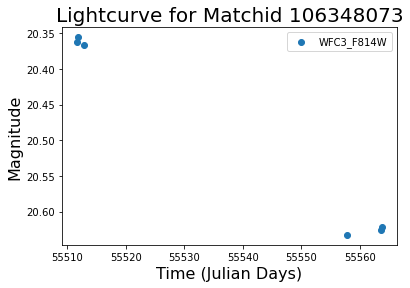

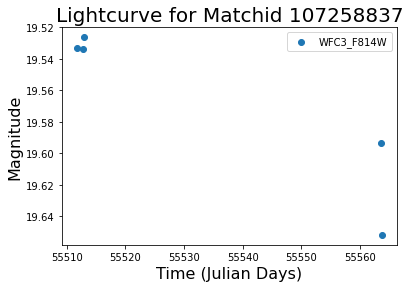

In [41]:
#plot results for flare down alone
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4/down')
plot_candidates(r4_monster_matrix_smooth_down)

### Function to take matchid and identify where it belongs in the sky

In [5]:
#reset cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')

#read in dataframe of groupid and field
groupid_field = pd.read_csv(r'./raw data/HCV_groupid_classification.csv')
groupid_field

FileNotFoundError: [Errno 2] No such file or directory: './raw data/HCV_groupid_classification.csv'

In [24]:
#takes in matchid, accesses groupid_field
def find_field_matchid(matchid):
    #create matchiddf
    matchid_df = df.loc[df['matchid']==matchid]
    
    #find groupid
    groupid = matchid_df['groupid'].values[0]
    
    #return the corresponding field
    field = groupid_field.loc[groupid_field['groupid']==groupid]['field name'].values[0]
    return field

### Function to return df of matchid, groupid, ra and dec, field name, search method (up&down, up, down)

In [25]:
#takes in restricted monster matrices for each of the three search methods
def get_candidate_summary(up_down_matrix, up_matrix, down_matrix):
    #define empty dataframe
    candidate_summary_data = {'matchid': [], 'groupid':[], 'max up filter': [], 'max down filter': [],
                              'ra': [], 'dec': [],'field name': [], 'search method': [], 'restrictions': [], 'noise':[]}
    candidate_summary_df = pd.DataFrame(candidate_summary_data)
    
    #set noise to be 'smooth'
    noise = 'SWEEPS_29_s'
    
    #get matchids from each matrix
    up_down_matchids = up_down_matrix['matchid'].values
    up_matchids = up_matrix['matchid'].values
    down_matchids = down_matrix['matchid'].values
    
    #iterate through each list of matchids and build up candidate summary]
    
    #loop for up&down
    for matchid in up_down_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'up&down'
        #0th index of restrictions list corresponds to up&down
        restriction = restrictions[0]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid, 
            'max up filter': up_filter, 'max down filter': down_filter, 
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    #loop for up
    for matchid in up_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'up'
        #1st index of restrictions list corresponds to up
        restriction = restrictions[1]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid,
            'max up filter': up_filter, 'max down filter': down_filter,
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    #loop for down
    for matchid in down_matchids:
        #get matchid_df
        matchid_df = df.loc[df['matchid']==matchid]
        matchid_monster = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==matchid]
        
        groupid = matchid_df['groupid'].values[0]
        
        up_filter = matchid_monster['max max mag up filter'].values[0]
        down_filter = matchid_monster['max max mag down filter'].values[0]
        
        ra = matchid_df['ra'].values[0]
        dec = matchid_df['dec'].values[0]
        
        field_name = find_field_matchid(matchid)
        search_method = 'down'
        #2nd index of restrictions list corresponds to down
        restriction = restrictions[2]
        
        candidate_summary_df = candidate_summary_df.append({
            'matchid': matchid, 'groupid': groupid,
            'max up filter': up_filter, 'max down filter': down_filter,
            'ra': ra, 'dec': dec, 'field name': field_name, 
            'search method': search_method, 'restrictions': restriction,
            'noise': noise
        }, ignore_index=True)
        
    return candidate_summary_df

### Get Summary!

In [26]:
candidate_summary_df = get_candidate_summary(r4_monster_matrix_smooth, r4_monster_matrix_smooth_up, r4_monster_matrix_smooth_down)
candidate_summary_df

matchid    groupid max up filter max down filter          ra  \
0      2868762.0  1059852.0    WFC3_F814W      WFC3_F814W   40.033421   
1      7245007.0  1045904.0     ACS_F814W       ACS_F814W   11.378880   
2      8115288.0  1045904.0     ACS_F814W       ACS_F814W   11.395127   
3     16937845.0    33701.0    WFC3_F814W      WFC3_F814W  287.736359   
4     21035925.0  1045904.0     ACS_F814W       ACS_F814W   11.022468   
..           ...        ...           ...             ...         ...   
171  103303019.0  1041148.0           NaN       ACS_F814W  162.097916   
172  105621493.0  1041148.0           NaN       ACS_F814W  162.085251   
173  105795226.0  1041148.0           NaN       ACS_F814W  162.125977   
174  106348073.0    33004.0           NaN      WFC3_F814W   78.511978   
175  107258837.0    33004.0           NaN      WFC3_F814W   78.527832   

           dec       field name search method  \
0   -34.539127  FORNAX-CLUSTER4       up&down   
1    41.830376              M31       up&down   
2    41.582535              M31       up&down   
3   -59.974052  PSR-J1911-5958A       up&down   
4    41.280289              M31       up&down   
..         ...              ...           ...   
171  12.646221    NGC3384-POS-W          down   
172  12.664583    NGC3384-POS-W          down   
173  12.651401    NGC3384-POS-W          down   
174 -40.043541          NGC1851          down   
175 -40.049240          NGC1851          down   

                            restrictions        noise  
0    FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
1    FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
2    FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
3    FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
4    FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
..                                   ...          ...  
171             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
172             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
173             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
174             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
175             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  

[176 rows x 10 columns]

In [76]:
#save that puppy!
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')
candidate_summary_df.to_csv('./processed data/sweeps/r4/sweeps_smooth_candidate_summary_correct.csv')

In [78]:
#find unique fields in summary
candidate_summary_df['field name'].unique()

array(['FORNAX-CLUSTER4', 'M31', 'PSR-J1911-5958A', ' NGC3370-ACS',
       'cosmos', 'UGC-07356', 'M101-A', 'M31-B379', 'STAR-0537-6910',
       'NGC5584', 'SN-2012Z', 'FIELD-140801-1126H', 'ANY',
       'ABELL1689-POS3', 'NGC3384-POS-W', 'M5', 'NGC3377-NUC1',
       'ABELL-370-HFFPAR', 'NGC104-WFC-UPDATE', 'NGC1851', 'HDF_(Merged)',
       'SN-M0416-IR', 'NGC-1856', 'NGC3021-ACS'], dtype=object)

### Select only those candidates in allowed fields

In [28]:
allowed_fields = ['FORNAX-CLUSTER4', 'Cosmos', 'FIELD-140801-1126H',  'ANY', 
                  'ABELL1689-POS3', 'NGC3377-NUC1', 'ABELL-370-HFFPAR', 'HDF_(Merged)', 'SN-M0416-IR']

#iterate through candidate summary df and save only those rows that correspond to these fields
field_candidates_df = candidate_summary_df.loc[candidate_summary_df['field name']==allowed_fields[0]].reset_index()
for i in range(1, len(allowed_fields)):
    field_candidates_df = field_candidates_df.append(candidate_summary_df.loc[candidate_summary_df['field name']==allowed_fields[i]],
                                                    ignore_index=True)
#remove first index
field_candidates_df = field_candidates_df.iloc[:,1:]
field_candidates_df

matchid    groupid max up filter max down filter          ra  \
0    2868762.0  1059852.0    WFC3_F814W      WFC3_F814W   40.033421   
1   63916004.0  1059852.0    WFC3_F814W      WFC3_F814W   40.048920   
2   68866566.0  1059852.0    WFC3_F814W      WFC3_F814W   40.033699   
3    3660442.0  1059852.0           NaN      WFC3_F814W   40.045818   
4   60004320.0    37745.0     ACS_F606W             NaN  212.016647   
5   88503293.0    37745.0     ACS_F606W             NaN  211.968964   
6   76901711.0  1039468.0     ACS_F814W             NaN  195.474686   
7   92009869.0  1074339.0           NaN       ACS_F606W  189.985535   
8   81641811.0  1033313.0     ACS_F814W             NaN  197.840393   
9   31297076.0    27681.0           NaN       ACS_F606W  161.959900   
10  38841123.0  1083558.0           NaN       ACS_F606W   40.073803   
11  76328747.0  1084534.0           NaN       ACS_F814W  189.095245   
12  78414034.0  1042781.0           NaN       ACS_F606W   64.028023   

          dec          field name search method  \
0  -34.539127     FORNAX-CLUSTER4       up&down   
1  -34.539162     FORNAX-CLUSTER4       up&down   
2  -34.536140     FORNAX-CLUSTER4       up&down   
3  -34.547409     FORNAX-CLUSTER4          down   
4  -11.352072  FIELD-140801-1126H            up   
5  -11.283259  FIELD-140801-1126H            up   
6   27.830599                 ANY            up   
7  -11.436307                 ANY          down   
8   -1.353533      ABELL1689-POS3            up   
9   13.940643        NGC3377-NUC1          down   
10  -1.631696    ABELL-370-HFFPAR          down   
11  62.366611        HDF_(Merged)          down   
12 -24.061058         SN-M0416-IR          down   

                           restrictions        noise  
0   FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
1   FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
2   FudD_ui7_uf20_di20_df720_DF_10_b_20  SWEEPS_29_s  
3              Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
4                Fu_ui7_uf20_DF_10_b_20  SWEEPS_29_s  
5                Fu_ui7_uf20_DF_10_b_20  SWEEPS_29_s  
6                Fu_ui7_uf20_DF_10_b_20  SWEEPS_29_s  
7              Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
8                Fu_ui7_uf20_DF_10_b_20  SWEEPS_29_s  
9              Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
10             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
11             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s  
12             Fd_di20_df720_DF_10_b_20  SWEEPS_29_s

In [55]:
#save that puppy!
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')
field_candidates_df.to_csv('./processed data/sweeps/r4/sweeps_smooth_candidate_summary_field_restricted.csv')

In [43]:
#export images and save a monster matrix of these candidates
candidate_matchids = field_candidates_df['matchid'].unique()

#populate monster matrix
field_candidates_monster_matrix = monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==candidate_matchids[0]].reset_index()
for i in range(1, len(candidate_matchids)):
    field_candidates_monster_matrix = field_candidates_monster_matrix.append(
          monster_matrix_smooth.loc[monster_matrix_smooth['matchid']==candidate_matchids[i]], ignore_index=True
     ) 
#remove old indices
field_candidates_monster_matrix = field_candidates_monster_matrix.iloc[:,1:]
field_candidates_monster_matrix

matchid  groupid  num other matchids in groupid  min median mag  \
0    2868762  1059852                             80       23.245251   
1   63916004  1059852                             80       24.147299   
2   68866566  1059852                             80       21.919701   
3    3660442  1059852                             80       21.337700   
4   60004320    37745                             10       21.009801   
5   88503293    37745                             10       21.551500   
6   76901711  1039468                             13       24.464199   
7   92009869  1074339                              3       26.670601   
8   81641811  1033313                              9       23.749600   
9   31297076    27681                             12       26.655300   
10  38841123  1083558                             24       24.713000   
11  76328747  1084534                            217       23.942499   
12  78414034  1042781                             81       26.143900   

    max median mag  median median mag  min total time  max total time  \
0        21.462999          21.697501      176.584082      177.336756   
1        21.323500          22.491300      177.336756      177.370182   
2        21.586700          21.753200      177.336756      177.370182   
3        19.783701          20.560700      177.336756      177.370182   
4        21.009801          21.009801       12.542425       12.542425   
5        21.551500          21.551500       12.188871       12.188871   
6        24.378401          24.456600       30.734063       30.736112   
7        26.670601          26.670601       25.703496       25.703496   
8        23.749600          23.749600       40.010701       40.010701   
9        26.655300          26.655300       31.864155       31.864155   
10       24.379601          24.666351       25.900354       50.881355   
11       23.942499          23.942499       54.693276       54.693276   
12       23.187099          23.437000      715.315968      783.481352   

    median mad  median chi2  ...  max max start time down  \
0     0.226616    49.950226  ...              56661.12642   
1     0.018812     0.842674  ...              56661.12642   
2     0.176250    69.358084  ...              56661.23093   
3     0.057816    47.204696  ...              56661.12642   
4     0.040093   503.922951  ...              99999.00000   
5     0.028574   128.025174  ...              99999.00000   
6     0.014169    82.313697  ...              99999.00000   
7     0.178328     7.709151  ...              57527.59190   
8     0.035379     8.943919  ...              99999.00000   
9     0.087877     8.925664  ...              53085.80292   
10    0.090865    58.531071  ...              57621.07303   
11    0.087897    75.299874  ...              56073.33800   
12    0.023936     2.780832  ...              56144.77756   

    max max delta time down  max max mag down filter  num filters up  \
0                168.743129               WFC3_F814W               1   
1                168.743129               WFC3_F814W               1   
2                169.700328               WFC3_F814W               1   
3                169.018731               WFC3_F814W               0   
4                  0.000000                      NaN               1   
5                  0.000000                      NaN               1   
6                  0.000000                      NaN               1   
7                 22.697258                ACS_F606W               0   
8                  0.000000                      NaN               1   
9                 31.264416                ACS_F606W               0   
10                21.654115                ACS_F606W               0   
11                53.998143                ACS_F814W               0   
12                25.947644                ACS_F606W               0   

    num filters down  num unique filters  baseline up baseline down  \
0                  1                  

In [46]:
#sset cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin')

In [47]:
#save new monster!
field_candidates_monster_matrix.to_csv('./processed data/sweeps/r4/candidate_field_restricted_mm.csv')

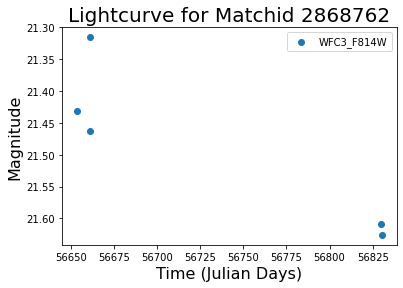

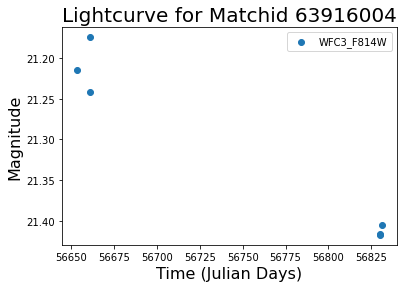

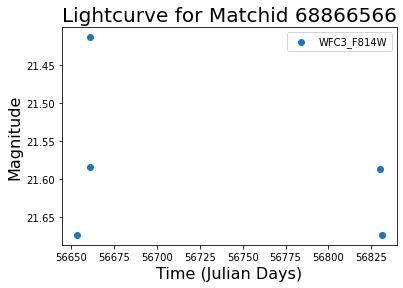

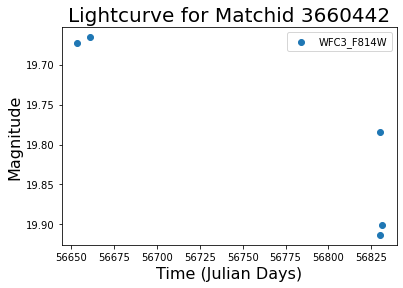

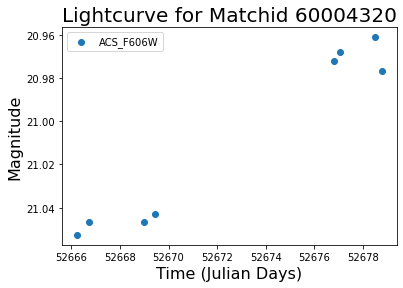

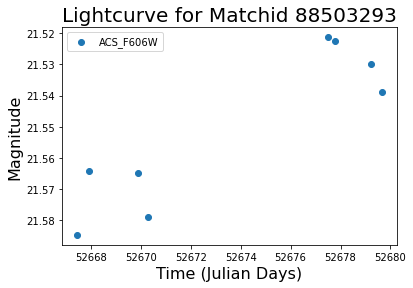

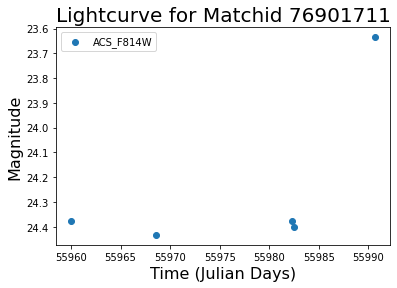

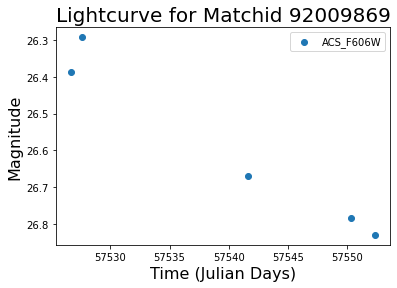

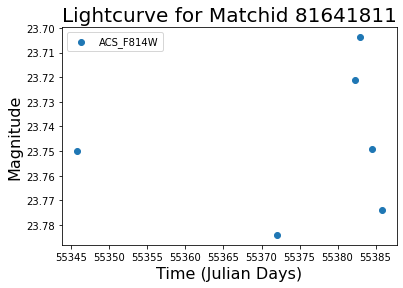

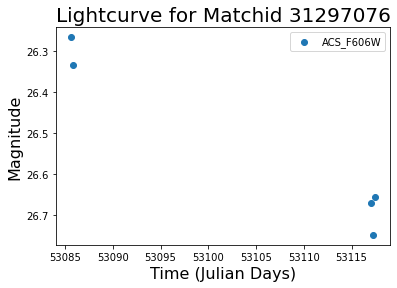

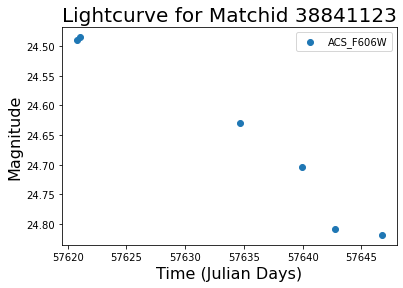

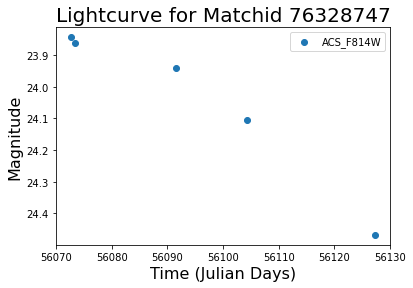

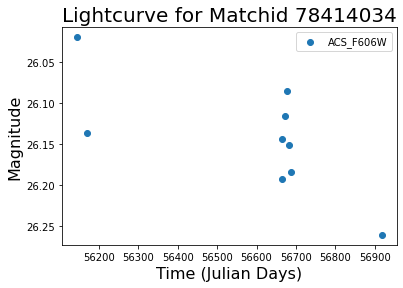

In [52]:
#plot images!!
#first change cwd
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4/field restricted/lightcurves')
plot_candidates(field_candidates_monster_matrix)

### Acquiring images for SWEEPS candidates

In [8]:
smooth_candidates = pd.read_csv(r'./processed data/sweeps/r4/field restricted/candidate_field_restricted_mm.csv')
smooth_candidates = smooth_candidates.iloc[:, 1:]
smooth_candidates

matchid  groupid  num other matchids in groupid  min median mag  \
0    2868762  1059852                             80       23.245251   
1   63916004  1059852                             80       24.147299   
2   68866566  1059852                             80       21.919701   
3    3660442  1059852                             80       21.337700   
4   60004320    37745                             10       21.009801   
5   88503293    37745                             10       21.551500   
6   76901711  1039468                             13       24.464199   
7   92009869  1074339                              3       26.670601   
8   81641811  1033313                              9       23.749600   
9   31297076    27681                             12       26.655300   
10  38841123  1083558                             24       24.713000   
11  76328747  1084534                            217       23.942499   
12  78414034  1042781                             81       26.143900   

    max median mag  median median mag  min total time  max total time  \
0        21.462999          21.697501      176.584082      177.336756   
1        21.323500          22.491300      177.336756      177.370182   
2        21.586700          21.753200      177.336756      177.370182   
3        19.783701          20.560700      177.336756      177.370182   
4        21.009801          21.009801       12.542425       12.542425   
5        21.551500          21.551500       12.188871       12.188871   
6        24.378401          24.456600       30.734063       30.736112   
7        26.670601          26.670601       25.703496       25.703496   
8        23.749600          23.749600       40.010701       40.010701   
9        26.655300          26.655300       31.864155       31.864155   
10       24.379601          24.666351       25.900354       50.881355   
11       23.942499          23.942499       54.693276       54.693276   
12       23.187099          23.437000      715.315968      783.481352   

    median mad  median chi2  ...  max max start time down  \
0     0.226616    49.950226  ...              56661.12642   
1     0.018812     0.842674  ...              56661.12642   
2     0.176250    69.358084  ...              56661.23093   
3     0.057816    47.204696  ...              56661.12642   
4     0.040093   503.922951  ...              99999.00000   
5     0.028574   128.025174  ...              99999.00000   
6     0.014169    82.313697  ...              99999.00000   
7     0.178328     7.709151  ...              57527.59190   
8     0.035379     8.943919  ...              99999.00000   
9     0.087877     8.925664  ...              53085.80292   
10    0.090865    58.531071  ...              57621.07303   
11    0.087897    75.299874  ...              56073.33800   
12    0.023936     2.780832  ...              56144.77756   

    max max delta time down  max max mag down filter  num filters up  \
0                168.743129               WFC3_F814W               1   
1                168.743129               WFC3_F814W               1   
2                169.700328               WFC3_F814W               1   
3                169.018731               WFC3_F814W               0   
4                  0.000000                      NaN               1   
5                  0.000000                      NaN               1   
6                  0.000000                      NaN               1   
7                 22.697258                ACS_F606W               0   
8                  0.000000                      NaN               1   
9                 31.264416                ACS_F606W               0   
10                21.654115                ACS_F606W               0   
11                53.998143                ACS_F814W               0   
12                25.947644                ACS_F606W               0   

    num filters down  num unique filters  baseline up baseline down  \
0                  1                  

In [19]:
smooth_candidates_summary = pd.read_csv('./processed data/sweeps/r4/field restricted/sweeps_smooth_candidate_summary_field_restricted.csv')
smooth_candidates_summary = smooth_candidates_summary.iloc[:, 1:]
smooth_candidates_summary

matchid  groupid max up filter max down filter          ra        dec  \
0    2868762  1059852    WFC3_F814W      WFC3_F814W   40.033421 -34.539127   
1   63916004  1059852    WFC3_F814W      WFC3_F814W   40.048920 -34.539162   
2   68866566  1059852    WFC3_F814W      WFC3_F814W   40.033699 -34.536140   
3    3660442  1059852           NaN      WFC3_F814W   40.045818 -34.547409   
4   60004320    37745     ACS_F606W             NaN  212.016647 -11.352072   
5   88503293    37745     ACS_F606W             NaN  211.968964 -11.283259   
6   76901711  1039468     ACS_F814W             NaN  195.474686  27.830599   
7   92009869  1074339           NaN       ACS_F606W  189.985535 -11.436307   
8   81641811  1033313     ACS_F814W             NaN  197.840393  -1.353533   
9   31297076    27681           NaN       ACS_F606W  161.959900  13.940643   
10  38841123  1083558           NaN       ACS_F606W   40.073803  -1.631696   
11  76328747  1084534           NaN       ACS_F814W  189.095245  62.366611   
12  78414034  1042781           NaN       ACS_F606W   64.028023 -24.061058   

            field name search method                         restrictions  \
0      FORNAX-CLUSTER4       up&down  FudD_ui7_uf20_di20_df720_DF_10_b_20   
1      FORNAX-CLUSTER4       up&down  FudD_ui7_uf20_di20_df720_DF_10_b_20   
2      FORNAX-CLUSTER4       up&down  FudD_ui7_uf20_di20_df720_DF_10_b_20   
3      FORNAX-CLUSTER4          down             Fd_di20_df720_DF_10_b_20   
4   FIELD-140801-1126H            up               Fu_ui7_uf20_DF_10_b_20   
5   FIELD-140801-1126H            up               Fu_ui7_uf20_DF_10_b_20   
6                  ANY            up               Fu_ui7_uf20_DF_10_b_20   
7                  ANY          down             Fd_di20_df720_DF_10_b_20   
8       ABELL1689-POS3            up               Fu_ui7_uf20_DF_10_b_20   
9         NGC3377-NUC1          down             Fd_di20_df720_DF_10_b_20   
10    ABELL-370-HFFPAR          down             Fd_di20_df720_DF_10_b_20   
11        HDF_(Merged)          down             Fd_di20_df720_DF_10_b_20   
12         SN-M0416-IR          down             Fd_di20_df720_DF_10_b_20   

          noise                                    description  
0   SWEEPS_29_s                                  not in center  
1   SWEEPS_29_s     not clear if object is star or in a galaxy  
2   SWEEPS_29_s              in galaxy, but not exactly center  
3   SWEEPS_29_s                          not found in Explorer  
4   SWEEPS_29_s    low res, but could be near center of galaxy  
5   SWEEPS_29_s                worse res than above, not clear  
6   SWEEPS_29_s                                  same as above  
7   SWEEPS_29_s                          not found in Explorer  
8   SWEEPS_29_s                       not clear what object is  
9   SWEEPS_29_s     not clear if object is star or in a galaxy  
10  SWEEPS_29_s  could be in galaxy; not exactly on the center  
11  SWEEPS_29_s               in galaxy/nebula, but on fringes  
12  SWEEPS_29_s     in the center of something; maybe galaxy??

In [14]:
print('WFC3_F336W'.lower() in 'hst_13435_09_wfc3_uvis_f336w')

False


In [32]:
#get image id for first candidate
matchid_df = df.loc[df['matchid']==2868762]
image_id_list_pre = matchid_df['lightcurve_i'].tolist()

allowed_filters = []
#now we need to narrow down this list to find the ids matchind the max flare up and/or flare down
search_method = smooth_candidates_summary.loc[smooth_candidates_summary['matchid']==2868762]['search method'].values[0]
print(search_method)
if search_method== 'up&down':
    #get list of up and down filters
    max_up_filter = smooth_candidates['max max mag up filter'].values[0]
    max_down_filter = smooth_candidates['max max mag down filter'].values[0]
    allowed_filters.append(max_up_filter)
    allowed_filters.append(max_down_filter)
elif search_method =='up':
    #get up fitler
    max_up_filter = smooth_candidates['max max mag up filter'].values[0]
    allowed_filters.append(max_up_filter)
else:
    #get down filter
    max_down_filter = smooth_candidates['max max mag down filter'].values[0]
    allowed_filters.append(max_down_filter)

#now go through each of the allowed filters and get updated image_id_list
unique_allowed = list(set(allowed_filters))
image_id_list = []
for filter_type in unique_allowed:
    filter_lower = filter_type.lower()
    filter_split = filter_lower.split('_')
    filter_new = filter_split[0] + '_uvis_'+filter_split[1]
    #print(filter_new)
    for image_id in image_id_list_pre:
        if filter_new in image_id:
            image_id_list.append(image_id)

print(image_id_list_pre)
print(image_id_list)
                           
#get ra and dec to search near the position of the image
ra, dec = matchid_df['ra'].values[0], matchid_df['dec'].values[0]
ra_dec = str(ra)+' ' +str(dec)
print(ra_dec)

up&down
['hst_13435_11_wfc3_uvis_f336w', 'hst_13435_09_wfc3_uvis_f336w', 'hst_13435_10_wfc3_uvis_f336w', 'hst_13435_08_wfc3_uvis_f336w', 'hst_13435_06_wfc3_uvis_f336w', 'hst_13435_07_wfc3_uvis_f336w', 'hst_13435_11_wfc3_uvis_f438w', 'hst_13435_09_wfc3_uvis_f438w', 'hst_13435_10_wfc3_uvis_f438w', 'hst_13435_08_wfc3_uvis_f438w', 'hst_13435_06_wfc3_uvis_f438w', 'hst_13435_07_wfc3_uvis_f438w', 'hst_13435_11_wfc3_uvis_f814w', 'hst_13435_09_wfc3_uvis_f814w', 'hst_13435_10_wfc3_uvis_f814w', 'hst_13435_08_wfc3_uvis_f814w', 'hst_13435_06_wfc3_uvis_f814w']
['hst_13435_11_wfc3_uvis_f814w', 'hst_13435_09_wfc3_uvis_f814w', 'hst_13435_10_wfc3_uvis_f814w', 'hst_13435_08_wfc3_uvis_f814w', 'hst_13435_06_wfc3_uvis_f814w']
40.03342056274414 -34.53912734985352


In [33]:
import astropy
from astroquery.mast import Observations

obs_table = Observations.query_region(ra_dec)
data_products_by_obs = Observations.get_product_list(obs_table)
data_df = astropy.table.Table.to_pandas(data_products_by_obs)
data_hst = data_df.loc[data_df['obs_collection']=='HST']
data_hst

obsID obs_collection dataproduct_type  \
3956   26306615            HST            image   
3957   26306615            HST            image   
3958   26306615            HST            image   
3959   26306615            HST            image   
3960   26306615            HST            image   
...         ...            ...              ...   
15854  24711310            HST            image   
15855  24711310            HST            image   
15856  24711310            HST            image   
15857  24711310            HST            image   
15858  24711310            HST            image   

                                  obs_id  \
3956   hst_13435_06_acs_wfc_f475w_jcb006   
3957   hst_13435_06_acs_wfc_f475w_jcb006   
3958   hst_13435_06_acs_wfc_f475w_jcb006   
3959   hst_13435_06_acs_wfc_f475w_jcb006   
3960   hst_13435_06_acs_wfc_f475w_jcb006   
...                                  ...   
15854                          ua0f050cm   
15855                          ua0f050cm   
15856                          ua0f050cm   
15857                          ua0f050cm   
15858                          ua0f050cm   

                                             description type  \
3956                                    HAP trailer file    D   
3957                                    HAP trailer file    D   
3958                                    HAP trailer file    D   
3959                                        Preview-Full    D   
3960                                        Preview-Full    D   
...                                                  ...  ...   
15854                                      DADS C1M file    S   
15855  DADS D0F file - Raw exposure WFPC/WFPC2/FOC/FO...    S   
15856                 DADS D0M file - Raw exposure WFPC2    S   
15857  DADS C0F file - Calibrated exposure WFPC/WFPC2...    S   
15858  DADS C1F file - Calibrated exposure WFPC/FOC/F...    S   

                                                 dataURI productType  \
3956   mast:HST/product/hst_13435_06_acs_wfc_f475w_jc...   AUXILIARY   
3957   mast:HST/product/hst_13435_06_acs_wfc_f475w_jc...   AUXILIARY   
3958   mast:HST/product/hst_13435_06_acs_wfc_f475w_jc...   AUXILIARY   
3959   mast:HST/product/hst_13435_06_acs_wfc_f475w_jc...     PREVIEW   
3960   mast:HST/product/hst_13435_06_acs_wfc_f475w_jc...     PREVIEW   
...                                                  ...         ...   
15854                mast:HST/product/ua0f050cm_c1m.fits     SCIENCE   
15855                mast:HST/product/ua0f050cm_d0f.fits     SCIENCE   
15856                mast:HST/product/ua0f050cm_d0m.fits     SCIENCE   
15857                mast:HST/product/ua0f050cm_c0f.fits     SCIENCE   
15858                mast:HST/product/ua0f050cm_c1f.fits     SCIENCE   

            productGroupDescription productSubGroupDescription  \
3956                            NaN                        TRL   
3957                            NaN                        TRL   
3958                            NaN                        TRL   
3959                            NaN                        NaN   
3960                            NaN                        NaN   
...                             ...                        ...   
15854                           NaN                        C1M   
15855                           NaN                        D0F   
15856                           NaN                        D0M   
15857  Minimum Recommended Products                        C0F   
15858  Minimum Recommended Products                        C1F   

      productDocumentationURL   project           prvversion proposal_id  \
3956                      NaN       HAP     DrizzlePac 3.4.2       13435   
3957                      NaN       HAP     DrizzlePac 3.4.2       13435   
3958                      NaN       HAP     DrizzlePac 3.4.2       13435   
3959                      NaN       HAP     DrizzlePac 3.4.2       13435   
3960                      NaN       HAP     Drizz

In [34]:
#get list of unique obs_id
obs_id_list = data_hst['obs_id'].unique()

#now go through and find the rows that match for obs id
data_hst_obsid = data_hst.loc[data_hst['obs_id']==image_id_list[0]]
for image_id in image_id_list:
    for obs_id in obs_id_list:
        if image_id in obs_id:
            data_hst_obsid = data_hst_obsid.append(data_hst.loc[(data_hst['obs_id']==obs_id) & (data_hst['description']=='HAP fits science image')]) 
data_hst_obsid

obsID obs_collection dataproduct_type  \
6107  26602565            HST            image   
6108  26602565            HST            image   
6109  26602565            HST            image   
6110  26602565            HST            image   
6134  26602548            HST            image   
6135  26602548            HST            image   
6136  26602548            HST            image   
6137  26602548            HST            image   
6138  26602548            HST            image   
5377  26600744            HST            image   
5378  26600744            HST            image   
5379  26600744            HST            image   
5380  26600744            HST            image   
5404  26600638            HST            image   
5405  26600638            HST            image   
5406  26600638            HST            image   
5407  26600638            HST            image   
5408  26600638            HST            image   
5742  26600711            HST            image   
5743  26600711            HST            image   
5744  26600711            HST            image   
5745  26600711            HST            image   
5769  26600597            HST            image   
5770  26600597            HST            image   
5771  26600597            HST            image   
5772  26600597            HST            image   
5773  26600597            HST            image   
5012  26601292            HST            image   
5013  26601292            HST            image   
5014  26601292            HST            image   
5015  26601292            HST            image   
5039  26601270            HST            image   
5040  26601270            HST            image   
5041  26601270            HST            image   
5042  26601270            HST            image   
5043  26601270            HST            image   
4245  26600378            HST            image   
4246  26600378            HST            image   
4247  26600378            HST            image   
4248  26600378            HST            image   
4272  26600213            HST            image   
4273  26600213            HST            image   
4274  26600213            HST            image   
4275  26600213            HST            image   
4276  26600213            HST            image   

                                     obs_id             description type  \
6107    hst_13435_11_wfc3_uvis_f814w_icb011  HAP fits science image    D   
6108    hst_13435_11_wfc3_uvis_f814w_icb011  HAP fits science image    D   
6109    hst_13435_11_wfc3_uvis_f814w_icb011  HAP fits science image    D   
6110    hst_13435_11_wfc3_uvis_f814w_icb011  HAP fits science image    D   
6134  hst_13435_11_wfc3_uvis_f814w_icb011v5  HAP fits science image    D   
6135  hst_13435_11_wfc3_uvis_f814w_icb011v5  HAP fits science image    D   
6136  hst_13435_11_wfc3_uvis_f814w_icb011v5  HAP fits science image    D   
6137  hst_13435_11_wfc3_uvis_f814w_icb011v5  HAP fits science image    D   
6138  hst_13435_11_wfc3_uvis_f814w_icb011v5  HAP fits science image    D   
5377    hst_13435_09_wfc3_uvis_f814w_icb009  HAP fits science image    D   
5378    hst_13435_09_wfc3_uvis_f814w_icb009  HAP fits science image    D   
5379    hst_13435_09_wfc3_uvis_f814w_icb009  HAP fits science image    D   
5380    hst_13435_09_wfc3_uvis_f814w_icb009  HAP fits science image    D   
5404  hst_13435_09_wfc3_uvis_f814w_icb009c4  HAP fits science image    D   
5405  hst_13435_09_wfc3_uvis_f814w_icb009c4  HAP fits science image    D   
5406  hst_13435_09_wfc3_uvis_f814w_icb009c4  HAP fits science image    D   
5407  hst_13435_09_wfc3_uvis_f814w_icb009c4  HAP fits science image    D   
5408  hst_13435_09_wfc3_uvis_f814w_icb009c4  HAP fits science image    D   
5742    hst_13435_10_wfc3_uvis_f814w_icb010  HAP fits science image    D   
5743    hst_13435_10_wfc3_uvis_f814w_icb010  HAP fits science image    D   
5744    hst_13435_10_wfc3_uvis_f814w_icb010  HAP fits science image    D   
5745    hst_13435_10_wfc3_uvis_f814w

In [35]:
#then convert back to astropy.table.Table, then download data products
data_hst_obsid_table = astropy.table.Table.from_pandas(data_hst_obsid)
data_hst_obsid_table

<Table length=45>
 obsID   obs_collection dataproduct_type ... dataRights calib_level
  str8        str3            str5       ...    str6       int64   
-------- -------------- ---------------- ... ---------- -----------
26602565            HST            image ...     PUBLIC           3
26602565            HST            image ...     PUBLIC           3
26602565            HST            image ...     PUBLIC           3
26602565            HST            image ...     PUBLIC           3
26602548            HST            image ...     PUBLIC           2
26602548            HST            image ...     PUBLIC           2
     ...            ...              ... ...        ...         ...
26600378            HST            image ...     PUBLIC           3
26600378            HST            image ...     PUBLIC           3
26600213            HST            image ...     PUBLIC           2
26600213            HST            image ...     PUBLIC           2
26600213            HST            image ...     PUBLIC           2
26600213            HST            image ...     PUBLIC           2
26600213            HST            image ...     PUBLIC           2

In [36]:
#now download images
os.chdir('/Users/oscarscholin/Desktop/Pomona/Summer22/Quetin/processed data/sweeps/r4/field restricted/MAST images/')
manifest = Observations.download_products(data_hst_obsid_table, productType="SCIENCE")

INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011/hst_13435_11_wfc3_uvis_f814w_icb011_drc.fits with expected size 247956480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011/hst_13435_11_wfc3_uvis_f814w_icb011_drc.fits with expected size 247956480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011/hst_13435_11_wfc3_uvis_f814w_icb011_drc.fits with expected size 247956480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011v5/hst_13435_11_wfc3_uvis_f814w_icb011v5_drc.fits with expected size 247956480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011v5/hst_13435_11_wfc3_uvis_f814w_icb011v5_drc.fits with expected size 247956480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_11_wfc3_uvis_f814w_icb011v5/hst_13435_11_wfc3_uvis_f814w_icb011v5_drc.fits

INFO: Found cached file ./mastDownload/HST/hst_13435_06_wfc3_uvis_f814w_icb006d0/hst_13435_06_wfc3_uvis_f814w_icb006d0_drc.fits with expected size 248120640. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_13435_06_wfc3_uvis_f814w_icb006d0/hst_13435_06_wfc3_uvis_f814w_icb006d0_drc.fits with expected size 248120640. [astroquery.query]
